<a href="https://colab.research.google.com/github/PrajsPrabs/UpgradBACaseStudy/blob/main/EComm1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Reading the Data

In [2]:
EleData = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/E-Commerce Capstone Dataset/ConsumerElectronics.csv")


# Data Understanding

In [3]:
EleData = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/E-Commerce Capstone Dataset/ConsumerElectronics.csv")

In [4]:
EleData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648824 entries, 0 to 1648823
Data columns (total 20 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   fsn_id                           1648824 non-null  object 
 1   order_date                       1648824 non-null  object 
 2   Year                             1648824 non-null  int64  
 3   Month                            1648824 non-null  int64  
 4   order_id                         1648824 non-null  float64
 5   order_item_id                    1648824 non-null  float64
 6   gmv                              1648824 non-null  object 
 7   units                            1648824 non-null  int64  
 8   deliverybdays                    1648824 non-null  object 
 9   deliverycdays                    1648824 non-null  object 
 10  s1_fact.order_payment_type       1648824 non-null  object 
 11  sla                              1648824 non-null 

In [5]:
## correct the datatypes
EleData['order_date']=pd.to_datetime(EleData['order_date'])
EleData['Year']=EleData['Year'].astype(str)
EleData['Month']=EleData['Month'].astype(str)

In [6]:
##  MMM is on subcategories : 'Camera','HomeAudio','GamingAccessory' hence dropping other rows
EleData.product_analytic_sub_category.value_counts()
EleData = EleData.loc[EleData.product_analytic_sub_category.isin(['Camera','HomeAudio','GamingAccessory'])]
EleData.product_analytic_sub_category.value_counts()


GamingAccessory    201899
HomeAudio          124860
Camera             101172
Name: product_analytic_sub_category, dtype: int64

In [7]:
## dates between July 2015 to June 2016
EleData=EleData.loc[(EleData.order_date >= '2015-07-01') &(EleData.order_date<'2016-07-01')]

In [8]:
EleData.describe()

order_id  order_item_id          units            sla  \
count  4.277750e+05   4.277750e+05  427775.000000  427775.000000   
mean   2.845230e+15   1.321295e+16       1.021941       5.469492   
std    1.268358e+15   5.458201e+16       0.222356       2.658440   
min    1.528676e+08   2.072001e+08       1.000000       0.000000   
25%    1.600075e+15   1.603993e+15       1.000000       4.000000   
50%    2.611817e+15   2.618906e+15       1.000000       5.000000   
75%    3.610341e+15   4.397844e+15       1.000000       7.000000   
max    4.641665e+15   3.000373e+17      19.000000      60.000000   

         product_mrp  product_procurement_sla  
count  427775.000000            427775.000000  
mean     8297.878123                 2.578220  
std     13781.504587                 1.960068  
min         0.000000                -1.000000  
25%       900.000000                 1.000000  
50%      2000.000000                 2.000000  
75%      6900.000000                 3.000000  
max    280000.000000                15.000000

In [9]:
## removing duplicate order items records
EleData= EleData.drop_duplicates(subset=["order_id","order_item_id"],keep='first')

In [10]:
# EleData.info()
Ele_obj_columns=[]
for i in EleData.columns:
  if EleData[i].dtype=='object':
    Ele_obj_columns.append(i)

In [11]:
## removing duplicates using strip and lower and keep first instance
Ele_obj_columns
EleData[Ele_obj_columns]=EleData[Ele_obj_columns].apply(lambda x : x.astype(str).str.strip())
EleData[Ele_obj_columns]=EleData[Ele_obj_columns].apply(lambda x : x.astype(str).str.lower())
EleData= EleData.drop_duplicates(keep='first')
EleData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396689 entries, 1598 to 1542378
Data columns (total 20 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   fsn_id                           396689 non-null  object        
 1   order_date                       396689 non-null  datetime64[ns]
 2   Year                             396689 non-null  object        
 3   Month                            396689 non-null  object        
 4   order_id                         396689 non-null  float64       
 5   order_item_id                    396689 non-null  float64       
 6   gmv                              396689 non-null  object        
 7   units                            396689 non-null  int64         
 8   deliverybdays                    396689 non-null  object        
 9   deliverycdays                    396689 non-null  object        
 10  s1_fact.order_payment_type       396689 

In [12]:
EleData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396689 entries, 1598 to 1542378
Data columns (total 20 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   fsn_id                           396689 non-null  object        
 1   order_date                       396689 non-null  datetime64[ns]
 2   Year                             396689 non-null  object        
 3   Month                            396689 non-null  object        
 4   order_id                         396689 non-null  float64       
 5   order_item_id                    396689 non-null  float64       
 6   gmv                              396689 non-null  object        
 7   units                            396689 non-null  int64         
 8   deliverybdays                    396689 non-null  object        
 9   deliverycdays                    396689 non-null  object        
 10  s1_fact.order_payment_type       396689 

# Data Cleaning

In [13]:
EleData.columns

Index(['fsn_id', 'order_date', 'Year', 'Month', 'order_id', 'order_item_id',
       'gmv', 'units', 'deliverybdays', 'deliverycdays',
       's1_fact.order_payment_type', 'sla', 'cust_id', 'pincode',
       'product_analytic_super_category', 'product_analytic_category',
       'product_analytic_sub_category', 'product_analytic_vertical',
       'product_mrp', 'product_procurement_sla'],
      dtype='object')

In [14]:
## Year and Month

print(EleData.Year.value_counts())
print(EleData.Month.value_counts())

2016    217241
2015    179448
Name: Year, dtype: int64
10    52752
12    43314
1     41236
2     39987
3     38840
5     37301
11    35110
4     31092
6     28785
9     25571
7     22667
8        34
Name: Month, dtype: int64


In [15]:
## gmv
# EleData.gmv.isna().sum()
# print(EleData.loc[EleData.gmv==''].count())
# # # trying to impute using mrp

EleData=EleData[(EleData.gmv!='')]
EleData.gmv=EleData.gmv.astype(float)

In [16]:
# deliverybdays
EleData[EleData.deliverybdays=='\\N']
EleData.deliverybdays.replace('\\N','NA',inplace=True)
EleData.info()
EleData[EleData.deliverycdays=='\\N']
EleData.deliverycdays.replace('\\N','NA',inplace=True)
EleData.deliverybdays.value_counts()[0]/EleData.shape[0]
# --78% values are NA so dropping this column
EleData.deliverycdays.value_counts()[0]/EleData.shape[0]
# --78% values are NA so dropping this column
EleData.drop(["deliverybdays","deliverycdays"],1,inplace=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 395657 entries, 1598 to 1542378
Data columns (total 20 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   fsn_id                           395657 non-null  object        
 1   order_date                       395657 non-null  datetime64[ns]
 2   Year                             395657 non-null  object        
 3   Month                            395657 non-null  object        
 4   order_id                         395657 non-null  float64       
 5   order_item_id                    395657 non-null  float64       
 6   gmv                              395657 non-null  float64       
 7   units                            395657 non-null  int64         
 8   deliverybdays                    395657 non-null  object        
 9   deliverycdays                    395657 non-null  object        
 10  s1_fact.order_payment_type       395657 

In [17]:
# order_paymeny_type
EleData["s1_fact.order_payment_type"].value_counts()
EleData.rename(columns={"s1_fact.order_payment_type":"order_payment_type"},inplace=True)
EleData.order_payment_type.value_counts()

cod        279237
prepaid    116420
Name: order_payment_type, dtype: int64

In [18]:
# sla
EleData.sla=EleData.sla.astype(int)
EleData[EleData.sla==0].shape[0]/EleData.shape[0]
## impute with median
EleData[EleData.sla==0]['sla'] = EleData.sla.median()


In [19]:
EleData.pincode.value_counts()
## Too many groups , plus format isnt correct so drooping it
EleData.drop(["pincode"],1,inplace=True)

In [20]:
## product analytics category , sub category and vertical

print(EleData.product_analytic_category.value_counts())
print(EleData.product_analytic_sub_category.value_counts())
print(EleData.product_analytic_vertical.value_counts())
##droppning supercategory as its having only 1 value
EleData.drop(['product_analytic_super_category'],1,inplace=True)

gaminghardware        185057
entertainmentsmall    114716
camera                 95884
Name: product_analytic_category, dtype: int64
gamingaccessory    185057
homeaudio          114716
camera              95884
Name: product_analytic_sub_category, dtype: int64
homeaudiospeaker         79638
gamingheadset            59564
dslr                     54956
gamepad                  52821
point & shoot            35422
gamingmouse              34741
fmradio                  25315
gamingaccessorykit        7613
tvoutcableaccessory       6644
gamingkeyboard            6226
gamingmemorycard          5939
gamingmousepad            4173
voicerecorder             3402
gamingadapter             3037
joystickgamingwheel       2672
boombox                   2456
instant cameras           2415
sportsandaction           2171
dock                      1889
hifisystem                1400
motioncontroller          1039
camcorders                 920
gamingspeaker              496
dockingstation            

In [21]:
## vertical grouping
print(EleData[['product_analytic_sub_category','product_analytic_vertical']].value_counts().reset_index().sort_values(by=['product_analytic_sub_category',0]))
vertical1=(EleData.product_analytic_vertical.value_counts()<20000)[EleData.product_analytic_vertical.value_counts()<20000].index
EleData.product_analytic_vertical.value_counts()<20000

   product_analytic_sub_category product_analytic_vertical      0
21                        camera                camcorders    920
17                        camera           sportsandaction   2171
16                        camera           instant cameras   2415
4                         camera             point & shoot  35422
2                         camera                      dslr  54956
31               gamingaccessory          gamecontrolmount      1
29               gamingaccessory                 gaminggun      3
27               gamingaccessory     gamingchargingstation     43
26               gamingaccessory                coolingpad     45
22               gamingaccessory             gamingspeaker    496
20               gamingaccessory          motioncontroller   1039
14               gamingaccessory       joystickgamingwheel   2672
13               gamingaccessory             gamingadapter   3037
11               gamingaccessory            gamingmousepad   4173
10        

homeaudiospeaker         False
gamingheadset            False
dslr                     False
gamepad                  False
point & shoot            False
gamingmouse              False
fmradio                  False
gamingaccessorykit        True
tvoutcableaccessory       True
gamingkeyboard            True
gamingmemorycard          True
gamingmousepad            True
voicerecorder             True
gamingadapter             True
joystickgamingwheel       True
boombox                   True
instant cameras           True
sportsandaction           True
dock                      True
hifisystem                True
motioncontroller          True
camcorders                True
gamingspeaker             True
dockingstation            True
djcontroller              True
soundmixer                True
coolingpad                True
gamingchargingstation     True
slingbox                  True
gaminggun                 True
karaokeplayer             True
gamecontrolmount          True
Name: pr

In [22]:
EleData["product_analytic_vertical_derived"]=EleData.product_analytic_vertical.replace(vertical1,"Others")

In [23]:
## product MRP
EleData.product_mrp.astype(float)


1598        3999.0
1599        3999.0
1600        3999.0
1601        3999.0
1602        3999.0
            ...   
1542374    10500.0
1542375    10500.0
1542376    10500.0
1542377    10500.0
1542378    10500.0
Name: product_mrp, Length: 395657, dtype: float64

# Data Analysis and feature extraction

In [24]:
EleData.Year=EleData.Year.astype(object)
EleData.Month=EleData.Month.astype(object)
EleData.columns


Index(['fsn_id', 'order_date', 'Year', 'Month', 'order_id', 'order_item_id',
       'gmv', 'units', 'order_payment_type', 'sla', 'cust_id',
       'product_analytic_category', 'product_analytic_sub_category',
       'product_analytic_vertical', 'product_mrp', 'product_procurement_sla',
       'product_analytic_vertical_derived'],
      dtype='object')

In [25]:
## Deleting columns which wont be required
EleData2=EleData.drop(['fsn_id','cust_id','product_analytic_vertical','order_id'],1)


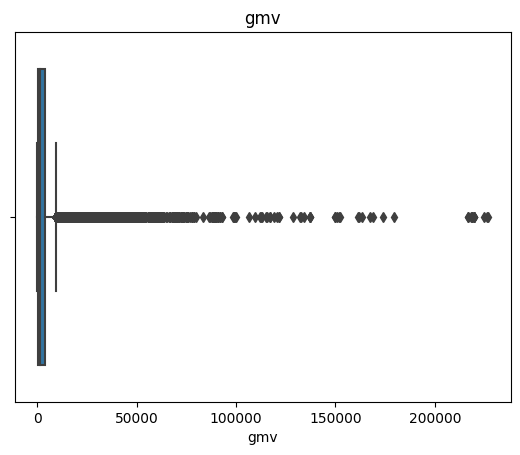

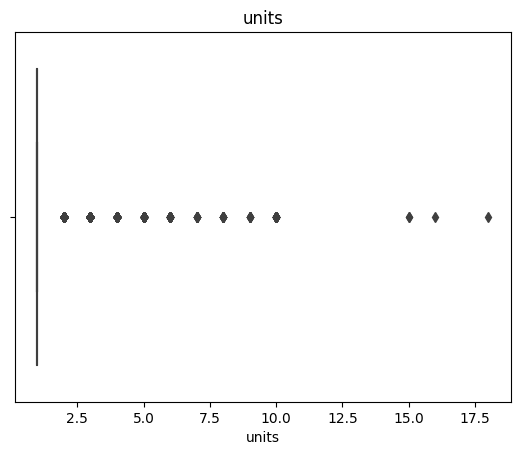

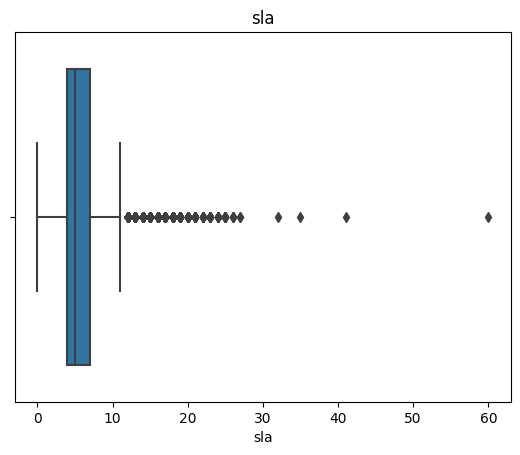

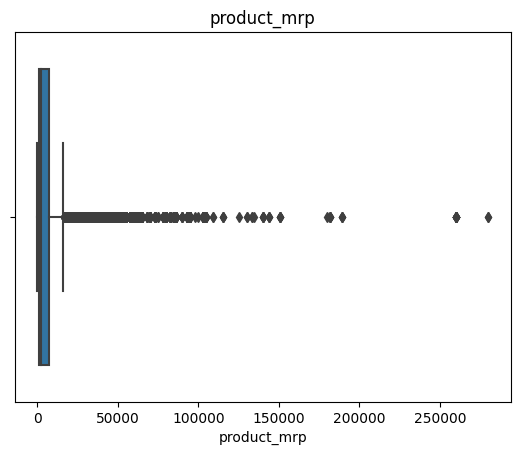

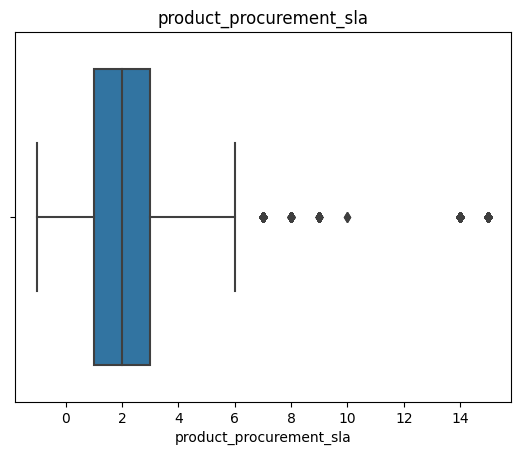

In [26]:
## integer column handling
num=[]
obj=[]
for i in EleData2.columns:
  if EleData2[i].dtype=='float64':
    num.append(i)
  if EleData2[i].dtype=='int64':
    num.append(i)
  if EleData2[i].dtype=='object':
    obj.append(i)


num.remove('order_item_id')

x=1
for i in num:
  plt.title(i)
  sns.boxplot(x=EleData2[i])
  plt.show()
  x=x+1

## we will treat outliers later based on sub categories

In [27]:
EleData2.columns
EleData2.order_date=EleData2['order_date'].dt.date

In [28]:
## Week
EleData2['week']=((pd.to_datetime(EleData2['order_date'])-pd.to_datetime('2015-07-01'))/7)
EleData2['week']=EleData2['week'].apply(lambda x: x.days+1)
EleData2.loc[:,['order_date','week']]
EleData2.week.value_counts()

16    28442
44    13958
19    13225
30    12482
36    12240
25    12165
34    12092
48    11047
26     9762
32     9499
37     9451
23     9406
28     9009
35     9000
24     8572
27     8469
31     8251
33     8234
46     8168
17     8003
18     7957
47     7703
29     7569
22     7442
45     7425
49     7367
40     7159
41     7121
38     7101
50     6966
39     6799
20     6576
51     6530
3      6431
10     6342
15     6243
2      6205
52     6198
13     6141
21     5921
4      5691
12     5595
11     5593
14     5520
42     5282
43     2532
5      2531
53     1724
1      1578
9       933
6         4
8         2
7         1
Name: week, dtype: int64

In [29]:
# 2. Listing Price and Pricing Discounts
EleData2=EleData2[EleData.product_mrp!=0]
EleData2['gmv']=EleData2.gmv.astype(float)
EleData2['listing_price'] = ((EleData2.gmv)/EleData2.units).round(2)
EleData2['discount_per']=(((EleData2['product_mrp']-EleData2['listing_price'])/EleData2['product_mrp'])).round(2)
EleData2.discount_per.describe()
EleData2[EleData2.product_mrp < EleData2.listing_price]
EleData2=EleData2[EleData2.product_mrp >= EleData2.listing_price]

In [30]:
## joining rest of the data and calculating other variables from it
# ProdList
# Investment
# MonthlyNPS
# SalesCal
# Ont2015
# Ont2016


In [31]:
# ## Sales
SalesCal = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/E-Commerce Capstone Dataset/Media data and other information.xlsx",sheet_name="Special Sale Calendar")

# SalesCal.head(20)

SalesCal1=pd.DataFrame(['2015-07-18','2015-07-19','2015-08-15','2015-08-16','2015-08-17','2015-08-28','2015-08-29','2015-08-30',
                        '2015-10-15','2015-10-16','2015-10-17','2015-11-07','2015-11-08','2015-11-09','2015-11-10','2015-11-11','2015-11-12',
                        '2015-11-13','2015-11-14','2015-12-25','2015-12-26','2015-12-27','2015-12-28','2015-12-29','2015-12-30','2015-12-31',
                        '2016-01-01','2016-01-02','2016-01-03','2016-01-20','2016-01-21','2016-01-22','2016-02-01','2016-02-02','2016-02-20','2016-02-21',
                       '2016-02-14','2016-02-15','2016-03-07','2016-03-08','2016-03-09','2016-05-25','2016-05-26','2016-05-27'],columns=["sale_date"])

# SalesCal1=SalesCal1[0].to_list()
# SalesCal1
EleData2.order_date=EleData2.order_date.apply(lambda x :str(x).strip())
EleData2=pd.merge(EleData2,SalesCal1,left_on='order_date',right_on='sale_date',how='left')
# # test[~test["date"].isna()]
# EleData2['sale_date'].value_counts()

In [32]:
### Weather infomation canada
Ont2015=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/E-Commerce Capstone Dataset/ONTARIO-2015.xlsx",header=24)
Ont2016=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/E-Commerce Capstone Dataset/ONTARIO-2016.xlsx",header=24)
Ont_Weather = pd.concat([Ont2015,Ont2016])
Ont_Weather=Ont_Weather.loc[(Ont_Weather['Date/Time']>='2015-07-01') &(Ont_Weather['Date/Time']<'2016-07-01')]

# Ont2015['Max Temp Flag'].value_counts()
todrop= (Ont_Weather.isnull().sum()/Ont_Weather.shape[0]).reset_index()
todrop
req=todrop.loc[todrop[0]<0.50,:]['index'].to_list()
Ont_Weather=Ont_Weather[req]
Ont_Weather =Ont_Weather.drop(['Total Precip (mm)','Snow on Grnd (cm)','Data Quality'],1)

# Ont_Weather
Ont_Weather['week']=((pd.to_datetime(Ont_Weather['Date/Time'])-pd.to_datetime('2015-07-01'))/7)
Ont_Weather['week']=Ont_Weather['week'].apply(lambda x: x.days+1)
Ont_Weather['Date/Time']=Ont_Weather['Date/Time'].dt.date
weekly_kpis=Ont_Weather.groupby('week').mean().reset_index()

In [33]:
weekly_kpis.head()
weekly_kpis.drop(['Year','Month'],1,inplace=True)

In [34]:

weekly_kpis=weekly_kpis.sort_values(by='week')
Ont_Weather.info()
weekly_kpis.rename(columns={"Max Temp (°C)":"max_temp_c","Min Temp (°C)":"mon_temp_c","Mean Temp (°C)":"mean_temp_c",
                            "Heat Deg Days (°C)":"heat_deg_c","Cool Deg Days (°C)":"cool_deg_c","Total Rain (mm)":"total_rain",
                            "Total Snow (cm)":"total_snow"},inplace=True)
## filling missing values with fronyfill method as temp is time series
weekly_kpis.ffill(inplace=True)
weekly_kpis.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 181 to 181
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date/Time           366 non-null    object 
 1   Year                366 non-null    int64  
 2   Month               366 non-null    int64  
 3   Day                 366 non-null    int64  
 4   Max Temp (°C)       208 non-null    float64
 5   Min Temp (°C)       191 non-null    float64
 6   Mean Temp (°C)      191 non-null    float64
 7   Heat Deg Days (°C)  191 non-null    float64
 8   Cool Deg Days (°C)  191 non-null    float64
 9   Total Rain (mm)     215 non-null    float64
 10  Total Snow (cm)     215 non-null    float64
 11  week                366 non-null    int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 37.2+ KB


week           0
Day            0
max_temp_c     0
mon_temp_c     0
mean_temp_c    0
heat_deg_c     0
cool_deg_c     0
total_rain     0
total_snow     0
dtype: int64

In [35]:
# MonthlyNPS
MonthlyNPS = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/E-Commerce Capstone Dataset/Media data and other information.xlsx",sheet_name="Monthly NPS Score")
# ?pd.melt
MonthlyNPS.head()
NPS = pd.melt(MonthlyNPS,id_vars="Unnamed: 0",value_vars=["July'15","Aug'15","Sept'15","Oct'15","Nov'15",
                                                  "Dec'15","Jan'16","Feb'16","Mar'16","Apr'16",
                                                  "May'16","June'16"],).reset_index()
# ?pd.pivot
NPS.rename(columns={"Unnamed: 0":"Header","variable":"Month1","value":"Value"},inplace=True)
# NPS
# NPS
NPS['Month']=0
NPS.loc[NPS["Month1"].str.startswith("July"), "Month"] = 7
NPS.loc[NPS["Month1"].str.startswith("Aug"), "Month"] = 8
NPS.loc[NPS["Month1"].str.startswith("Sept"), "Month"] = 9
NPS.loc[NPS["Month1"].str.startswith("Oct"), "Month"] = 10
NPS.loc[NPS["Month1"].str.startswith("Nov"), "Month"] = 11
NPS.loc[NPS["Month1"].str.startswith("Dec"), "Month"] = 12
NPS.loc[NPS["Month1"].str.startswith("Jan"), "Month"] = 1
NPS.loc[NPS["Month1"].str.startswith("Feb"), "Month"] = 2
NPS.loc[NPS["Month1"].str.startswith("Mar"), "Month"] = 3
NPS.loc[NPS["Month1"].str.startswith("Apr"), "Month"] = 4
NPS.loc[NPS["Month1"].str.startswith("May"), "Month"] = 5
NPS.loc[NPS["Month1"].str.startswith("June"), "Month"] = 6
NPS['Year'] = pd.Series([2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016])
NPS['Month']=NPS['Month'].astype(str)
NPS.drop("index",1,inplace=True)

# print(NPS)
# print(NPS)
NPS


Header   Month1        Value Month  Year
0           NPS  July'15    54.599588     7  2015
1   Stock Index  July'15  1177.000000     7  2015
2           NPS   Aug'15    59.987101     8  2015
3   Stock Index   Aug'15  1206.000000     8  2015
4           NPS  Sept'15    46.925419     9  2015
5   Stock Index  Sept'15  1101.000000     9  2015
6           NPS   Oct'15    44.398389    10  2015
7   Stock Index   Oct'15  1210.000000    10  2015
8           NPS   Nov'15    47.000000    11  2015
9   Stock Index   Nov'15  1233.000000    11  2015
10          NPS   Dec'15    45.800000    12  2015
11  Stock Index   Dec'15  1038.000000    12  2015
12          NPS   Jan'16    47.093031     1  2016
13  Stock Index   Jan'16  1052.000000     1  2016
14          NPS   Feb'16    50.327406     2  2016
15  Stock Index   Feb'16  1222.000000     2  2016
16          NPS   Mar'16    49.020550     3  2016
17  Stock Index   Mar'16  1015.000000     3  2016
18          NPS   Apr'16    51.827605     4  2016
19  Stock Index   Apr'16  1242.000000     4  2016
20          NPS   May'16    47.306951     5  2016
21  Stock Index   May'16  1228.000000     5  2016
22          NPS  June'16    50.516687     6  2016
23  Stock Index  June'16  1194.000000     6  2016

In [36]:
EleData2.rename(columns={"Year_x":"Year","Month_x":"Month"},inplace=True)
EleData2=pd.merge(EleData2,NPS.loc[NPS['Header']=='Stock Index'],how='left',on='Month')
EleData2=pd.merge(EleData2,NPS.loc[NPS['Header']=='NPS'],how='left',on='Month')
# EleData2['Year_x'].count()
EleData2.rename(columns={"Value_x":"Stock_Index","Value_y":"NPS"},inplace=True)


In [37]:
# lets clean the frame with _x _y coluumns
# EleData2.columns
EleData2['Year']=EleData2['Year_x']
# EleData2['week']=EleData2['week_x']

col=[]
for i in EleData2.columns:
  if (str(i).endswith("_x")) | (str(i).endswith("_y") | (str(i)=='key_0')):
    col.append(i)

EleData2.drop(col,1,inplace=True)


In [38]:
EleData2.columns

Index(['order_date', 'Month', 'order_item_id', 'gmv', 'units',
       'order_payment_type', 'sla', 'product_analytic_category',
       'product_analytic_sub_category', 'product_mrp',
       'product_procurement_sla', 'product_analytic_vertical_derived', 'week',
       'listing_price', 'discount_per', 'sale_date', 'Stock_Index', 'NPS',
       'Year'],
      dtype='object')

In [39]:
### Investments

Investment = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/E-Commerce Capstone Dataset/Media data and other information.xlsx",header=2,sheet_name="Media Investment")
Investment.isna().sum()
Investment.fillna(0,inplace=True)
Investment.drop(["Unnamed: 0"],1,inplace=True)
Investment=Investment.loc[Investment.Year!=0]
Investment.head()
Investment['month_start'] = pd.to_datetime(Investment[['Year', 'Month']].assign(DAY=1))
Investment.set_index('month_start',inplace=True)


In [40]:
# Investment.info()
july=Investment.index[-1] + pd.offsets.MonthBegin(1)
july

Timestamp('2016-07-01 00:00:00')

In [41]:
Investment =Investment.append(Investment.iloc[[-1]].rename({Investment.index[-1]: july}))
Inv2=Investment.resample("W").ffill().reset_index()
Inv2.set_index('month_start',inplace=True)
# Inv2=Inv2.iloc[:-1]
# EleData2['week'].value_counts()
Inv2.head()
Inv2.rename(columns={' Affiliates':'Affiliates'},inplace=True)


In [42]:
Inv2['Total Investment'] = Inv2['Total Investment']/Inv2.resample('MS')['Total Investment'].transform('size')
Inv2['TV'] = Inv2['TV']/Inv2.resample('MS')['TV'].transform('size')
Inv2['Digital'] = Inv2['Digital'] /Inv2.resample('MS')['Digital'].transform('size')
Inv2['Sponsorship'] = Inv2['Sponsorship']/Inv2.resample('MS')['Sponsorship'].transform('size')
Inv2['Content Marketing'] = Inv2['Content Marketing']/Inv2.resample('MS')['Content Marketing'].transform('size')
Inv2['Online marketing'] = Inv2['Online marketing']/ Inv2.resample('MS')['Online marketing'].transform('size')
Inv2['Affiliates'] = Inv2['Affiliates']/ Inv2.resample('MS')['Affiliates'].transform('size')
Inv2['SEM'] = Inv2['SEM']/Inv2.resample('MS')['SEM'].transform('size')
Inv2['Radio'] = Inv2['Radio']/Inv2.resample('MS')['Radio'].transform('size')
Inv2['Other'] = Inv2['Other']/Inv2.resample('MS')['Other'].transform('size')



In [43]:
## aDstock
# EleData3.columns
# considering 0.5 decay
ad = ['Total Investment', 'TV', 'Digital','Sponsorship', 'Content Marketing', 'Online marketing', ' Affiliates','SEM', 'Radio', 'Other']
def adstock(channel):
  Inv_ad=[]
  for i in range(0,(len(Inv2))):
    if i==0:
      Inv_ad.append(Inv2.iloc[i][channel].round(2))
    else:
      Inv_ad.append((Inv2.iloc[i][channel]+ (0.5 * Inv2.iloc[i-1][channel])).round(2))
  return Inv_ad


In [44]:
Inv2['Total_Investment_AD']=adstock("Total Investment")
Inv2['TV_AD']=adstock("TV")
Inv2['Digital_AD']=adstock("Digital")
Inv2['Content_Marketing_AD']=adstock("Content Marketing")
Inv2['Sponsorship_AD']=adstock("Sponsorship")
Inv2['Online_marketing_AD']=adstock("Online marketing")
Inv2['Affiliates_AD']=adstock("Affiliates")
Inv2['SEM_AD']=adstock("SEM")
Inv2['Radio_AD']=adstock("Radio")
Inv2['Other_AD']=adstock("Other")


In [45]:
Inv2['week']=nm.arange(1,54)
weekly_kpis=pd.merge(weekly_kpis,Inv2,on='week')

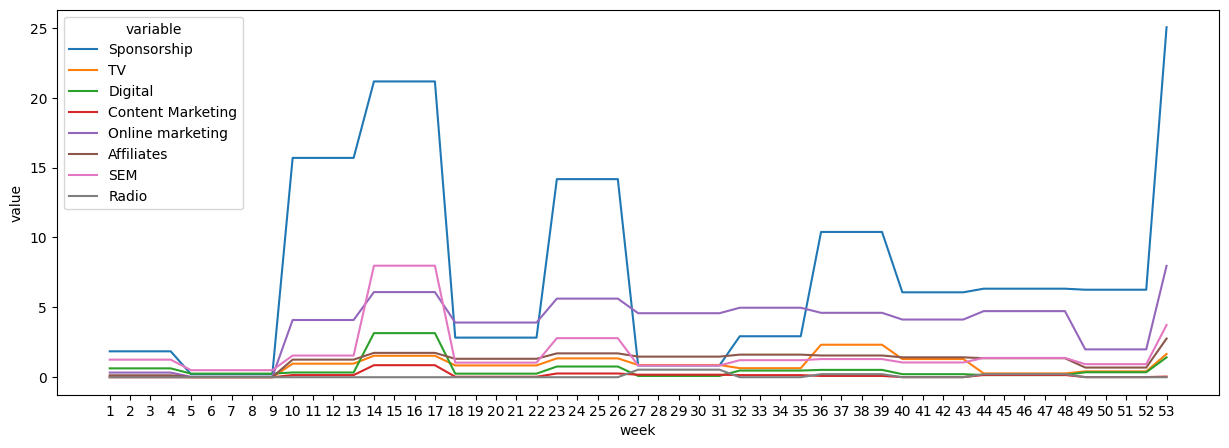

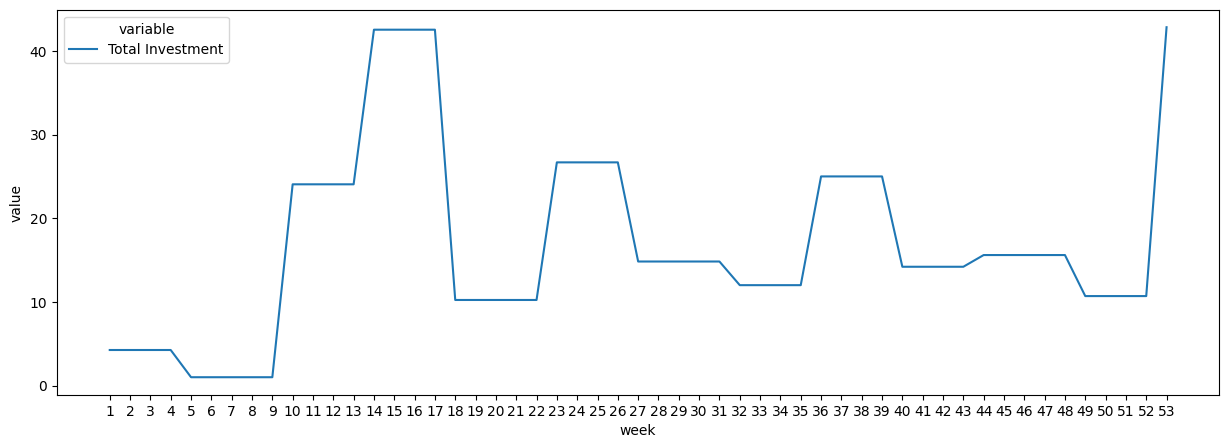

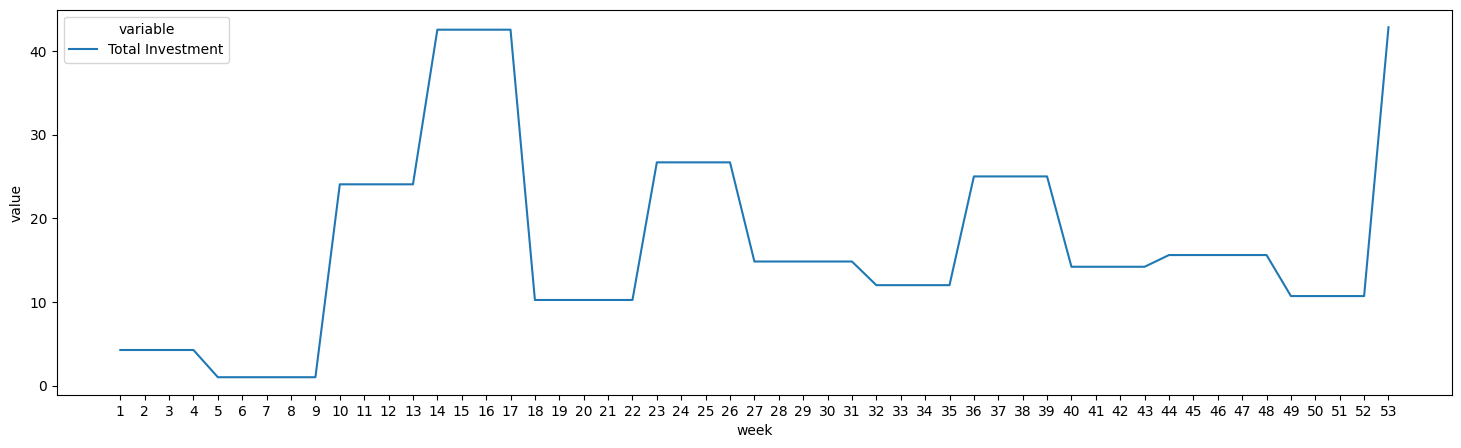

In [46]:
markinv = ['week', 'Sponsorship','TV','Digital', 'Content Marketing', 'Online marketing','Affiliates', 'SEM', 'Radio']

plt.figure(figsize=(15,5))
sns.lineplot(x='week',y='value',data=pd.melt(Inv2[markinv],['week']),hue='variable')
plt.xticks(Inv2['week'])
plt.show()

plt.figure(figsize=(15,5))
sns.lineplot(x='week',y='value',data=pd.melt(Inv2[['Total Investment','week']],['week']),hue='variable')
plt.xticks(Inv2['week'])
plt.show()

plt.figure(figsize=(18,5))
sns.lineplot(x='week',y='value',data=pd.melt(Inv2[['Total Investment','week']],['week']),hue='variable')
plt.xticks(Inv2['week'])
plt.show()



In [47]:
## Pay Date 1st and 15th
EleData2.order_date=pd.to_datetime(EleData2.order_date).dt.date
EleData2["pay_date_flag"]=EleData2['order_date'].apply(lambda x : 1 if ((x).day==15)|(pd.to_datetime(x).is_month_end) else 0)


In [48]:
# holiday flag
import holidays
holidays=pd.DataFrame(pd.Series(holidays.CA(prov='ON',years=[2015,2016]))).reset_index()
holidays=holidays.rename(columns={'index':'Holiday_flag'})
holidays=holidays.drop(0,axis=1)
holidays['Holiday_flag']=pd.to_datetime(holidays['Holiday_flag'], dayfirst=True)
holidays.info()
holidays['Holiday_flag']=holidays['Holiday_flag'].dt.date


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Holiday_flag  18 non-null     datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 272.0 bytes


In [49]:
EleData3=pd.merge(EleData2,holidays,how='left',left_on='order_date',right_on='Holiday_flag').fillna(0)

In [50]:
## payment type
EleData3.order_payment_type= EleData3.order_payment_type.apply(lambda x : 1 if x=='cod' else 0)


In [51]:
EleData3.pay_date_flag.value_counts()

0    362012
1     23984
Name: pay_date_flag, dtype: int64

In [52]:
df_prod=EleData3.groupby(['product_analytic_sub_category','product_analytic_vertical_derived'])['gmv'].sum()
df_prod=pd.DataFrame(df_prod.reset_index())
# df_prod.rename(columns={0:"count"},inplace=True)

In [53]:
df_prod

product_analytic_sub_category product_analytic_vertical_derived  \
0                        camera                            Others   
1                        camera                              dslr   
2                        camera                     point & shoot   
3               gamingaccessory                            Others   
4               gamingaccessory                           gamepad   
5               gamingaccessory                     gamingheadset   
6               gamingaccessory                       gamingmouse   
7                     homeaudio                            Others   
8                     homeaudio                           fmradio   
9                     homeaudio                  homeaudiospeaker   

            gmv  
0  4.568340e+07  
1  1.378907e+09  
2  2.587350e+08  
3  3.530583e+07  
4  6.082473e+07  
5  3.145047e+07  
6  2.561555e+07  
7  2.799037e+07  
8  1.871460e+07  
9  1.938923e+08

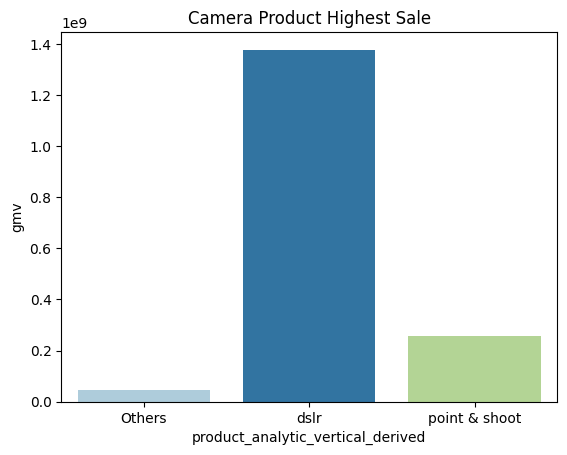

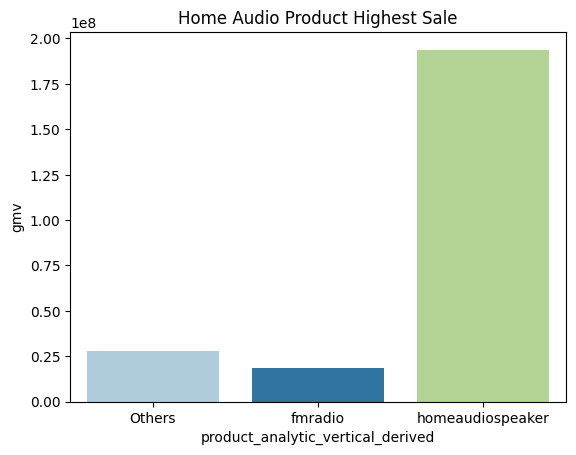

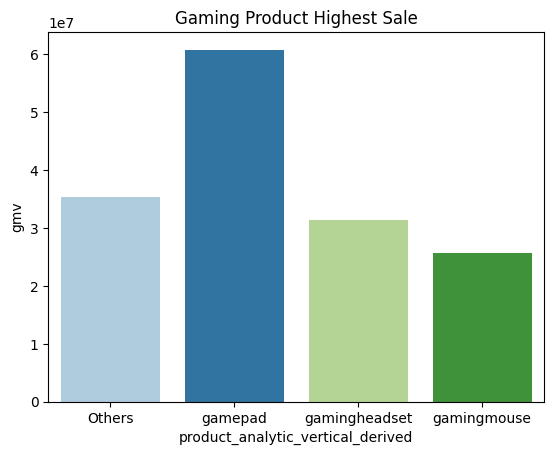

In [54]:
# df_prod.sort_values('product_analytic_sub_category')
sns.set_palette("Paired")
sns.barplot(data = df_prod[df_prod.product_analytic_sub_category=='camera'] , x='product_analytic_vertical_derived' ,y='gmv')
plt.title("Camera Product Highest Sale")
plt.show()

sns.set_palette("Paired")
sns.barplot(data = df_prod[df_prod.product_analytic_sub_category=='homeaudio'] , x='product_analytic_vertical_derived',y='gmv' )
plt.title("Home Audio Product Highest Sale")
plt.show()

sns.set_palette("Paired")
sns.barplot(data = df_prod[df_prod.product_analytic_sub_category=='gamingaccessory'] , x='product_analytic_vertical_derived',y='gmv')
plt.title("Gaming Product Highest Sale")
plt.show()

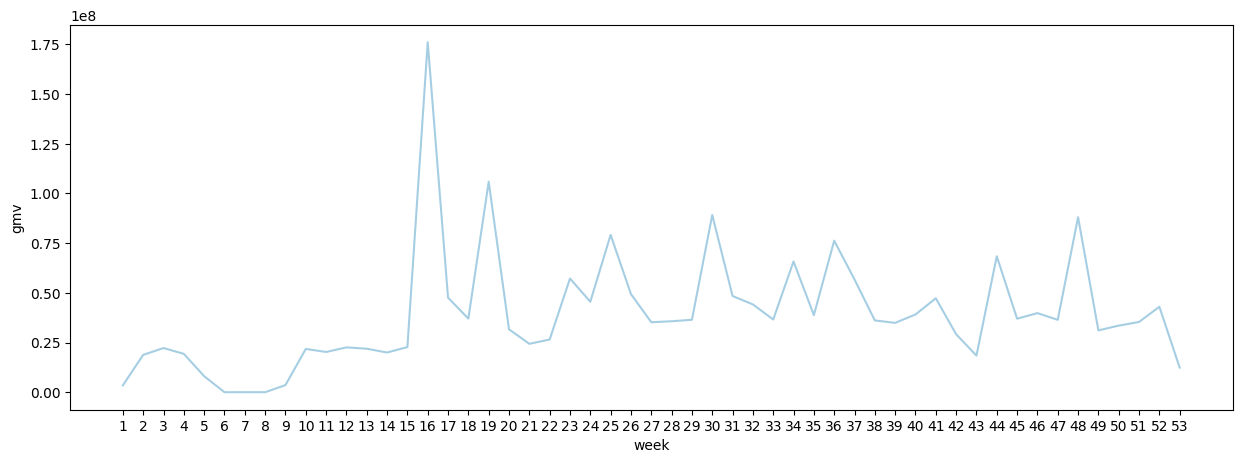

In [55]:
wowgmv=EleData3.groupby('week')['gmv'].sum().reset_index()
plt.figure(figsize=(15,5))
sns.lineplot(x=wowgmv.week,y=wowgmv.gmv)
plt.xticks(wowgmv['week'])
plt.show()


In [56]:
EleData3.columns

Index(['order_date', 'Month', 'order_item_id', 'gmv', 'units',
       'order_payment_type', 'sla', 'product_analytic_category',
       'product_analytic_sub_category', 'product_mrp',
       'product_procurement_sla', 'product_analytic_vertical_derived', 'week',
       'listing_price', 'discount_per', 'sale_date', 'Stock_Index', 'NPS',
       'Year', 'pay_date_flag', 'Holiday_flag'],
      dtype='object')

# Data Aggregation and analysis

Camera Analysis

In [57]:
##
camera=EleData3[EleData3.product_analytic_sub_category=='camera']
# camera.discount_per

In [58]:
camera.columns


Index(['order_date', 'Month', 'order_item_id', 'gmv', 'units',
       'order_payment_type', 'sla', 'product_analytic_category',
       'product_analytic_sub_category', 'product_mrp',
       'product_procurement_sla', 'product_analytic_vertical_derived', 'week',
       'listing_price', 'discount_per', 'sale_date', 'Stock_Index', 'NPS',
       'Year', 'pay_date_flag', 'Holiday_flag'],
      dtype='object')

In [59]:
cam_dummies = pd.get_dummies(camera['product_analytic_vertical_derived'])
camera=pd.concat([camera,cam_dummies],axis=1)


In [60]:
camera.drop(["product_analytic_sub_category","product_analytic_category"],1,inplace=True)

In [61]:
num
num.append('discount_per')
num.append('listing_price')

In [62]:
camera[num].describe()

gmv         units           sla    product_mrp  \
count   94706.000000  94706.000000  94706.000000   94706.000000   
mean    17774.221234      1.011816      4.694370   27114.656505   
std     11423.619524      0.143116      2.399058   16922.490081   
min         0.000000      1.000000      0.000000     599.000000   
25%      6599.000000      1.000000      3.000000    8000.000000   
50%     19490.000000      1.000000      4.000000   34950.000000   
75%     24990.000000      1.000000      6.000000   40000.000000   
max    226947.000000      9.000000     35.000000  280000.000000   

       product_procurement_sla  discount_per  listing_price  
count             94706.000000  94706.000000   94706.000000  
mean                  2.777754      0.321185   17615.696167  
std                   2.490936      0.133102   11240.653746  
min                  -1.000000      0.000000       0.000000  
25%                   1.000000      0.210000    6552.000000  
50%                   3.000000      0.350000   19490.000000  
75%                   4.000000      0.430000   24990.000000  
max                  15.000000      1.000000  226947.000000

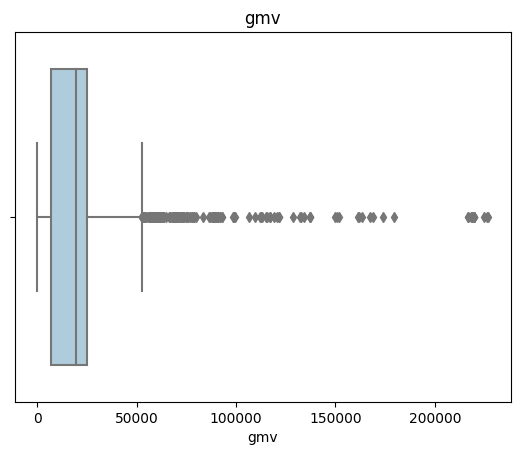

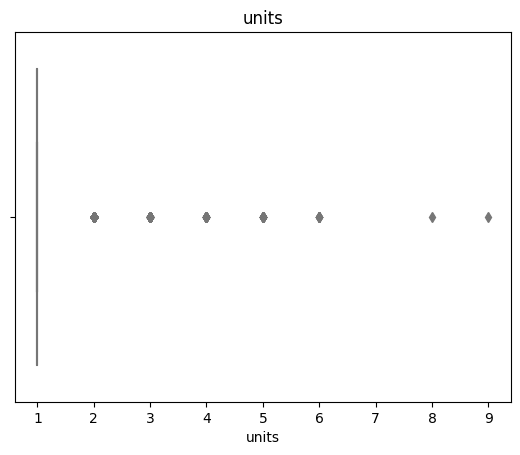

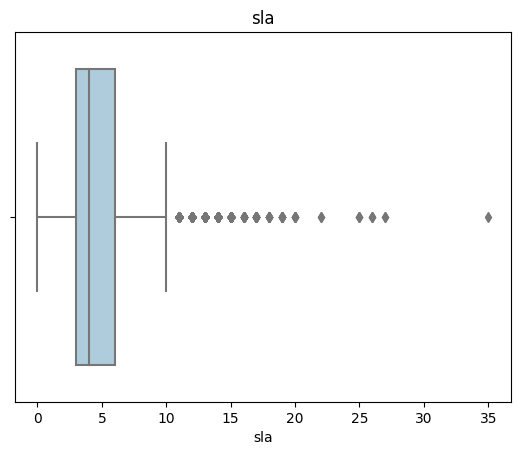

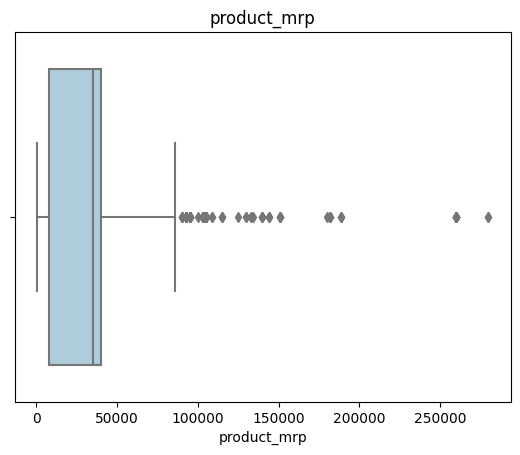

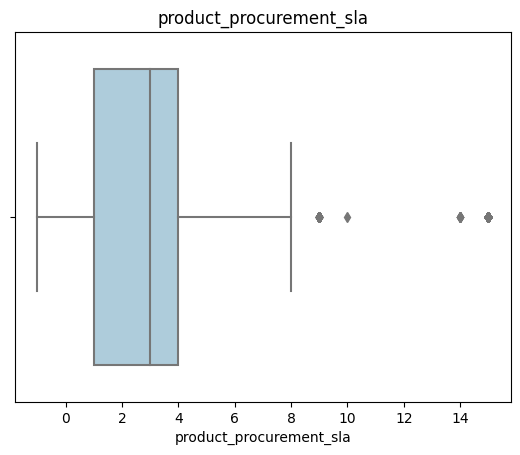

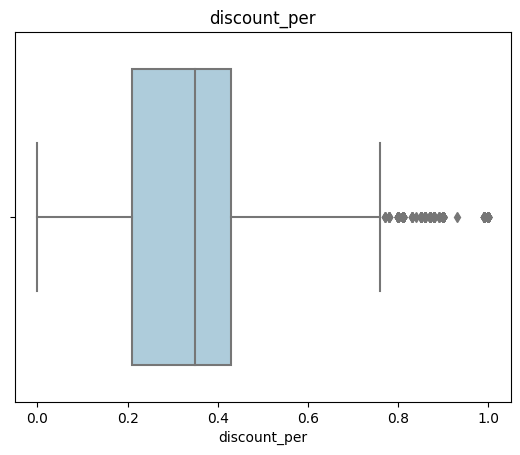

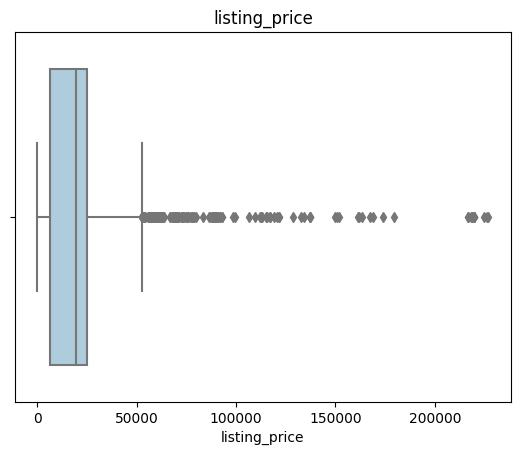

In [63]:
for i in num:
  sns.boxplot(x=camera[i])
  plt.title(i)
  plt.show()

In [64]:
q1=camera['product_mrp'].quantile(0.25)
q3=camera['product_mrp'].quantile(0.75)
iqr=q3-q1
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
# camera[camera['product_mrp']>112000]
camera.loc[camera['product_mrp']>up,'product_mrp']=up
camera.loc[camera['product_mrp']<lw,'product_mrp']=lw

-40000.0   88000.0


In [65]:
q1=camera['gmv'].quantile(0.25)
q3=camera['gmv'].quantile(0.75)
iqr=q3-q1
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
camera[camera['gmv']>72373.5]
camera.loc[camera['gmv']>up,'gmv']=up
camera.loc[camera['gmv']<lw,'gmv']=lw

-20987.5   52576.5


In [66]:
q1=camera['listing_price'].quantile(0.25)
q3=camera['listing_price'].quantile(0.75)
iqr=q3-q1
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
# camera[camera['listing_price']>72373.5]
camera.loc[camera['listing_price']>up,'listing_price']=up
camera.loc[camera['listing_price']<lw,'listing_price']=lw

-21105.0   52647.0


In [67]:
camera['product_mrp'].describe()

count    94706.000000
mean     27064.036122
std      16561.439902
min        599.000000
25%       8000.000000
50%      34950.000000
75%      40000.000000
max      88000.000000
Name: product_mrp, dtype: float64

In [68]:
q1=camera['discount_per'].quantile(0.25)
q3=camera['discount_per'].quantile(0.75)
iqr=q3-q1
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
camera[camera['discount_per']>1.39]
camera.loc[camera['discount_per']>up,'discount_per']=up
camera.loc[camera['discount_per']<lw,'discount_per']=lw


q1=camera['sla'].quantile(0.25)
q3=camera['sla'].quantile(0.75)
iqr=q3-q1
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
camera.loc[camera['sla']>up,'sla']=up
camera.loc[camera['sla']<lw,'sla']=lw

q1=camera['product_procurement_sla'].quantile(0.25)
q3=camera['product_procurement_sla'].quantile(0.75)
iqr=q3-q1
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
camera.loc[camera['product_procurement_sla']>up,'product_procurement_sla']=up
camera.loc[camera['product_procurement_sla']<lw,'product_procurement_sla']=lw

-0.12000000000000002   0.76
-1.5   10.5
-3.5   8.5


In [69]:
camera.groupby('week')['order_item_id'].agg(['count']).sort_values('week')

## here week 6,7,8 are not available and hence

count
week       
1       183
2       866
3      1053
4       849
5       373
9       157
10     1042
11      906
12     1036
13     1131
14     1095
15     1365
16     9557
17     2278
18     1733
19     4682
20     1376
21     1138
22     1211
23     2708
24     2164
25     3574
26     2244
27     1538
28     1495
29     1654
30     4048
31     2214
32     1971
33     1726
34     2800
35     1629
36     3411
37     2476
38     1525
39     1560
40     1738
41     2152
42     1273
43      782
44     3026
45     1627
46     1720
47     1552
48     3687
49     1322
50     1391
51     1489
52     1703
53      476

In [70]:
camera_wk=camera.groupby(['week']).agg({"order_item_id":"nunique",'gmv':'sum','units':'sum','order_payment_type':'sum','sla':'mean',
                                        'product_mrp':'sum','product_procurement_sla':'mean','listing_price':'sum',
                                         'discount_per':'sum','Stock_Index':'max','NPS':'max','pay_date_flag':'max',
                                          "Holiday_flag": "nunique",'sale_date':"nunique","Others":"sum","dslr":"sum","point & shoot":"sum"}).round(2)

camera_wk=pd.merge(camera_wk,weekly_kpis,on='week')

camera_wk.rename(columns={"sales_date":"num_of_sales"},inplace=True)

In [71]:
camera_wk.drop(['heat_deg_c','mon_temp_c','Year','Month','Day'],1,inplace=True)

In [72]:
camera_wk.order_payment_type.value_counts()
camera_wk.rename(columns={'order_item_id':'order_count',"order_payment_type":"order_payment_cod",'mon_temp_c':"min_temp_c","pay_date_flag":"pay_day_in_wk"},inplace=True)
camera_wk["cod_per"]=camera_wk["order_payment_cod"]/camera_wk["order_count"]
camera_wk.drop("order_payment_cod",1,inplace=True)
camera_wk.rename(columns={'sale_date':"num_of_sales"},inplace=True)


In [73]:
camera_wk.num_of_sales=camera_wk.num_of_sales-1
# camera_wk.head()

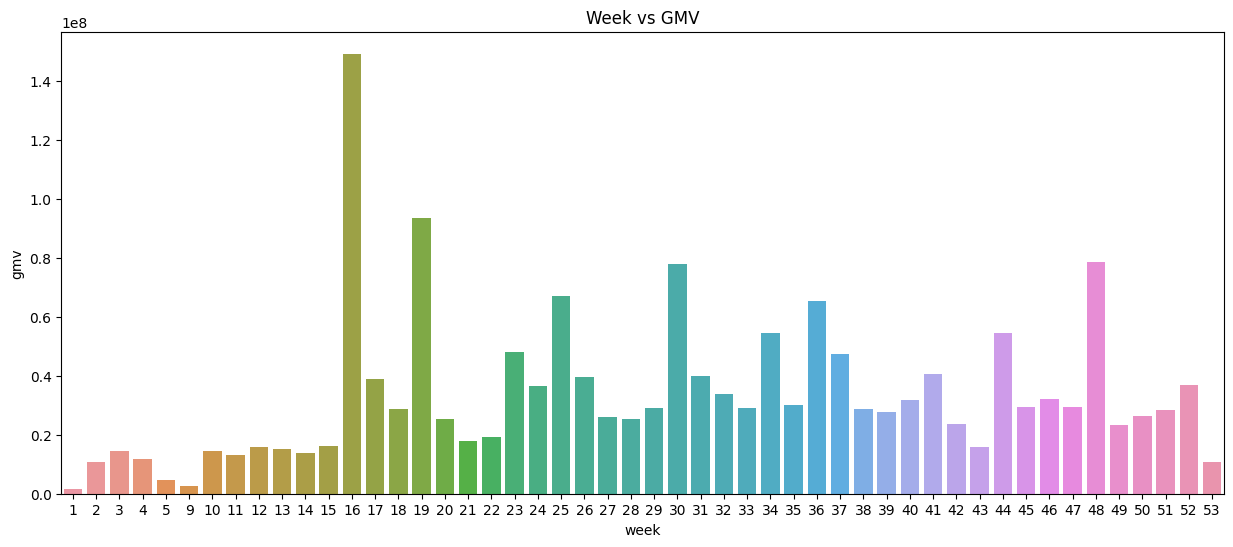

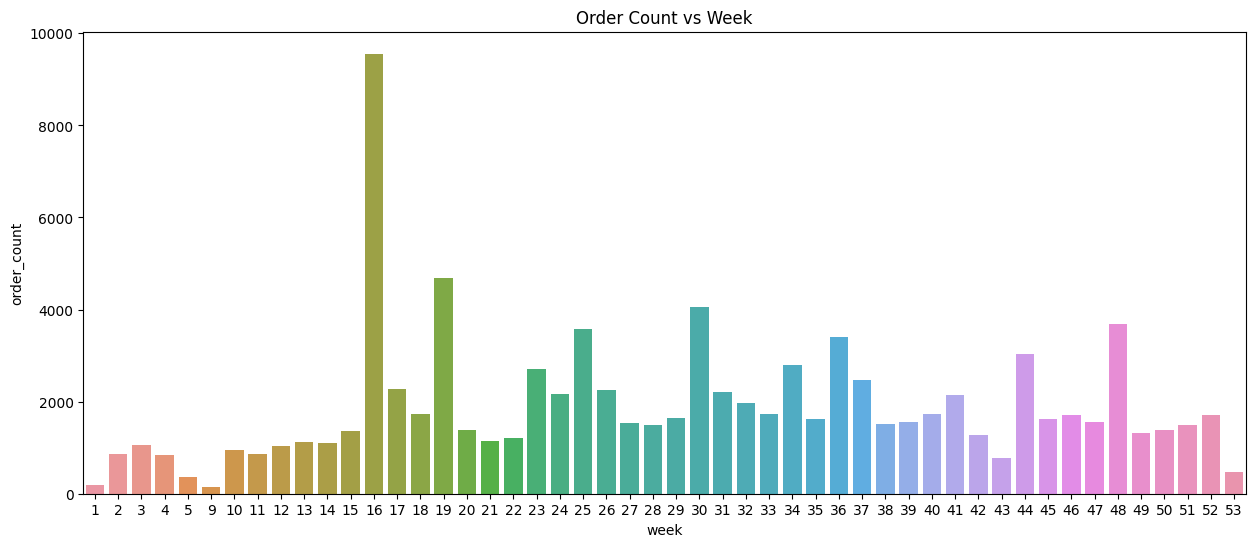

In [74]:


plt.figure(figsize=(15,6))
sns.barplot(x=camera_wk['week'],y=camera_wk['gmv'])
plt.title("Week vs GMV")
plt.show()
# On an avverage 3 sales a week giving better result


plt.figure(figsize=(15,6))
sns.barplot(x=camera_wk['week'],y=camera_wk['order_count'])
plt.title("Order Count vs Week")
plt.show()

## On week 16 , 19, 25, 30,36,44 and 48 sales was good

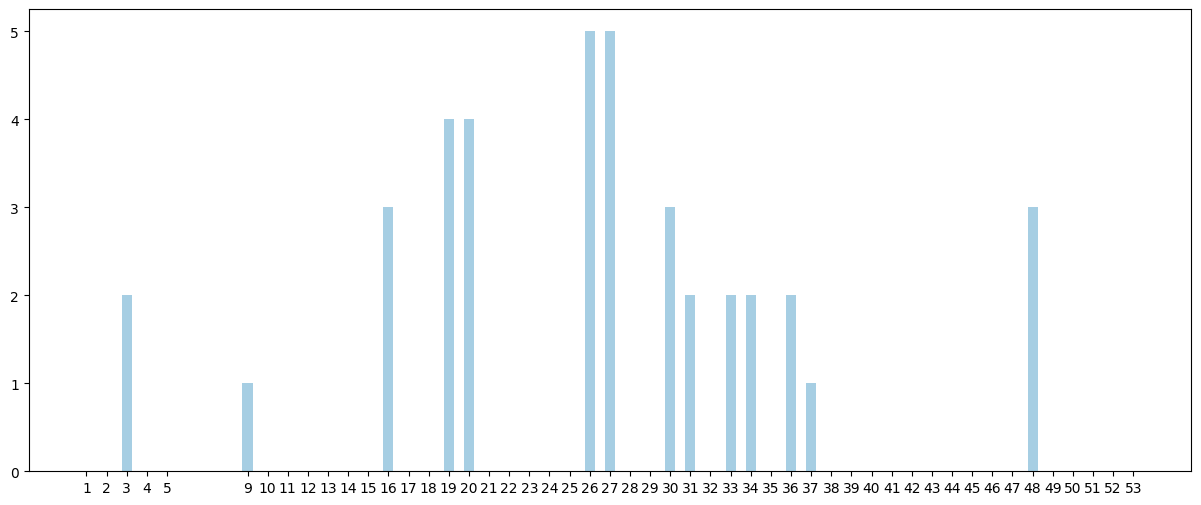

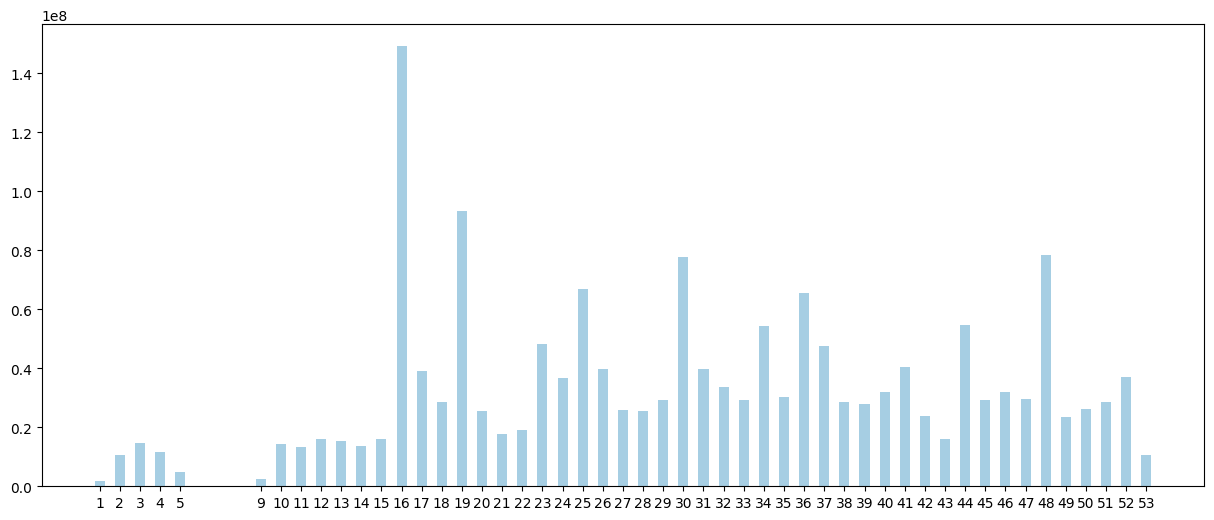

In [75]:
plt.figure(figsize=(15,6))
width=0.5
plt.bar(x=camera_wk['week'],height=camera_wk['num_of_sales'],width=width)
plt.xticks(camera_wk['week'])
plt.show()
plt.figure(figsize=(15,6))
plt.bar(x=camera_wk['week'],height=camera_wk['gmv'],width=width)
plt.xticks(camera_wk['week'])
plt.show()

##  week 16th had 3 days of sale and it improved its gmv, similarly for week 48, 19 and 30
# But in Week 26 27 5 days were sale days bt id didnt improve the GMV much

# Week 16, 19 , 30 , 34,36 and 48 : has impact because has good gmv and number of sales

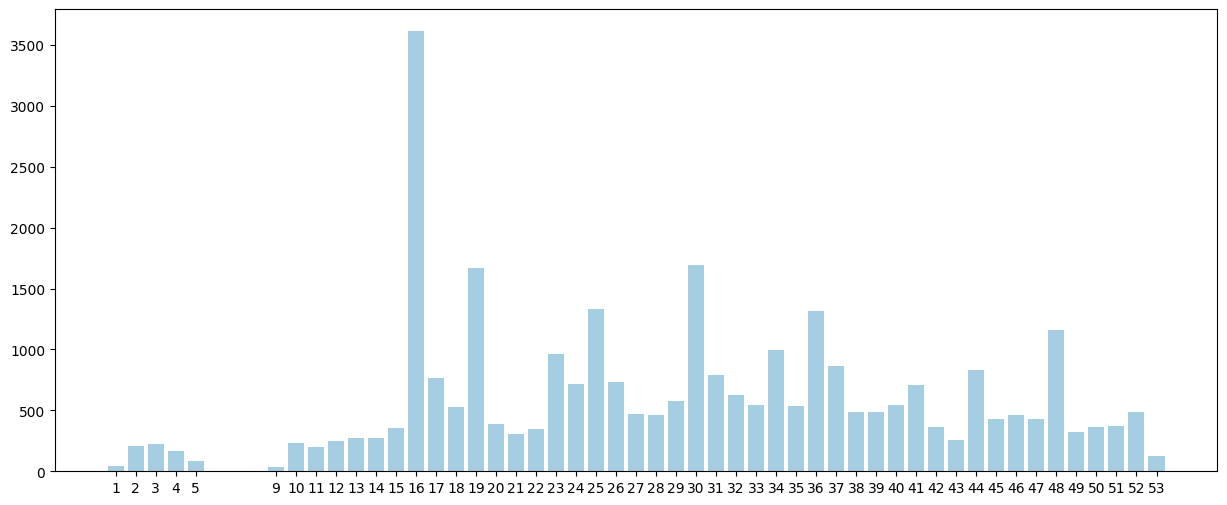

In [76]:
plt.figure(figsize=(15,6))
plt.bar(x=camera_wk['week'],height=camera_wk['discount_per'])
plt.xticks(camera_wk['week'])
plt.show()

### Now week 25th may not have any sale but disocunts were given for most items and hence GMV was improved which makes sense

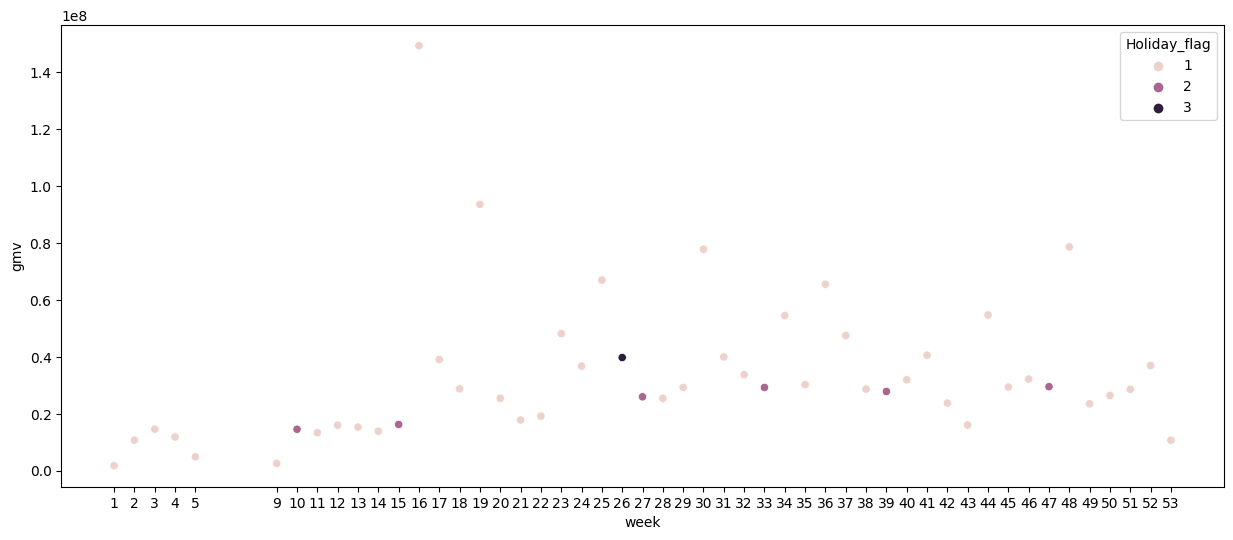

In [77]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=camera_wk['week'],y=camera_wk['gmv'],hue=camera_wk['Holiday_flag'])
plt.xticks(camera_wk['week'])
plt.show()

# Week 26, 15, 27 33 39 47


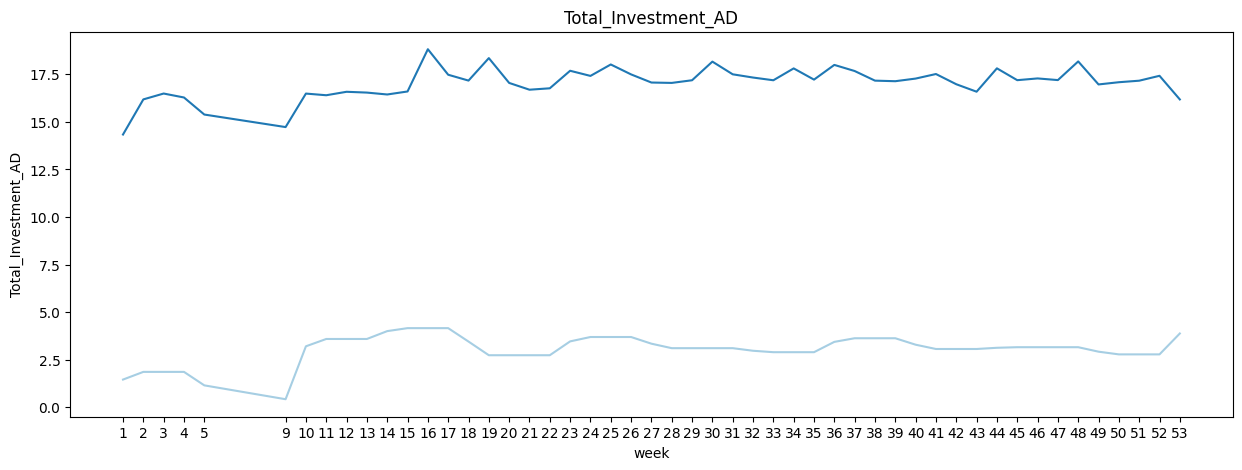

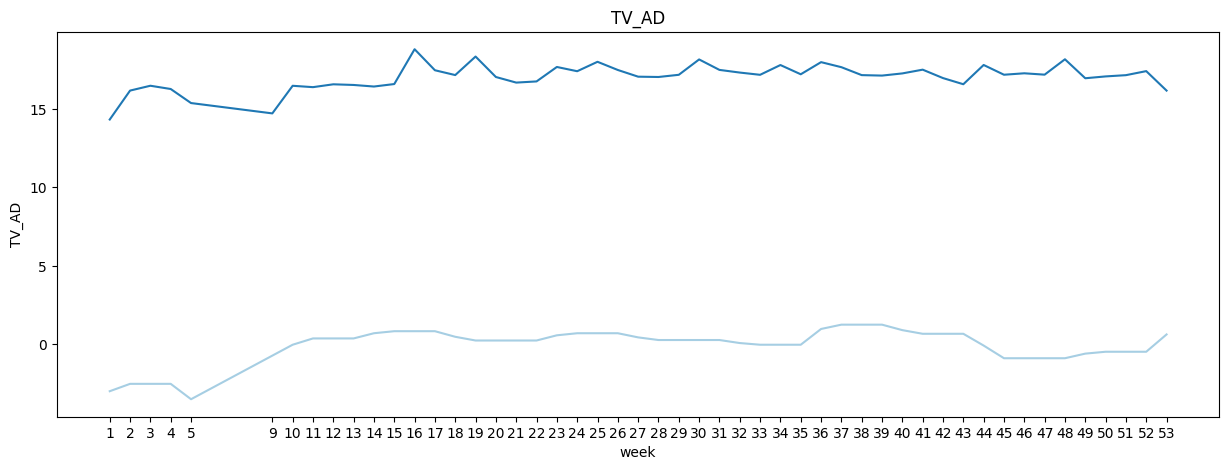

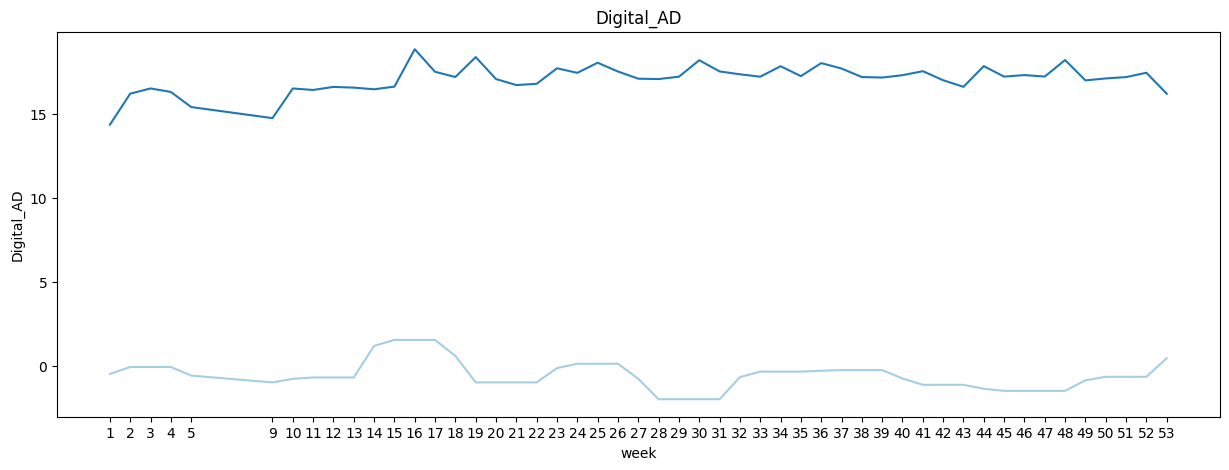

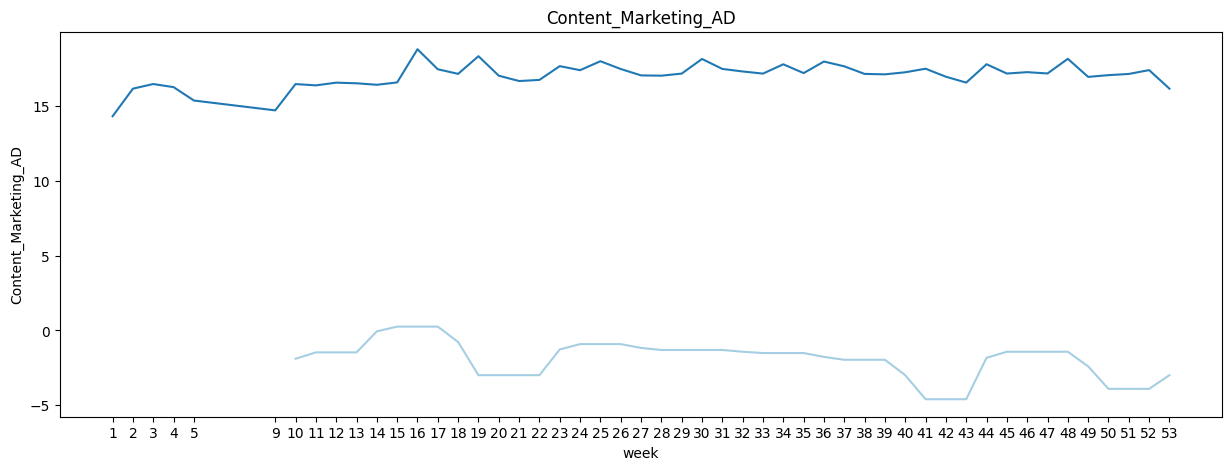

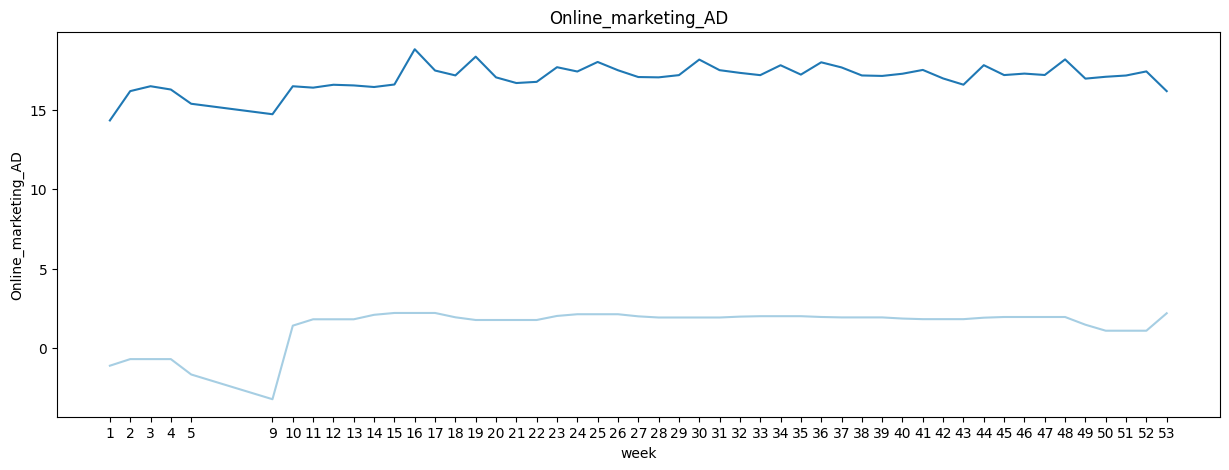

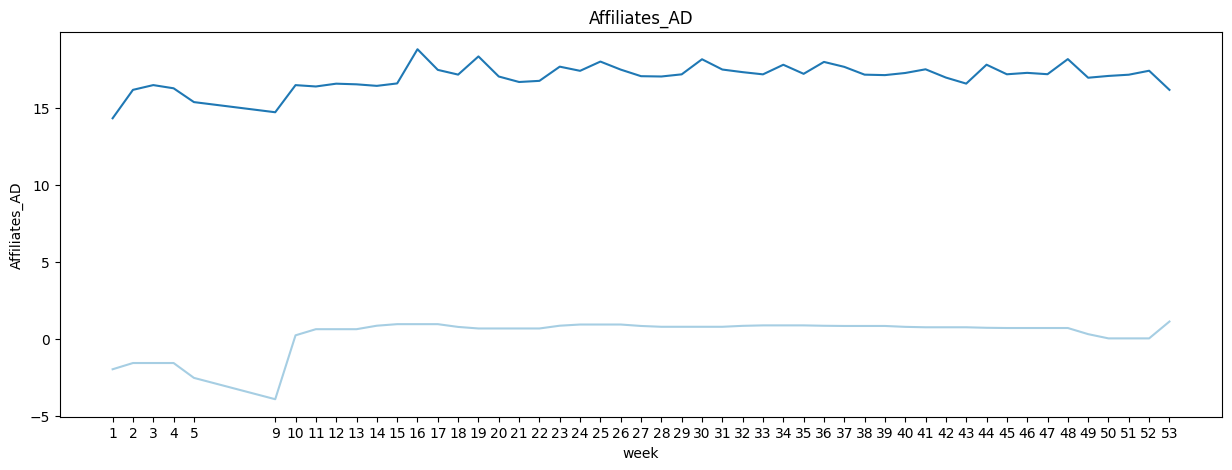

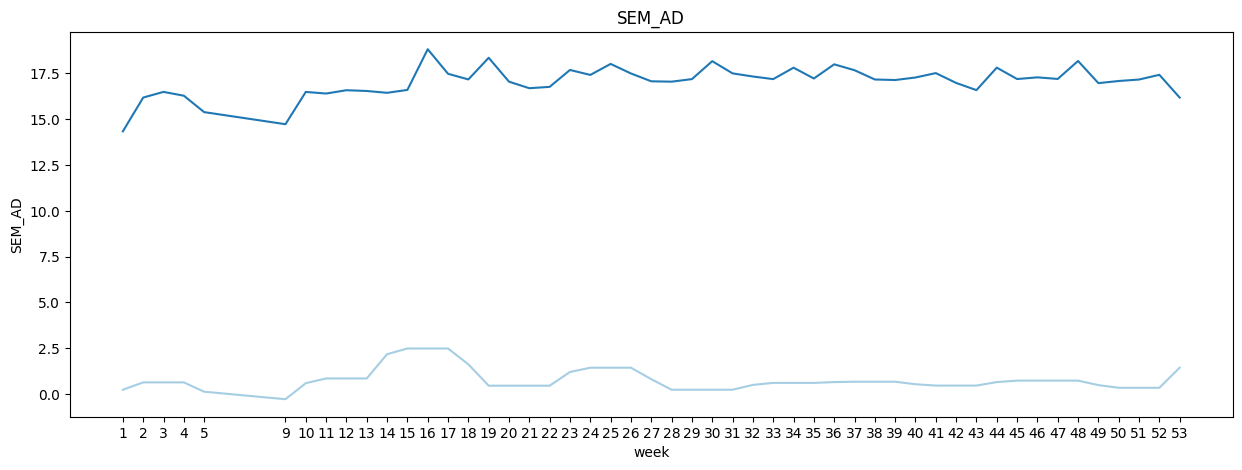

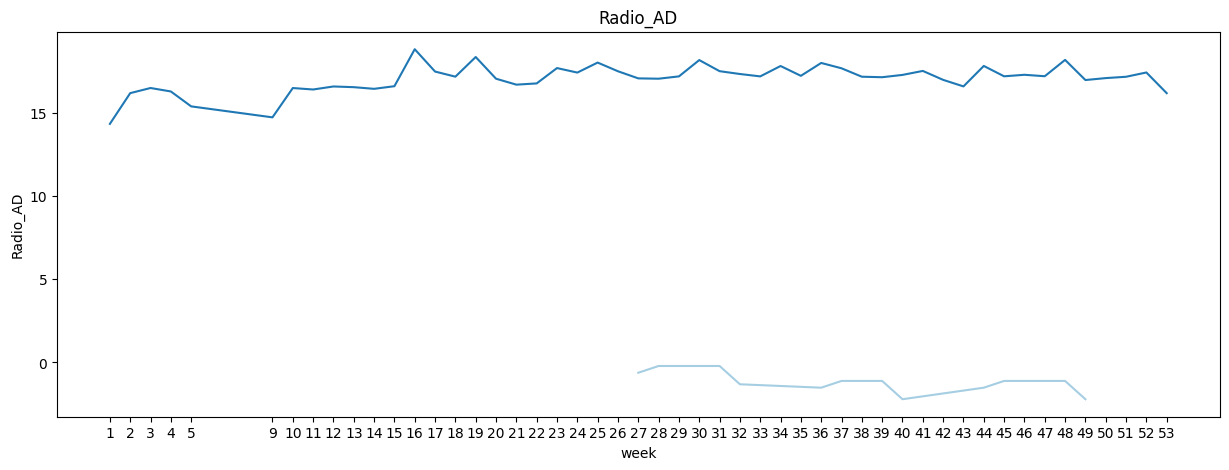

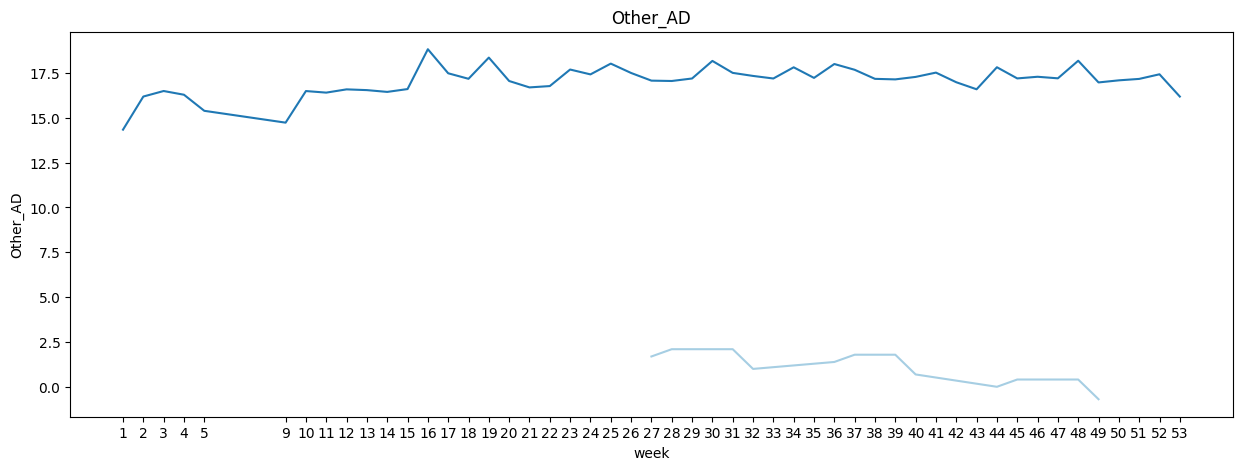

In [78]:
camera.columns
markinv = ['Total_Investment_AD', 'TV_AD','Digital_AD', 'Content_Marketing_AD', 'Online_marketing_AD','Affiliates_AD', 'SEM_AD', 'Radio_AD', 'Other_AD','gmv']

# average_sale_per_week
# plt.figure(figsize=(25, 19))
x=1
for i in markinv:
  if i != 'gmv':
    # plt.subplot(9,1,x)
    plt.figure(figsize=(15, 5))
    plt.title(i)
    sns.lineplot(x=camera_wk['week'],y=nm.log(camera_wk[i]))
    sns.lineplot(x=camera_wk['week'],y=nm.log(camera_wk['gmv']))
    plt.xticks(camera_wk['week'])
    x=x+1
    plt.show()



# tv , online marketing , affliates , radio and other doesnt seems impacting the sales much

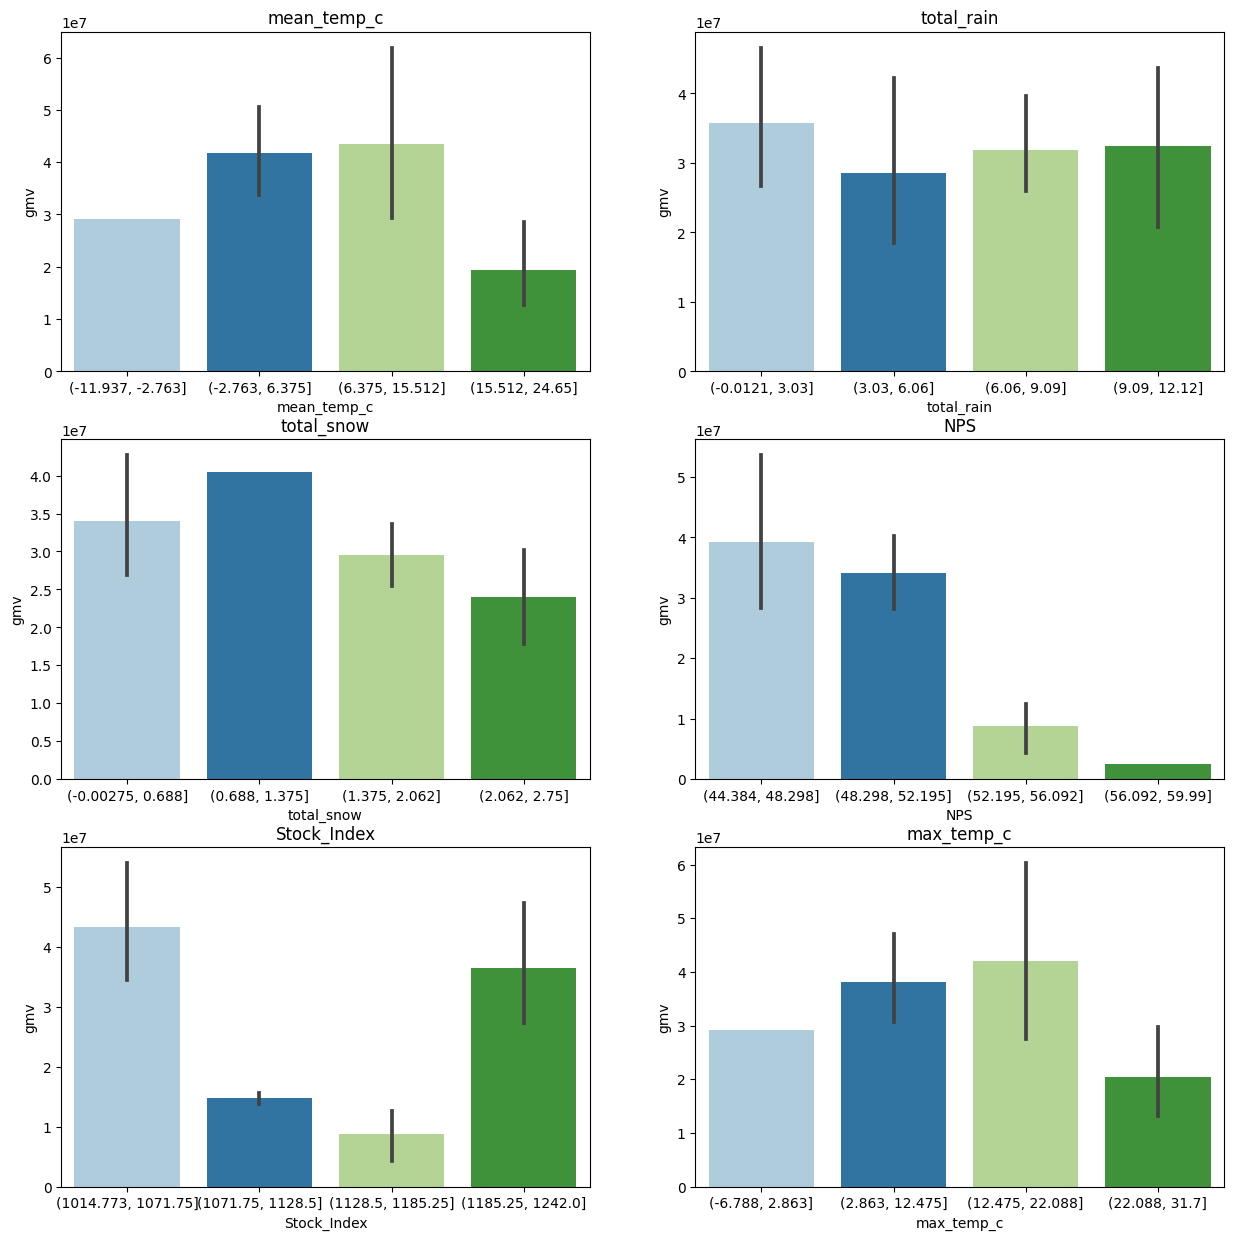

In [79]:
wc = ['mean_temp_c', 'total_rain', 'total_snow','NPS',"Stock_Index",'max_temp_c']

plt.figure(figsize=(15, 15))
x=1
for i in wc:
  plt.subplot(3,2,x)
  plt.title(i)
  sns.barplot(y=camera_wk['gmv'],x=pd.cut(camera_wk[i],bins=4))
  x=x+1

## total rain , stock index looks no pattern

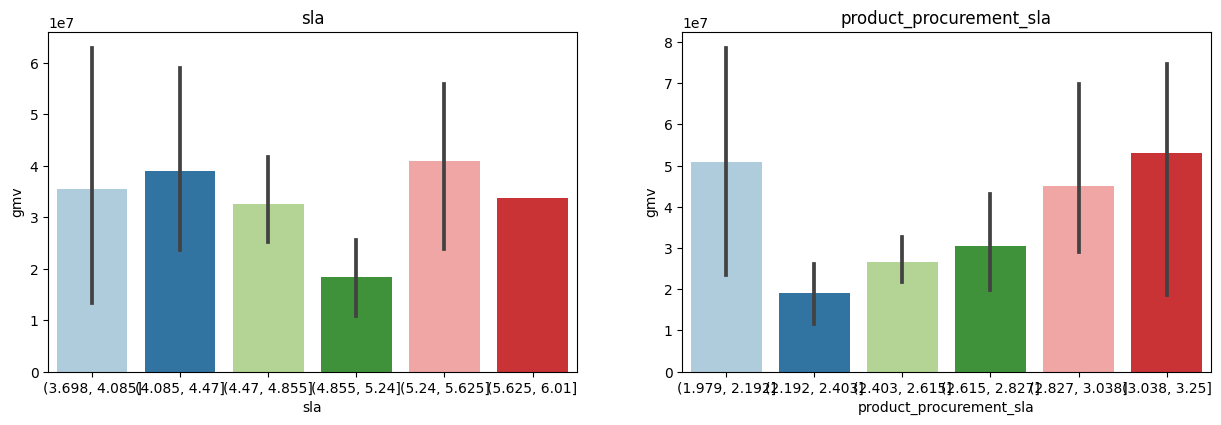

In [80]:
wc = ['sla','product_procurement_sla']

plt.figure(figsize=(15, 15))
x=1
for i in wc:
  plt.subplot(3,2,x)
  plt.title(i)
  sns.barplot(y=camera_wk['gmv'],x=pd.cut(camera_wk[i],bins=6))
  x=x+1

# product procurement sla has a pattern , less days probably are cheap products and getting sold out at high number and then high priced product
# taking high procurement time and high gmv
# but doesnt look like a reason of impact

In [81]:
camera_wk['sales_per']=(camera_wk['num_of_sales'])/7
camera_wk.drop('num_of_sales',1,inplace=True)

<Axes: >

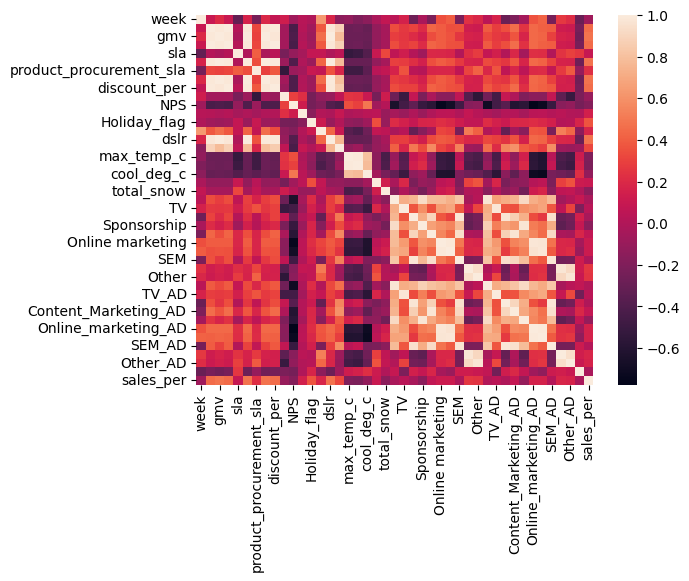

In [82]:
# camera_wk.corr()[camera_wk.corr()>0.5]

sns.heatmap(camera_wk.corr())


In [83]:
camera_wk.columns
camera_wk.drop([ 'Total Investment', 'TV', 'Digital',
       'Sponsorship', 'Content Marketing', 'Online marketing', 'Affiliates',
       'SEM', 'Radio', 'Other'],1,inplace=True)

In [84]:
##
# Till Week 8 , overall investments on Ads were low and also the overall sales, post that it was bit stable. We can remove initial 9 months from analysis for better analysis

In [85]:
camera_wk=camera_wk[camera_wk.week > 9]

Camera Modeling


In [86]:

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


In [87]:
camera_wk.head()

week  order_count         gmv  units   sla  product_mrp  \
6     10          945  14487750.0   1051  4.75     18705065   
7     11          862  13272812.0    919  4.97     17140423   
8     12         1036  15918792.5   1042  5.58     21003579   
9     13         1131  15262029.0   1142  5.10     20883557   
10    14         1095  13814174.0   1104  4.93     18981617   

    product_procurement_sla  listing_price  discount_per  Stock_Index  ...  \
6                      2.57     14444589.0        231.64       1101.0  ...   
7                      2.65     13183679.0        195.87       1101.0  ...   
8                      2.42     15874396.0        246.00       1101.0  ...   
9                      2.86     15201956.0        277.22       1101.0  ...   
10                     2.75     13766775.0        271.92       1210.0  ...   

    Digital_AD  Content_Marketing_AD  Sponsorship_AD  Online_marketing_AD  \
6         0.47                  0.15           15.80                 4.11   
7         0.51                  0.23           23.55                 6.14   
8         0.51                  0.23           23.55                 6.14   
9         0.51                  0.23           23.55                 6.14   
10        3.33                  0.94           29.02                 8.14   

    Affiliates_AD  SEM_AD  Radio_AD  Other_AD   cod_per  sales_per  
6            1.27    1.80       0.0       0.0  0.712169        0.0  
7            1.89    2.33       0.0       0.0  0.699536        0.0  
8            1.89    2.33       0.0       0.0  0.670849        0.0  
9            1.89    2.33       0.0       0.0  0.639257        0.0  
10           2.37    8.76       0.0       0.0  0.672146        0.0  

[5 rows x 33 columns]

In [88]:
camera_wk.drop(['units','order_count','product_mrp','week'],1,inplace=True)

In [89]:
## dropping other variables who doesnt look like havong an impact from analysis done above
# total rain, nps,tv , online marketing , affliates , radio and other ads doesnt seems impacting the sales much
camera_wk.drop(['Other_AD','total_rain','listing_price','Others'],1,inplace=True)

In [90]:
camera_wk.drop('Holiday_flag',1,inplace=True)
camera_wk.drop('cool_deg_c',1,inplace=True)

In [91]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(camera_wk, train_size = 0.7, test_size = 0.3, random_state = 100)

In [92]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

df_train[df_train.columns]=scaler.fit_transform(df_train[df_train.columns])
# df_train

In [93]:
X_train=df_train.drop('gmv',1)
y_train=df_train['gmv']
# X_train

In [94]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [95]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary

def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [96]:
## as variables are more than observations check RFE method
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=15, step=1)

In [97]:
selector.fit(X_train, y_train)

# print(selector.support_)
# print(selector.ranking_)
df=pd.DataFrame(list(zip(X_train.columns,selector.support_,selector.ranking_)))
features =X_train.columns[selector.support_]
features


Index(['sla', 'discount_per', 'Stock_Index', 'pay_day_in_wk', 'dslr',
       'point & shoot', 'max_temp_c', 'mean_temp_c', 'TV_AD', 'Sponsorship_AD',
       'Online_marketing_AD', 'Affiliates_AD', 'Radio_AD', 'cod_per',
       'sales_per'],
      dtype='object')

In [98]:
list(features)

['sla',
 'discount_per',
 'Stock_Index',
 'pay_day_in_wk',
 'dslr',
 'point & shoot',
 'max_temp_c',
 'mean_temp_c',
 'TV_AD',
 'Sponsorship_AD',
 'Online_marketing_AD',
 'Affiliates_AD',
 'Radio_AD',
 'cod_per',
 'sales_per']

In [99]:
x_train_m =build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     745.1
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           1.17e-17
Time:                        09:24:53   Log-Likelihood:                 98.682
No. Observations:                  30   AIC:                            -165.4
Df Residuals:                      14   BIC:                            -142.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0127    

Features      VIF
11        Affiliates_AD  2727.49
10  Online_marketing_AD  2460.01
1          discount_per   500.31
4                  dslr   485.94
6            max_temp_c   398.92
7           mean_temp_c   388.42
9        Sponsorship_AD    97.31
8                 TV_AD    64.35
13              cod_per    17.82
0                   sla    16.64
5         point & shoot    12.21
2           Stock_Index    11.15
12             Radio_AD     8.33
3         pay_day_in_wk     2.65
14            sales_per     2.22

In [100]:
features=features.drop('dslr',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     69.32
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           4.92e-11
Time:                        09:24:53   Log-Likelihood:                 61.201
No. Observations:                  30   AIC:                            -92.40
Df Residuals:                      15   BIC:                            -71.38
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0908    

Features      VIF
10        Affiliates_AD  2667.73
9   Online_marketing_AD  2376.08
6           mean_temp_c   377.84
5            max_temp_c   346.70
8        Sponsorship_AD    89.85
7                 TV_AD    63.31
0                   sla    15.78
12              cod_per    15.51
2           Stock_Index    11.15
1          discount_per    10.75
4         point & shoot     9.86
11             Radio_AD     8.01
3         pay_day_in_wk     2.63
13            sales_per     2.22

In [101]:

features=features.drop('mean_temp_c')
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])



                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     75.61
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           7.96e-12
Time:                        09:24:53   Log-Likelihood:                 60.437
No. Observations:                  30   AIC:                            -92.87
Df Residuals:                      16   BIC:                            -73.26
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0744    

Features      VIF
9         Affiliates_AD  2643.11
8   Online_marketing_AD  2355.18
7        Sponsorship_AD    89.35
6                 TV_AD    63.30
5            max_temp_c    20.62
0                   sla    15.40
11              cod_per    14.87
2           Stock_Index    11.15
1          discount_per     9.97
4         point & shoot     8.97
10             Radio_AD     8.00
3         pay_day_in_wk     2.56
12            sales_per     2.17

In [102]:
features=features.drop('sla',1)
X_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])



                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     86.79
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           8.42e-13
Time:                        09:24:53   Log-Likelihood:                 60.394
No. Observations:                  30   AIC:                            -94.79
Df Residuals:                      17   BIC:                            -76.57
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0831    

Features      VIF
8         Affiliates_AD  1134.86
7   Online_marketing_AD  1067.93
6        Sponsorship_AD    50.32
5                 TV_AD    34.27
4            max_temp_c    18.65
10              cod_per    14.78
1           Stock_Index    10.90
0          discount_per     9.73
3         point & shoot     8.80
9              Radio_AD     4.76
2         pay_day_in_wk     2.48
11            sales_per     2.16

In [103]:
features=features.drop('pay_day_in_wk')
X_train_m==build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     100.1
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           8.17e-14
Time:                        09:24:53   Log-Likelihood:                 60.380
No. Observations:                  30   AIC:                            -96.76
Df Residuals:                      18   BIC:                            -79.94
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0856    

Features      VIF
7         Affiliates_AD  1132.77
6   Online_marketing_AD  1067.16
5        Sponsorship_AD    50.17
4                 TV_AD    34.27
3            max_temp_c    18.61
9               cod_per    14.17
1           Stock_Index     9.65
0          discount_per     9.04
2         point & shoot     8.76
8              Radio_AD     4.66
10            sales_per     2.12

In [105]:
features=features.drop('sales_per')
X_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     111.3
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           1.09e-14
Time:                        09:25:32   Log-Likelihood:                 59.733
No. Observations:                  30   AIC:                            -97.47
Df Residuals:                      19   BIC:                            -82.05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0681    

Features      VIF
7        Affiliates_AD  1129.30
6  Online_marketing_AD  1066.44
5       Sponsorship_AD    49.61
4                TV_AD    34.17
3           max_temp_c    18.34
9              cod_per    14.16
1          Stock_Index     9.56
2        point & shoot     8.73
0         discount_per     8.26
8             Radio_AD     4.55

In [106]:
features=features.drop('Stock_Index')
X_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])



                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     128.6
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           1.04e-15
Time:                        09:25:38   Log-Likelihood:                 59.555
No. Observations:                  30   AIC:                            -99.11
Df Residuals:                      20   BIC:                            -85.10
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0568    

Features      VIF
6        Affiliates_AD  1129.25
5  Online_marketing_AD  1056.14
4       Sponsorship_AD    41.52
3                TV_AD    34.17
8              cod_per    14.13
2           max_temp_c     9.09
1        point & shoot     7.78
0         discount_per     6.29
7             Radio_AD     4.26

In [107]:
features=features.drop('point & shoot')
X_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])



                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     146.5
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           1.17e-16
Time:                        09:25:42   Log-Likelihood:                 59.023
No. Observations:                  30   AIC:                            -100.0
Df Residuals:                      21   BIC:                            -87.43
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0635    

Features      VIF
5        Affiliates_AD  1111.88
4  Online_marketing_AD  1051.32
3       Sponsorship_AD    41.17
2                TV_AD    32.78
7              cod_per    14.08
1           max_temp_c     8.81
0         discount_per     4.58
6             Radio_AD     3.99

In [108]:
features=features.drop('TV_AD')
X_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])



                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     161.4
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           2.06e-17
Time:                        09:25:43   Log-Likelihood:                 57.791
No. Observations:                  30   AIC:                            -99.58
Df Residuals:                      22   BIC:                            -88.37
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0279    

Features     VIF
3  Online_marketing_AD  186.30
4        Affiliates_AD  166.78
6              cod_per   12.46
1           max_temp_c    8.35
2       Sponsorship_AD    7.52
0         discount_per    4.57
5             Radio_AD    2.26

In [109]:
features=features.drop('Radio_AD')
X_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])



                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     175.1
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           5.18e-18
Time:                        09:25:44   Log-Likelihood:                 56.074
No. Observations:                  30   AIC:                            -98.15
Df Residuals:                      23   BIC:                            -88.34
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0122    

Features     VIF
3  Online_marketing_AD  169.31
4        Affiliates_AD  156.97
5              cod_per   11.87
1           max_temp_c    8.35
2       Sponsorship_AD    5.49
0         discount_per    4.44

In [110]:
features=features.drop('Affiliates_AD')
X_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])



                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     203.9
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           7.68e-19
Time:                        09:25:47   Log-Likelihood:                 55.010
No. Observations:                  30   AIC:                            -98.02
Df Residuals:                      24   BIC:                            -89.61
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0662    

Features    VIF
3  Online_marketing_AD  14.14
4              cod_per  11.32
1           max_temp_c   8.04
2       Sponsorship_AD   5.06
0         discount_per   4.24

In [111]:
features=features.drop('cod_per')
X_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])



                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     216.3
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           5.32e-19
Time:                        09:25:48   Log-Likelihood:                 52.010
No. Observations:                  30   AIC:                            -94.02
Df Residuals:                      25   BIC:                            -87.01
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1371    

Features   VIF
3  Online_marketing_AD  6.70
2       Sponsorship_AD  4.48
1           max_temp_c  3.55
0         discount_per  3.15

In [112]:
features=features.drop('Online_marketing_AD')
X_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])



                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     278.1
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           7.23e-20
Time:                        09:25:51   Log-Likelihood:                 50.914
No. Observations:                  30   AIC:                            -93.83
Df Residuals:                      26   BIC:                            -88.22
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0743      0.029     -2.

Features   VIF
1      max_temp_c  3.49
2  Sponsorship_AD  2.81
0    discount_per  1.69

In [137]:
lm = sm.OLS(y_train,X_train[features]).fit() # fitting the model
print(lm.summary()) # model summary
y_train_pred=lm.predict(X_train[features])
cam_model1=lm.params

                                 OLS Regression Results                                
Dep. Variable:                    gmv   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                              576.1
Date:                Mon, 09 Oct 2023   Prob (F-statistic):                    1.42e-24
Time:                        09:29:41   Log-Likelihood:                          47.470
No. Observations:                  30   AIC:                                     -88.94
Df Residuals:                      27   BIC:                                     -84.74
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

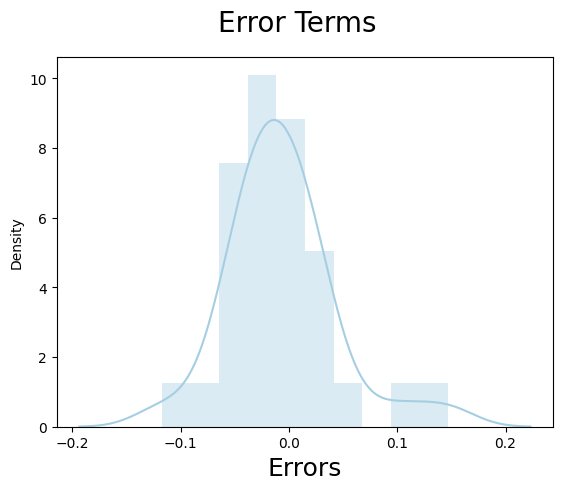

In [114]:
fig=plt.figure()
sns.distplot((y_train-y_train_pred),bins=10)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()


Text(0, 0.5, 'y_pred')

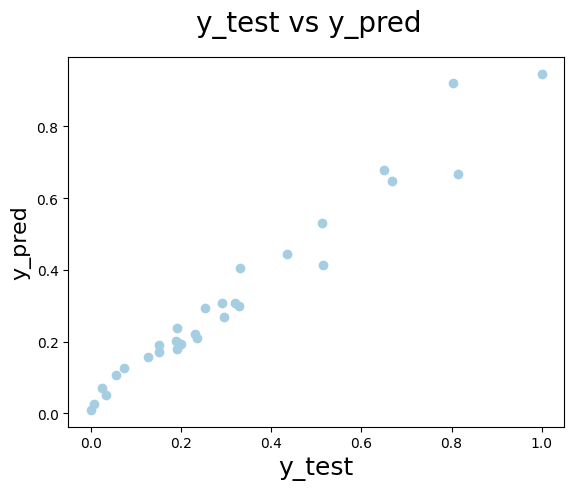

In [115]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_train ,y_train_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

In [116]:
## on test
df_test[df_train.columns]=scaler.fit_transform(df_test[df_train.columns])
X_test=df_test.drop('gmv',1)
y_test=df_test['gmv']
X_test=sm.add_constant(X_test)
X_test=X_test[features]

In [117]:
y_test_pred=lm.predict(X_test)

Text(0, 0.5, 'y_test_pred')

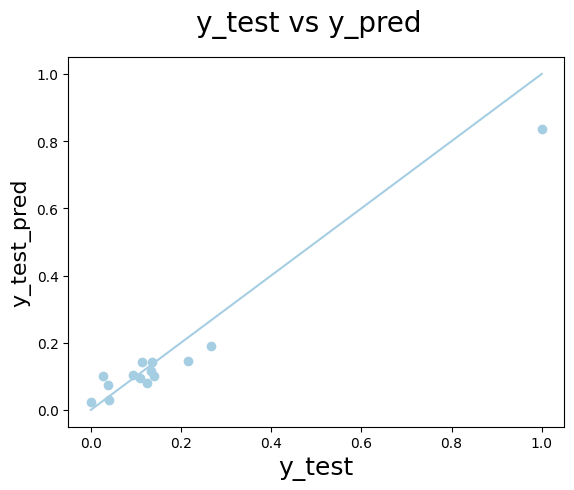

In [118]:
# Plotting y_test and y_pred to understand the spread

fig,ax = plt.subplots()
ax.scatter(y_test, y_test_pred )
fig.suptitle('y_test vs y_pred', fontsize = 20)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])#,  lw=1)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

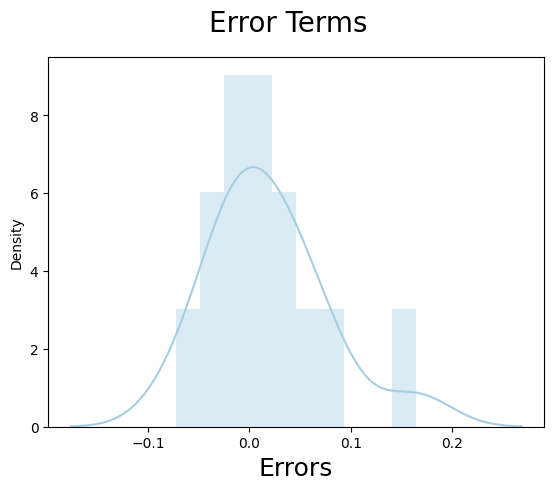

In [119]:
fig=plt.figure()
sns.distplot((y_test-y_test_pred),bins=10)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()


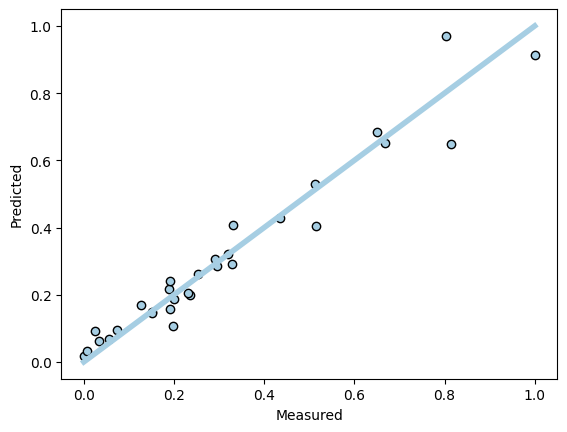

In [120]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

f = KFold(n_splits = 10, shuffle = True, random_state = 100)
lm=LinearRegression()
scores = cross_val_score(lm, X_train[features], y_train, scoring='r2', cv=f)
scores
y_pred = cross_val_predict(lm, X_train[features], y_train, cv=f)



fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],  lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [121]:
cam_feat=features

In [138]:
cam_model1=pd.DataFrame(cam_model1)

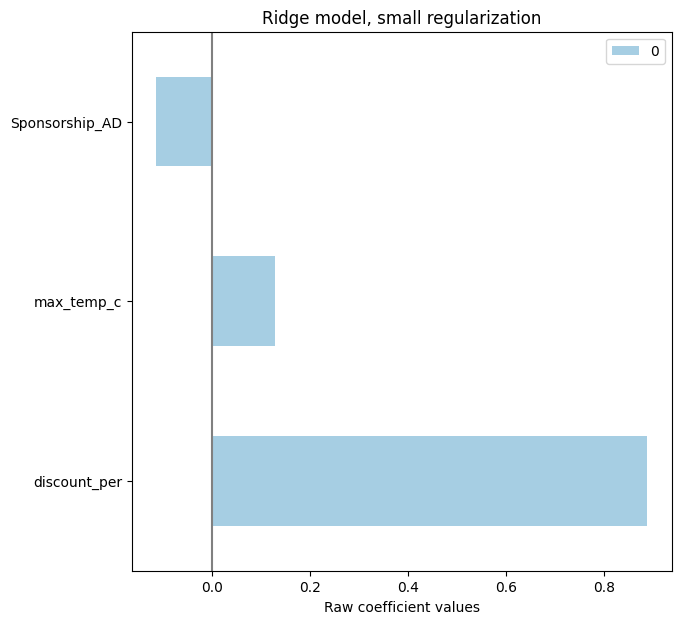

In [139]:
cam_model1.plot.barh(figsize=(9, 7))
plt.title("Ridge model, small regularization")
plt.axvline(x=0, color=".5")
plt.xlabel("Raw coefficient values")
plt.subplots_adjust(left=0.3)

Multiplicative

In [ ]:

# camera_wk=camera.groupby(['week']).agg({"order_item_id":"nunique",'gmv':'sum','units':'sum','order_payment_type':'sum','sla':'mean',
#                                         'product_mrp':'sum','product_procurement_sla':'mean','listing_price':'sum',
#                                          'discount_per':'sum','Stock_Index':'max','NPS':'max','pay_date_flag':'max',
#                                           'sale_date':"nunique"}).round(2)

# camera_wk=pd.merge(camera_wk,weekly_kpis,on='week')


# camera_wk.drop(['heat_deg_c','mon_temp_c','Year','Month','Day','Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing',
#        'Online marketing', 'Affiliates', 'SEM', 'Radio', 'Other'],1,inplace=True)

# # camera_wk.sale_date.value_counts()
# camera_wk.rename(columns={'order_item_id':'order_count',"order_payment_type":"order_payment_cod",'mon_temp_c':"min_temp_c","pay_date_flag":"pay_day_in_wk"},inplace=True)
# camera_wk["cod_per"]=camera_wk["order_payment_cod"]/camera_wk["order_count"]
# camera_wk.drop("order_payment_cod",1,inplace=True)
# camera_wk.rename(columns={"sale_date":"num_of_sales"},inplace=True)
# camera_wk['sales_per']=((camera_wk['num_of_sales']-1)/7)*100
# camera_wk.drop('num_of_sales',1,inplace=True)

In [ ]:

# camera_wk.drop(['units','order_count','product_mrp'],1,inplace=True)
# camera_wk.drop(['Other_AD','Radio_AD','Online_marketing_AD','Affiliates_AD','total_rain','NPS'],1,inplace=True)
# camera_wk.drop(['sla','product_procurement_sla'],1,inplace=True)
# camera_wk.drop('cool_deg_c',1,inplace=True)

In [140]:
camera_wk[camera_wk.columns]=nm.log(camera_wk[camera_wk.columns])
# camera_wk.columns

In [141]:
camera_wk.describe()

camera_wk=camera_wk.replace([nm.inf, -nm.inf], 0)
camera_wk=camera_wk.fillna(0)



In [142]:
df_train, df_test = train_test_split(camera_wk, train_size = 0.7, test_size = 0.3, random_state = 100)

In [143]:
df_train[df_train.columns]=scaler.fit_transform(df_train[df_train.columns])
X_train=df_train.drop('gmv',1)
y_train=df_train['gmv']
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=15, step=1)
selector.fit(X_train, y_train)
# X_train.columns
#
df=pd.DataFrame(list(zip(X_train.columns,selector.support_,selector.ranking_)))
features =X_train.columns[selector.support_]
features


Index(['sla', 'discount_per', 'Stock_Index', 'NPS', 'dslr', 'point & shoot',
       'mean_temp_c', 'total_snow', 'Total_Investment_AD', 'TV_AD',
       'Sponsorship_AD', 'Affiliates_AD', 'Radio_AD', 'cod_per', 'sales_per'],
      dtype='object')

In [144]:
m1=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     214.6
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           6.83e-14
Time:                        09:31:07   Log-Likelihood:                 78.864
No. Observations:                  30   AIC:                            -125.7
Df Residuals:                      14   BIC:                            -103.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0430    

Features     VIF
1          discount_per  608.39
4                  dslr  518.49
11        Affiliates_AD   42.30
10       Sponsorship_AD   40.98
13              cod_per   35.04
5         point & shoot   27.17
0                   sla   25.12
6           mean_temp_c   20.03
7            total_snow   19.55
14            sales_per   19.11
3                   NPS   17.51
12             Radio_AD   17.42
8   Total_Investment_AD   16.26
9                 TV_AD   15.43
2           Stock_Index   14.58

In [145]:
features=features.drop('Affiliates_AD',1)
m1=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     240.1
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           5.07e-15
Time:                        09:31:11   Log-Likelihood:                 78.487
No. Observations:                  30   AIC:                            -127.0
Df Residuals:                      15   BIC:                            -106.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0083    

Features     VIF
1          discount_per  606.61
4                  dslr  517.67
10       Sponsorship_AD   37.89
12              cod_per   34.63
5         point & shoot   26.99
0                   sla   21.02
13            sales_per   19.07
7            total_snow   18.69
6           mean_temp_c   16.83
11             Radio_AD   16.33
8   Total_Investment_AD   15.72
3                   NPS   15.09
9                 TV_AD   13.52
2           Stock_Index    9.59

In [146]:
features=features.drop('dslr',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     148.0
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           4.08e-14
Time:                        09:31:17   Log-Likelihood:                 69.207
No. Observations:                  30   AIC:                            -110.4
Df Residuals:                      16   BIC:                            -90.80
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0064    

Features    VIF
9        Sponsorship_AD  36.18
11              cod_per  33.45
4         point & shoot  19.94
0                   sla  18.71
6            total_snow  18.67
12            sales_per  18.03
5           mean_temp_c  16.73
10             Radio_AD  16.26
7   Total_Investment_AD  14.48
3                   NPS  13.64
1          discount_per  13.58
8                 TV_AD  12.72
2           Stock_Index   9.59

In [148]:
features=features.drop('cod_per',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     169.1
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           3.21e-15
Time:                        09:31:32   Log-Likelihood:                 69.098
No. Observations:                  30   AIC:                            -112.2
Df Residuals:                      17   BIC:                            -93.98
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0203    

Features    VIF
9        Sponsorship_AD  35.09
11            sales_per  17.72
5           mean_temp_c  16.70
6            total_snow  16.17
0                   sla  15.80
4         point & shoot  15.68
7   Total_Investment_AD  14.18
3                   NPS  13.62
1          discount_per  13.09
8                 TV_AD  10.99
10             Radio_AD   9.78
2           Stock_Index   9.02

In [149]:
features=features.drop('sales_per',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     193.2
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           2.45e-16
Time:                        09:31:56   Log-Likelihood:                 68.929
No. Observations:                  30   AIC:                            -113.9
Df Residuals:                      18   BIC:                            -97.04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0073    

Features    VIF
9        Sponsorship_AD  29.72
5           mean_temp_c  15.83
4         point & shoot  14.69
7   Total_Investment_AD  14.00
0                   sla  12.31
3                   NPS  12.15
8                 TV_AD  10.52
1          discount_per   9.94
10             Radio_AD   9.76
2           Stock_Index   8.97
6            total_snow   7.02

In [150]:
features=features.drop('Total_Investment_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     205.7
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           3.53e-17
Time:                        09:32:09   Log-Likelihood:                 67.644
No. Observations:                  30   AIC:                            -113.3
Df Residuals:                      19   BIC:                            -97.88
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0090      0.064     -0.

Features    VIF
5     mean_temp_c  15.71
8  Sponsorship_AD  15.44
4   point & shoot  14.01
0             sla   9.83
7           TV_AD   9.63
1    discount_per   9.16
2     Stock_Index   8.97
9        Radio_AD   8.91
3             NPS   8.60
6      total_snow   7.02

In [151]:
features=features.drop('mean_temp_c',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     194.0
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           1.84e-17
Time:                        09:32:17   Log-Likelihood:                 64.443
No. Observations:                  30   AIC:                            -108.9
Df Residuals:                      20   BIC:                            -94.87
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0020      0.070      0.

Features    VIF
4   point & shoot  14.01
6           TV_AD   9.08
0             sla   8.98
1    discount_per   8.83
8        Radio_AD   8.74
3             NPS   8.27
2     Stock_Index   7.61
7  Sponsorship_AD   6.25
5      total_snow   6.13

In [152]:
features=features.drop('point & shoot',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     229.1
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           1.16e-18
Time:                        09:32:23   Log-Likelihood:                 64.443
No. Observations:                  30   AIC:                            -110.9
Df Residuals:                      21   BIC:                            -98.28
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0022      0.064      0.

Features   VIF
5           TV_AD  9.01
7        Radio_AD  8.74
0             sla  7.71
3             NPS  6.25
4      total_snow  6.12
2     Stock_Index  5.84
6  Sponsorship_AD  5.24
1    discount_per  4.12

In [153]:
features=features.drop('Radio_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     273.8
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           6.81e-20
Time:                        09:32:34   Log-Likelihood:                 64.418
No. Observations:                  30   AIC:                            -112.8
Df Residuals:                      22   BIC:                            -101.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0083      0.054      0.

Features   VIF
5           TV_AD  8.72
0             sla  7.18
3             NPS  5.43
2     Stock_Index  5.32
4      total_snow  5.16
6  Sponsorship_AD  4.99
1    discount_per  3.95

In [154]:
features=features.drop('sla',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     209.5
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           6.91e-19
Time:                        09:32:54   Log-Likelihood:                 57.521
No. Observations:                  30   AIC:                            -101.0
Df Residuals:                      23   BIC:                            -91.23
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0396      0.064     -0.

Features   VIF
4           TV_AD  6.07
1     Stock_Index  5.29
2             NPS  4.88
5  Sponsorship_AD  4.85
3      total_snow  4.81
0    discount_per  3.93

In [155]:
features=features.drop('Stock_Index',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     258.1
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           4.85e-20
Time:                        09:33:09   Log-Likelihood:                 57.283
No. Observations:                  30   AIC:                            -102.6
Df Residuals:                      24   BIC:                            -94.16
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0562      0.057     -0.

Features   VIF
3           TV_AD  5.39
4  Sponsorship_AD  4.48
2      total_snow  3.99
0    discount_per  3.91
1             NPS  3.19

In [156]:
features=features.drop('total_snow',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     332.0
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           2.86e-21
Time:                        09:33:27   Log-Likelihood:                 57.103
No. Observations:                  30   AIC:                            -104.2
Df Residuals:                      25   BIC:                            -97.20
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0321      0.035     -0.

Features   VIF
2           TV_AD  5.17
3  Sponsorship_AD  4.24
0    discount_per  3.73
1             NPS  2.92

In [157]:
lm_m = sm.OLS(y_train,X_train[features]).fit() # fitting the model
print(lm_m.summary()) # model summary
y_train_pred=lm_m.predict(X_train[features])
cam_features1=features
cam_model2=lm

                                 OLS Regression Results                                
Dep. Variable:                    gmv   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                              1408.
Date:                Mon, 09 Oct 2023   Prob (F-statistic):                    5.68e-30
Time:                        09:33:52   Log-Likelihood:                          56.619
No. Observations:                  30   AIC:                                     -105.2
Df Residuals:                      26   BIC:                                     -99.63
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

Mean_Squared_Error : 0.001343498613785463
r_square_value : 0.9809154136173867


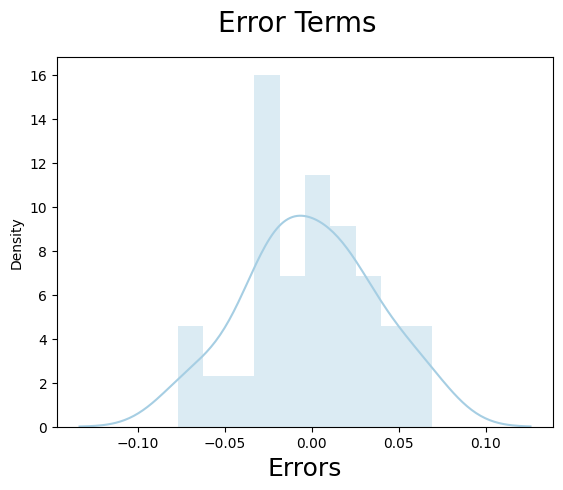

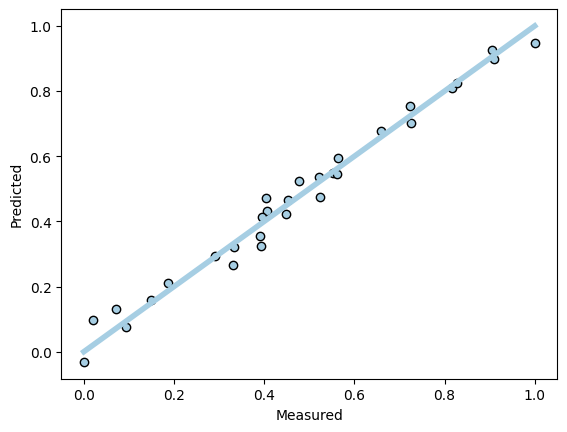

In [158]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_train, y_train_pred)
r_squared = r2_score(y_train, y_train_pred)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

fig=plt.figure()
sns.distplot((y_train-y_train_pred),bins=10)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()


fig, ax = plt.subplots()
ax.scatter(y_train, y_train_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],  lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [159]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

f = KFold(n_splits = 10, shuffle = True, random_state = 100)
lm=LinearRegression()
scores = cross_val_score(lm, X_train[features], y_train, scoring='r2', cv=f)
scores
y_pred = cross_val_predict(lm, X_train[features], y_train, cv=f)
scores


array([0.97755078, 0.98009502, 0.89039397, 0.96620471, 0.97599715,
       0.3740272 , 0.93878568, 0.91531249, 0.8285014 , 0.99485926])

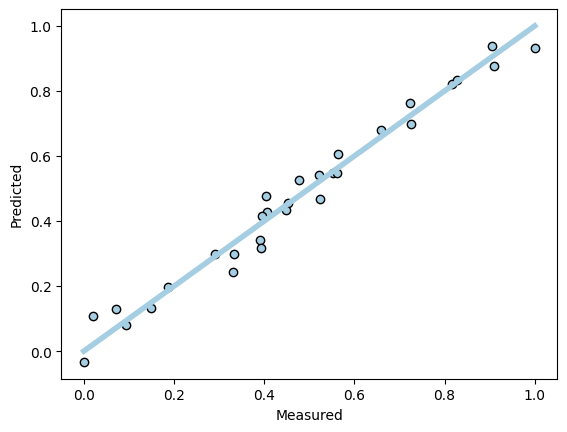

In [160]:

fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],  lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [161]:
df_test[df_test.columns]=scaler.fit_transform(df_test[df_test.columns])
X_test=df_test.drop('gmv',1)
y_test=df_test['gmv']


In [162]:
y_test_pred= lm_m.predict(X_test[features])

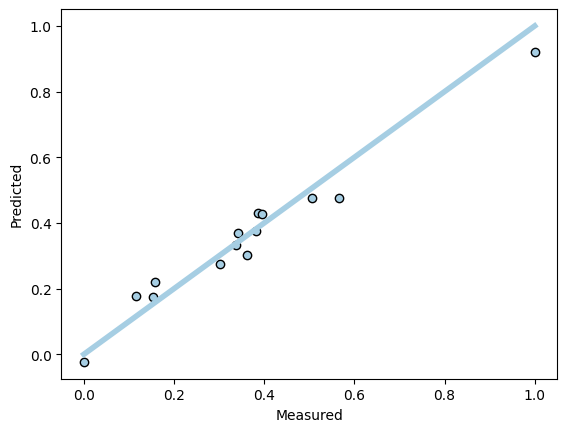

In [163]:
y_test.min()
y_test.max()
fig, ax = plt.subplots()
ax.scatter(y_test, y_test_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

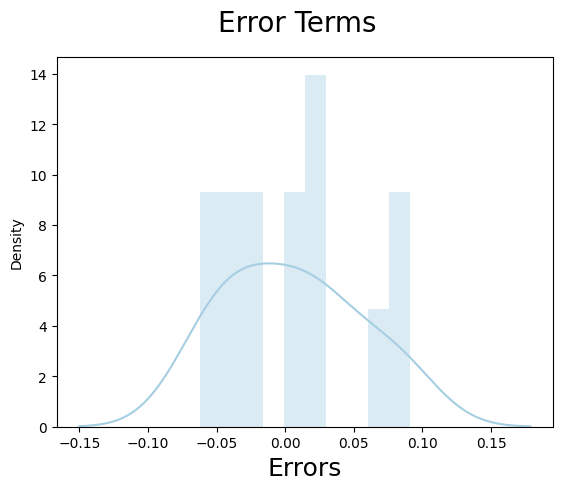

In [164]:
fig=plt.figure()
sns.distplot((y_test-y_test_pred),bins=10)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

In [165]:
cam_model2=pd.DataFrame(cam_model2.params)

In [166]:
cam_model2

0
discount_per    0.888702
max_temp_c      0.127993
Sponsorship_AD -0.114446

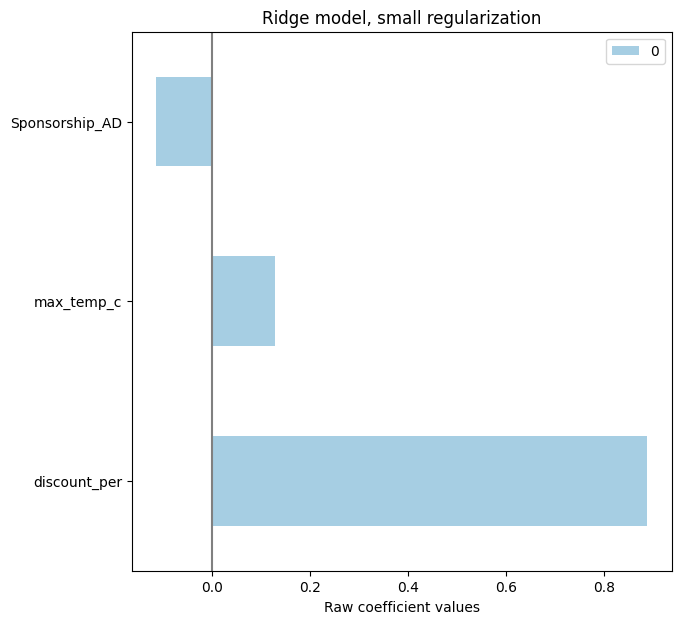

In [167]:
cam_model2.plot.barh(figsize=(9, 7))
plt.title("Ridge model, small regularization")
plt.axvline(x=0, color=".5")
plt.xlabel("Raw coefficient values")
plt.subplots_adjust(left=0.3)

# Home Audio

In [168]:
##
ha=EleData3[EleData3.product_analytic_sub_category=='homeaudio']
# camera.discount_per
# EleData3.product_analytic_sub_category.value_counts()

In [ ]:
+

In [169]:
ha.isnull().sum()
## analysis and all pending
ha_dummies=pd.get_dummies(ha.product_analytic_vertical_derived)
ha=pd.concat([ha,ha_dummies],axis=1)

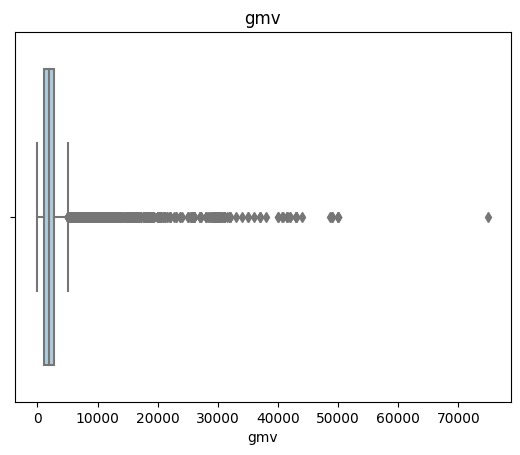

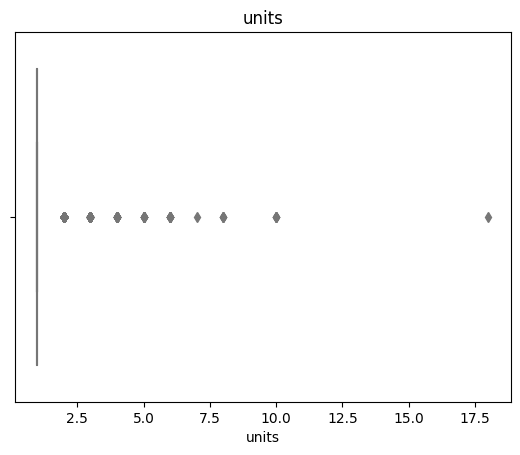

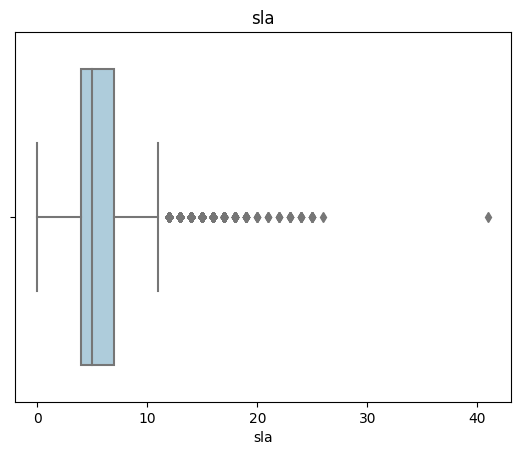

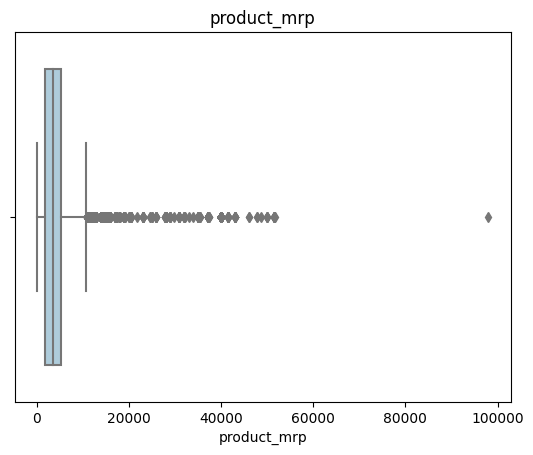

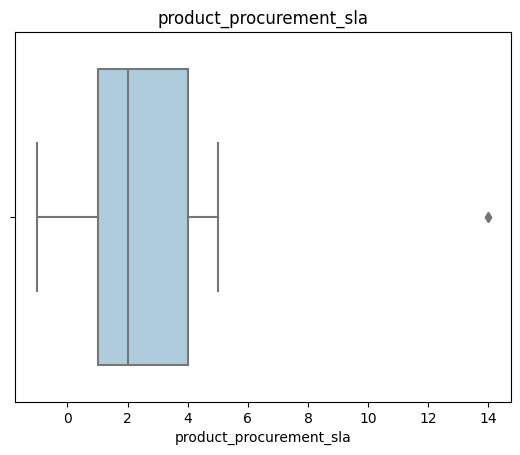

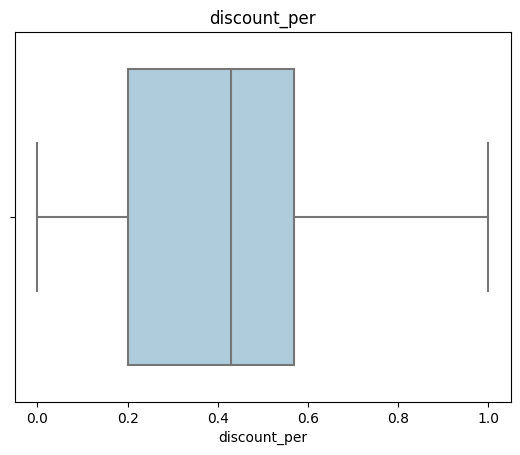

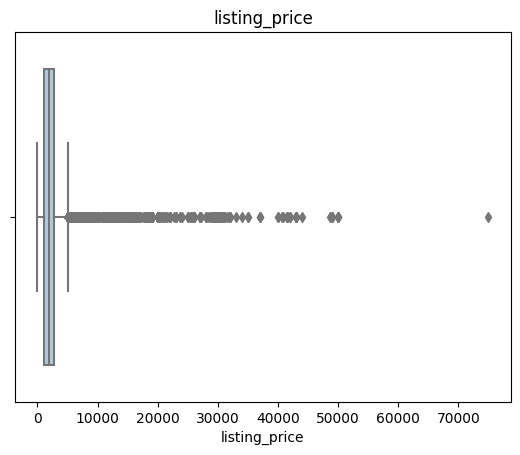

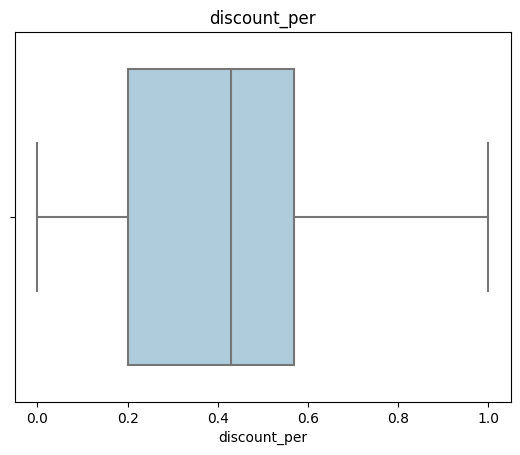

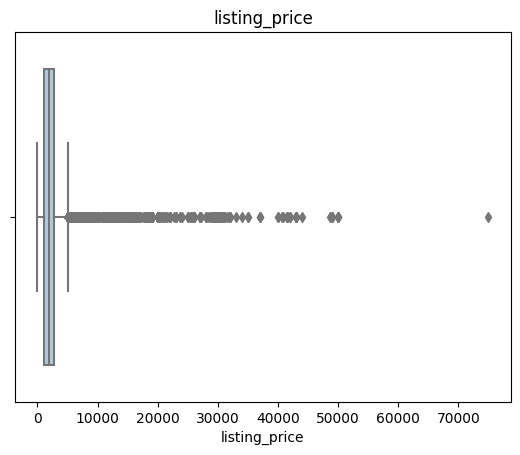

In [ ]:
for i in num:
  sns.boxplot(x=ha[i])
  plt.title(i)
  plt.show()


In [170]:


q1=ha['product_mrp'].quantile(0.25)
q3=ha['product_mrp'].quantile(0.75)
iqr=q3-q1
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
# ha[ha['product_mrp']>112000]
ha.loc[ha['product_mrp']>up,'product_mrp']=up
ha.loc[ha['product_mrp']<lw,'product_mrp']=lw


q1=ha['gmv'].quantile(0.25)
q3=ha['gmv'].quantile(0.75)
iqr=q3-q1
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
ha.loc[ha['gmv']>up,'gmv']=up
ha.loc[ha['gmv']<lw,'gmv']=lw


q1=ha['listing_price'].quantile(0.25)
q3=ha['listing_price'].quantile(0.75)
iqr=q3-q1
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
ha.loc[ha['listing_price']>up,'listing_price']=up
ha.loc[ha['listing_price']<lw,'listing_price']=lw


q1=ha['discount_per'].quantile(0.25)
q3=ha['discount_per'].quantile(0.75)
iqr=q3-q1
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
ha.loc[ha['discount_per']>up,'discount_per']=up
ha.loc[ha['discount_per']<lw,'discount_per']=lw

# ha[ha['discount_per']>1.39]
q1=ha['sla'].quantile(0.25)
q3=ha['sla'].quantile(0.75)
iqr=q3-q1
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
ha.loc[ha['sla']>up,'sla']=up
ha.loc[ha['sla']<lw,'sla']=lw
q1=ha['product_procurement_sla'].quantile(0.25)
q3=ha['product_procurement_sla'].quantile(0.75)
iqr=q3-q1
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
ha.loc[ha['product_procurement_sla']>up,'product_procurement_sla']=up
ha.loc[ha['product_procurement_sla']<lw,'product_procurement_sla']=lw

-3761.0   10895.0
-1309.5   5102.5
-1315.5   5072.5
-0.3549999999999999   1.125
-0.5   11.5
-3.5   8.5


In [175]:
ha.week.value_counts()

16    7882
19    3801
25    3712
34    3361
44    3336
32    3284
28    3112
30    2920
36    2833
27    2734
23    2663
18    2650
37    2606
26    2521
17    2514
24    2511
2     2482
35    2407
3     2371
31    2361
15    2198
4     2150
38    2125
33    2090
22    2069
10    2055
13    2053
29    2020
12    2016
11    1954
20    1939
14    1936
21    1877
48    1795
39    1786
45    1781
40    1731
49    1639
50    1616
46    1593
41    1554
51    1422
47    1415
52    1264
42    1178
5      945
43     426
1      401
53     347
9      315
Name: week, dtype: int64

In [171]:

ha_wk=ha.groupby(['week']).agg({"order_item_id":"nunique",'gmv':'sum','units':'sum','order_payment_type':'sum','sla':'mean',
                                        'product_mrp':'sum','product_procurement_sla':'mean','listing_price':'sum',
                                         'discount_per':'sum','Stock_Index':'max','NPS':'max','pay_date_flag':'max',
                                          "Holiday_flag": "nunique",'sale_date':"nunique","fmradio":"sum","homeaudiospeaker":"sum"}).round(2)

ha_wk=pd.merge(ha_wk,weekly_kpis,on='week')

ha_wk.rename(columns={"sales_date":"num_of_sales"},inplace=True)

ha_wk.drop(['heat_deg_c','mon_temp_c','Year','Month','Day','Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing',
       'Online marketing', 'Affiliates', 'SEM', 'Radio', 'Other'],1,inplace=True)

ha_wk.order_payment_type.value_counts()
ha_wk.rename(columns={'order_item_id':'order_count',"order_payment_type":"order_payment_cod",'mon_temp_c':"min_temp_c","pay_date_flag":"pay_day_in_wk"},inplace=True)
ha_wk["cod_per"]=ha_wk["order_payment_cod"]/ha_wk["order_count"]
ha_wk.drop("order_payment_cod",1,inplace=True)
ha_wk.rename(columns={'sale_date':"num_of_sales"},inplace=True)


In [172]:
ha_wk['sales_per']=(ha_wk['num_of_sales']-1)/7
ha_wk.drop('num_of_sales',1,inplace=True)

In [174]:
plt.figure(figsize=(15,6))
sns.barplot(x=ha_wk['week'],y=ha_wk['gmv'])
plt.title("Week vs GMV")
plt.show()

### 16 , 19 , 25, 30 ,32,34  ,44 week

KeyError: ignored

<Figure size 1500x600 with 0 Axes>

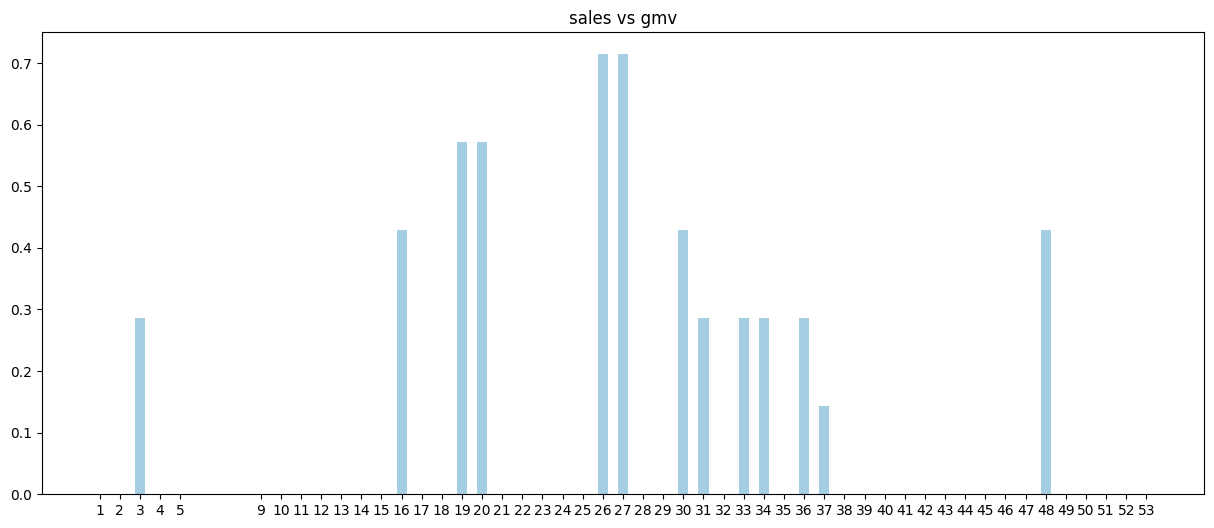

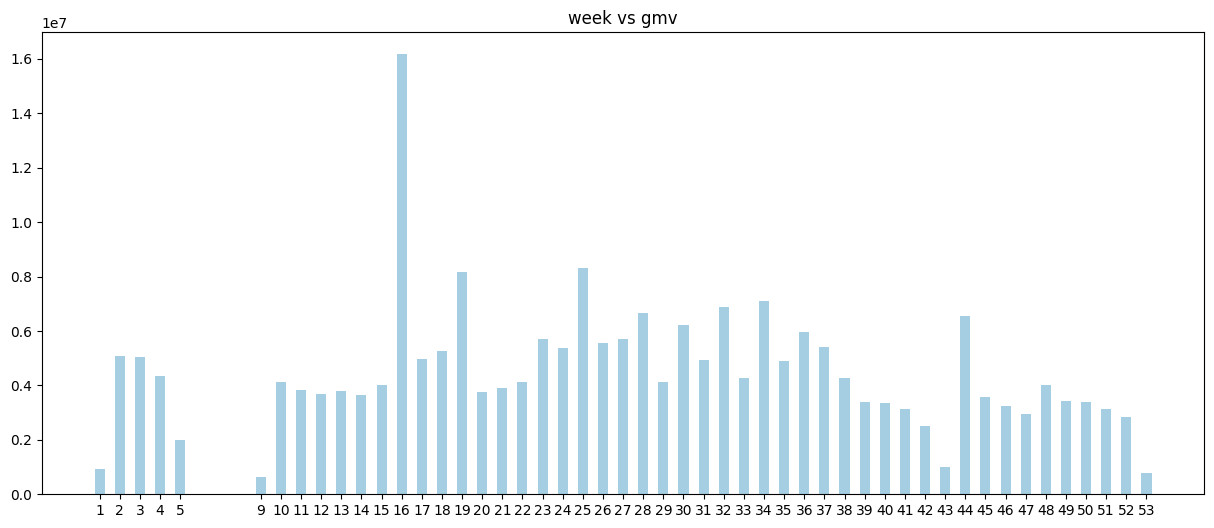

In [ ]:
plt.figure(figsize=(15,6))
width=0.5
plt.bar(x=ha_wk['week'],height=ha_wk['sales_per'],width=width)
plt.xticks(ha_wk['week'])
plt.title('sales vs gmv')
plt.show()
plt.figure(figsize=(15,6))
plt.bar(x=ha_wk['week'],height=ha_wk['gmv'],width=width)
plt.xticks(ha_wk['week'])
plt.title('week vs gmv')
plt.show()


## sales 16 , 19, 20, 26,27,30,31, 33,34,48
## doesnt have much impact specially week 20 ,33,34 etc

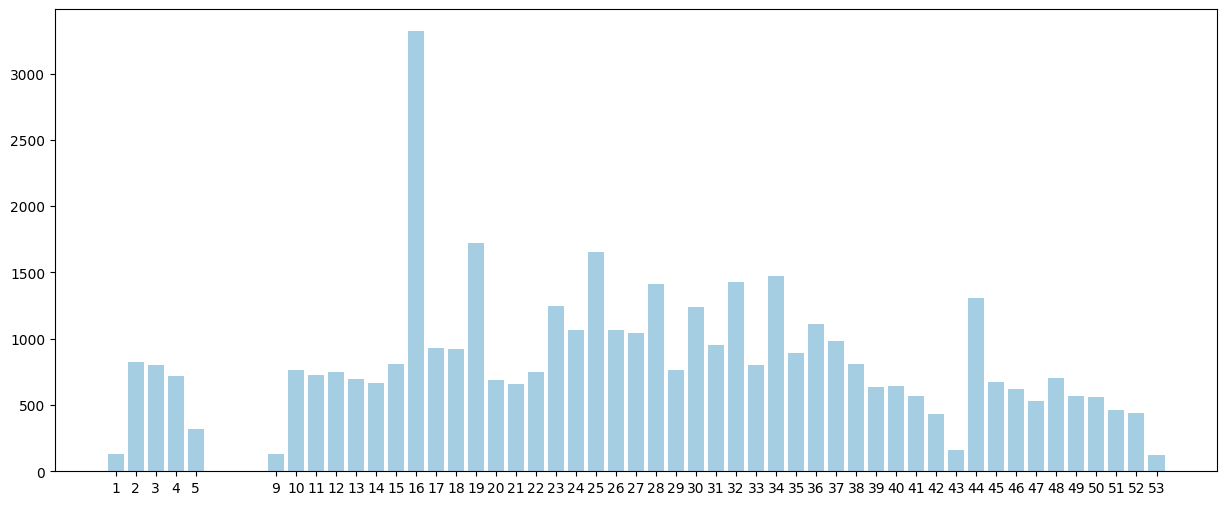

In [ ]:
plt.figure(figsize=(15,6))
plt.bar(x=ha_wk['week'],height=ha_wk['discount_per'])
plt.xticks(ha_wk['week'])
plt.show()

# 16,19,23,25,28,30,32,34,44
## impacting gmv

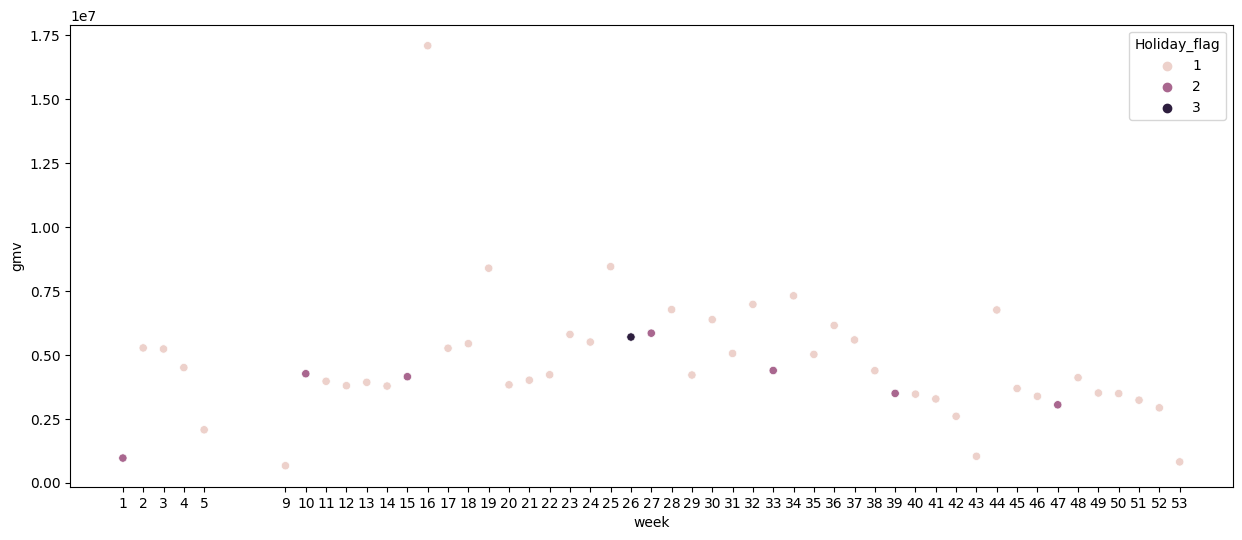

In [ ]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=ha_wk['week'],y=ha_wk['gmv'],hue=ha_wk['Holiday_flag'])
plt.xticks(ha_wk['week'])
plt.show()


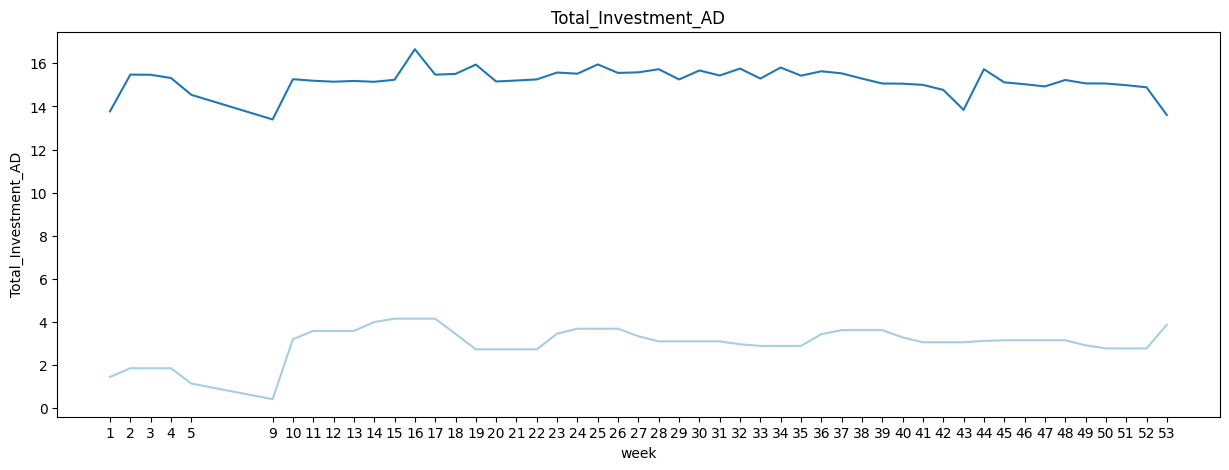

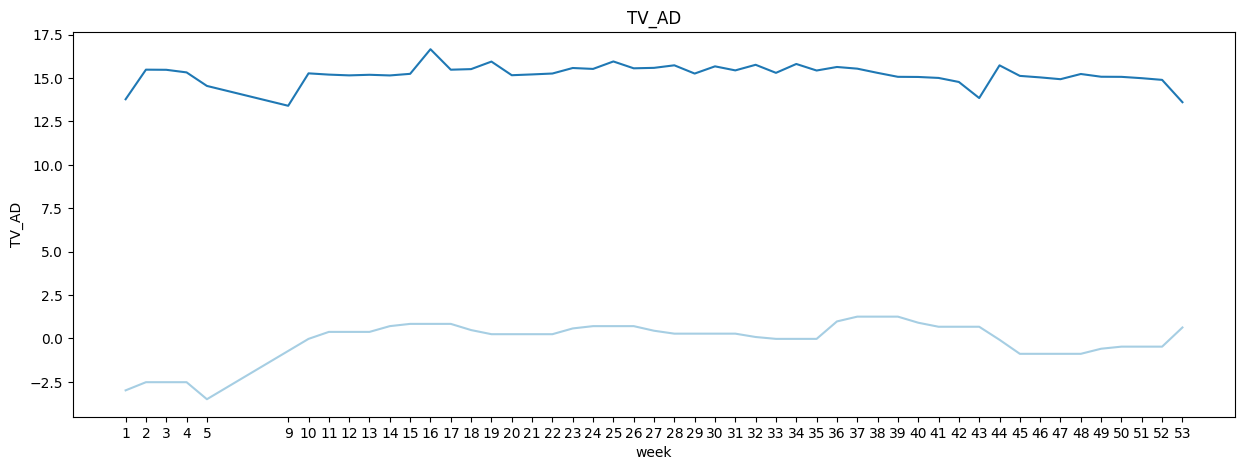

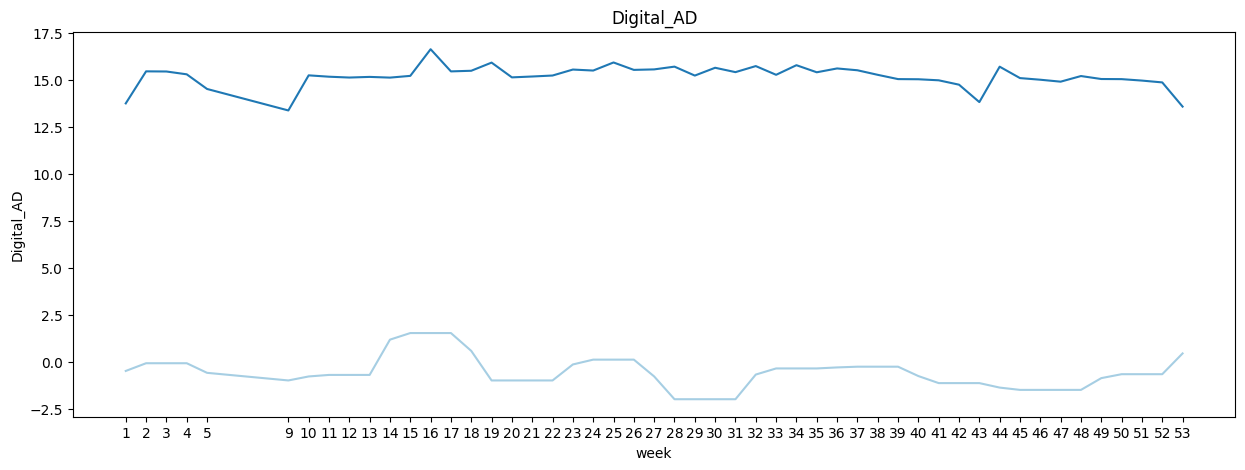

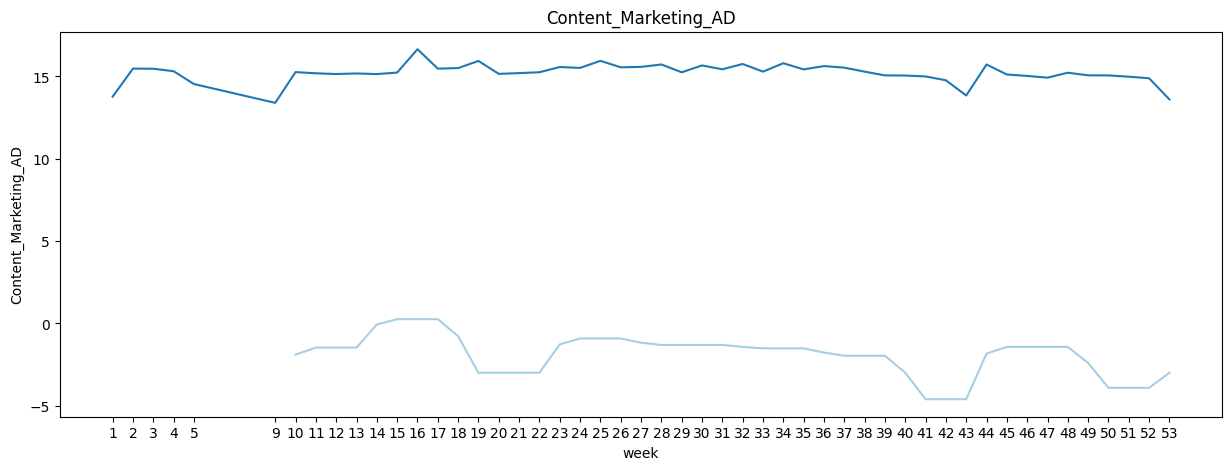

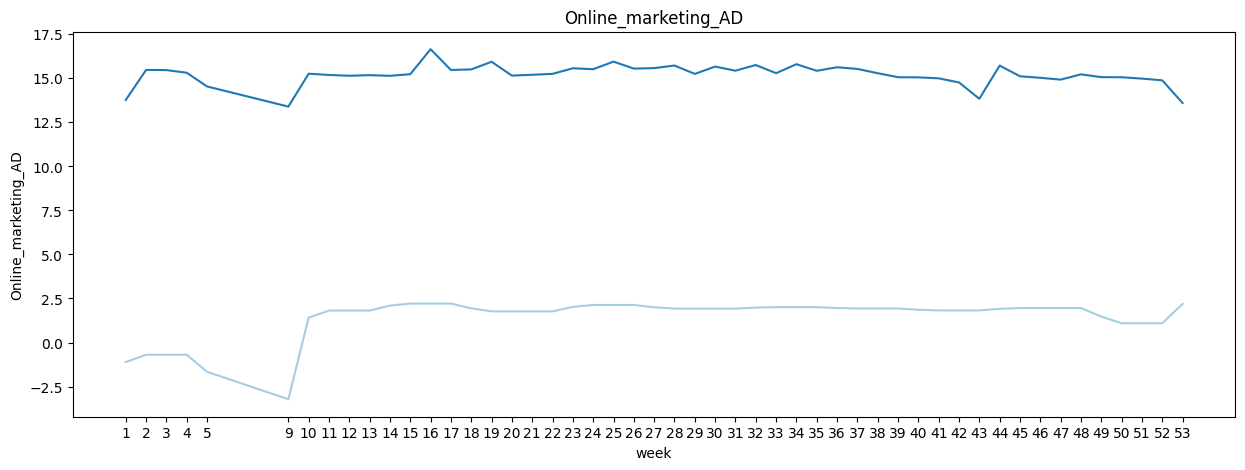

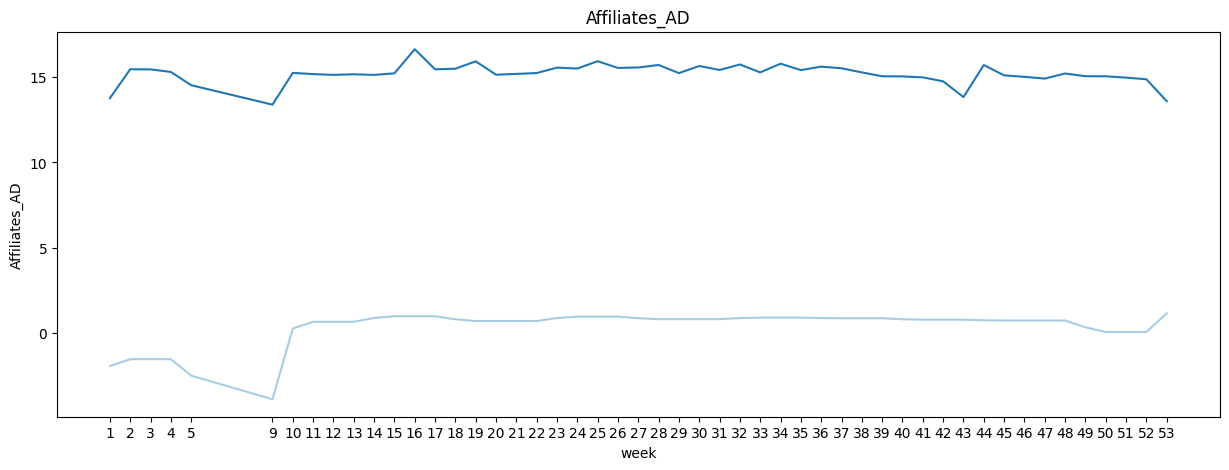

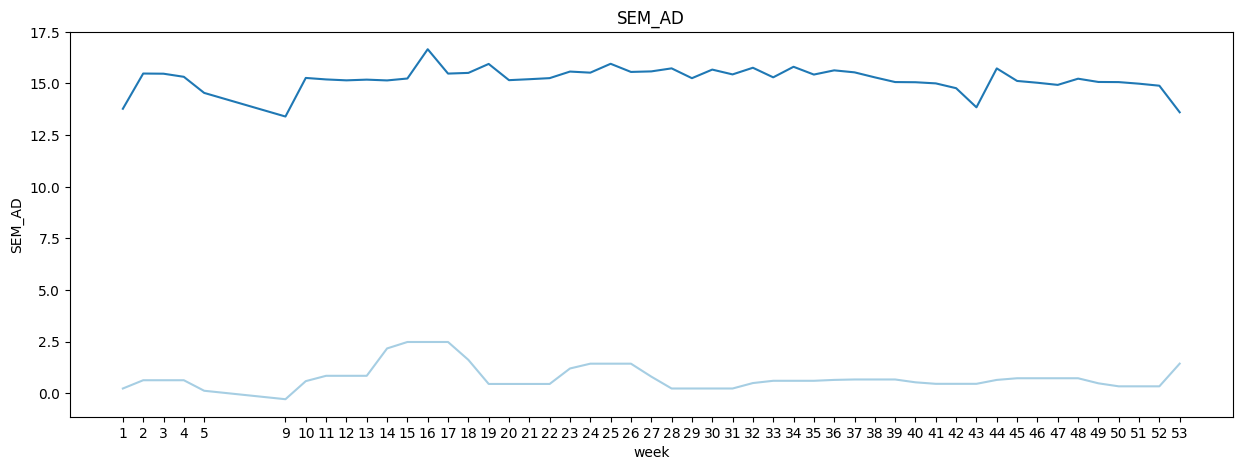

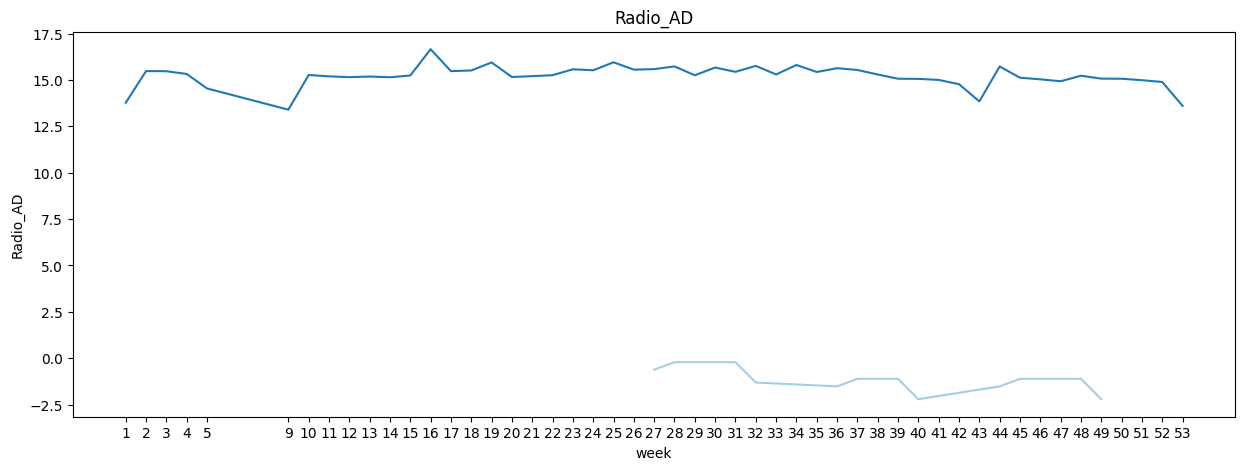

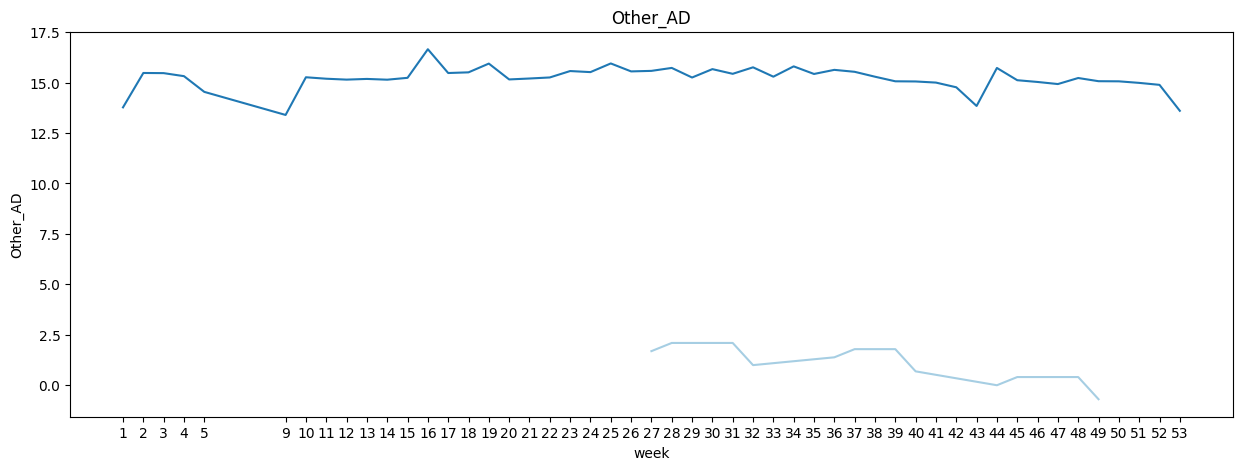

In [ ]:
markinv = ['Total_Investment_AD', 'TV_AD','Digital_AD', 'Content_Marketing_AD', 'Online_marketing_AD','Affiliates_AD', 'SEM_AD', 'Radio_AD', 'Other_AD','gmv']

# average_sale_per_week
# plt.figure(figsize=(25, 19))
x=1
for i in markinv:
  if i != 'gmv':
    # plt.subplot(9,1,x)
    plt.figure(figsize=(15, 5))
    plt.title(i)
    sns.lineplot(x=ha_wk['week'],y=nm.log(ha_wk[i]))
    sns.lineplot(x=ha_wk['week'],y=nm.log(ha_wk['gmv']))
    plt.xticks(ha_wk['week'])
    x=x+1
    plt.show()

## radio , other , conent , digital and total : not required



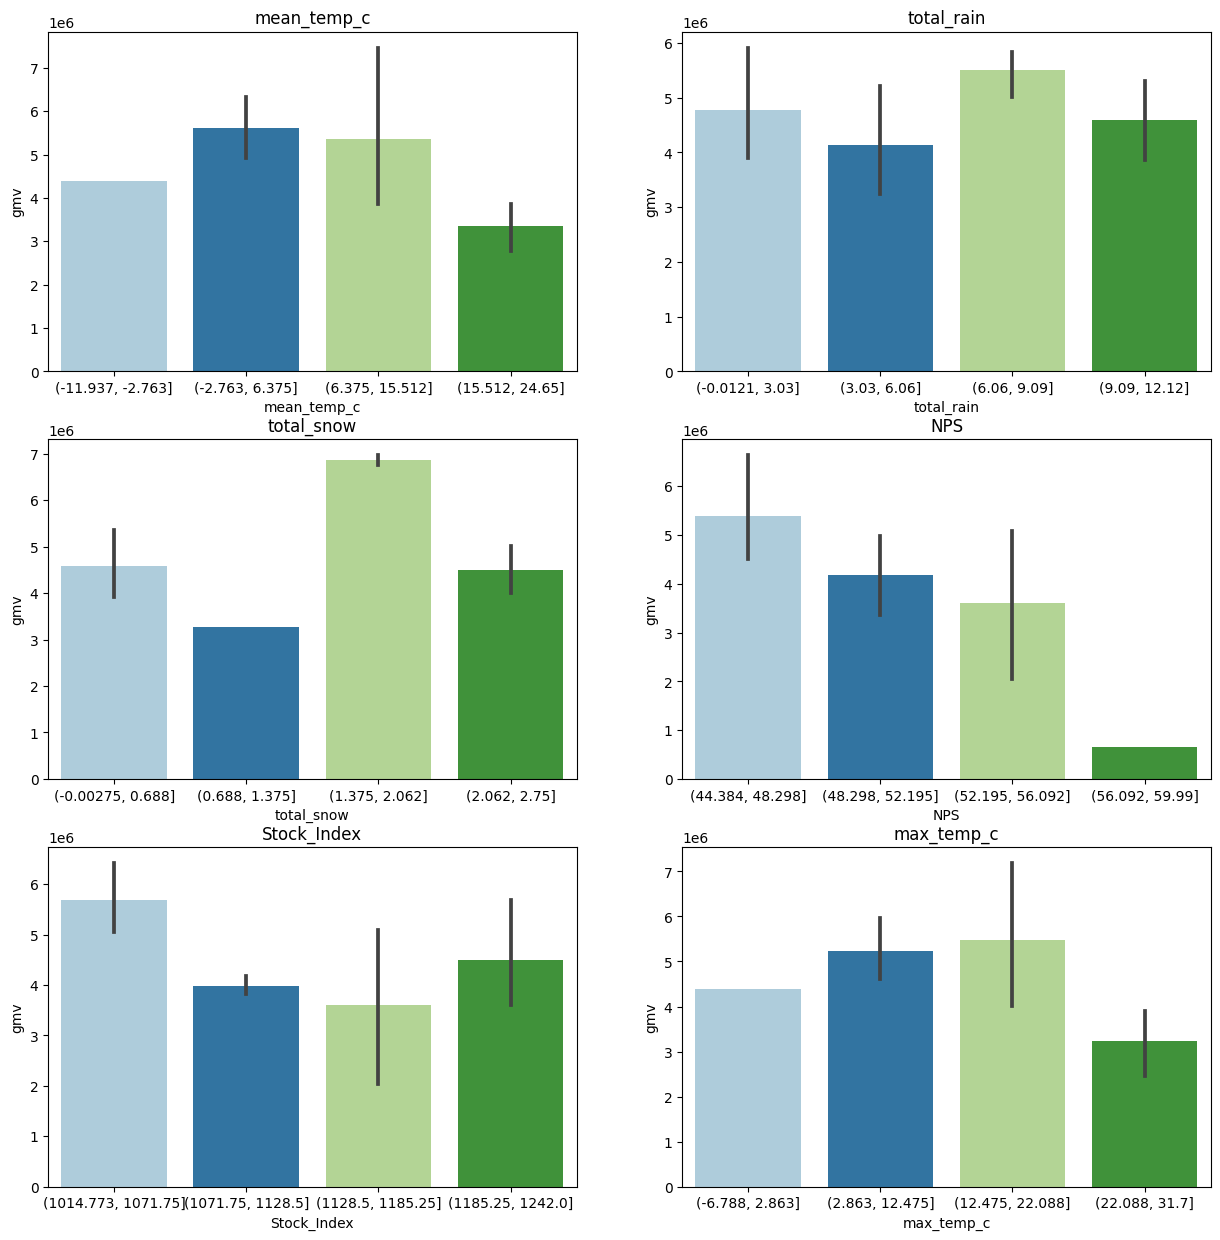

In [ ]:
wc = ['mean_temp_c', 'total_rain', 'total_snow','NPS',"Stock_Index",'max_temp_c']

plt.figure(figsize=(15, 15))
x=1
for i in wc:
  plt.subplot(3,2,x)
  plt.title(i)
  sns.barplot(y=ha_wk['gmv'],x=pd.cut(ha_wk[i],bins=4))
  x=x+1


# max and mean almost same impact : so max temp can be remobed

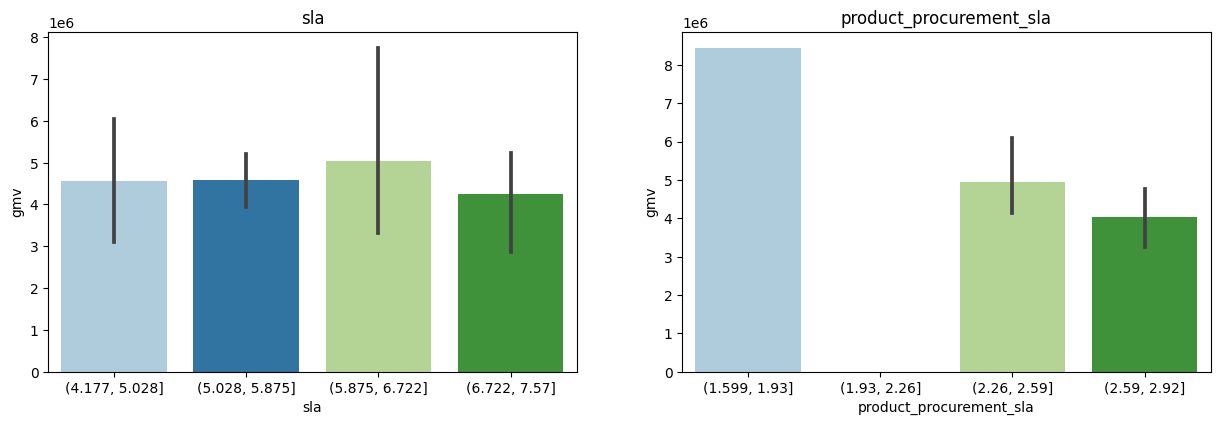

In [ ]:
wc = ['sla','product_procurement_sla']

plt.figure(figsize=(15, 15))
x=1
for i in wc:
  plt.subplot(3,2,x)
  plt.title(i)
  sns.barplot(y=ha_wk['gmv'],x=pd.cut(ha_wk[i],bins=4))
  x=x+1

## product procurement sla has a impact

In [173]:
ha_wk.drop(['max_temp_c',"Total_Investment_AD","Holiday_flag","units","order_count","product_mrp","sales_per",'week'],1,inplace=True)


In [176]:
ha_wk.drop(['Other_AD'],1,inplace=True)

In [177]:


df_train, df_test = train_test_split(ha_wk, train_size = 0.7, test_size = 0.3, random_state = 100)
scaler=MinMaxScaler()

scale_var=camera.columns
df_train[df_train.columns]=scaler.fit_transform(df_train[df_train.columns])
X_train=df_train.drop('gmv',1)
y_train=df_train['gmv']
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=15, step=1)
selector.fit(X_train, y_train)

# print(selector.support_)
# print(selector.ranking_)
df=pd.DataFrame(list(zip(X_train.columns,selector.support_,selector.ranking_)))
features =X_train.columns[selector.support_]
features



Index(['sla', 'product_procurement_sla', 'listing_price', 'discount_per',
       'NPS', 'pay_day_in_wk', 'fmradio', 'homeaudiospeaker', 'mean_temp_c',
       'total_rain', 'Digital_AD', 'Content_Marketing_AD',
       'Online_marketing_AD', 'SEM_AD', 'cod_per'],
      dtype='object')

In [178]:
x_train_m =build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.635e+05
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           2.97e-47
Time:                        09:38:16   Log-Likelihood:                 228.31
No. Observations:                  35   AIC:                            -424.6
Df Residuals:                      19   BIC:                            -399.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features      VIF
2             listing_price  3789.34
7          homeaudiospeaker  3682.20
3              discount_per   646.13
13                   SEM_AD   512.72
10               Digital_AD   263.46
6                   fmradio   136.69
11     Content_Marketing_AD    78.85
14                  cod_per    76.99
4                       NPS    35.62
0                       sla    28.40
8               mean_temp_c    28.22
1   product_procurement_sla    27.82
12      Online_marketing_AD    27.22
5             pay_day_in_wk     2.50
9                total_rain     2.47

In [179]:
features=features.drop('listing_price',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1456.
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           6.50e-27
Time:                        09:38:20   Log-Likelihood:                 135.26
No. Observations:                  35   AIC:                            -240.5
Df Residuals:                      20   BIC:                            -217.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features     VIF
2              discount_per  633.66
6          homeaudiospeaker  569.25
12                   SEM_AD  256.82
9                Digital_AD  150.67
10     Content_Marketing_AD   55.05
5                   fmradio   41.75
13                  cod_per   38.03
1   product_procurement_sla   27.65
7               mean_temp_c   20.05
11      Online_marketing_AD   19.78
0                       sla   17.01
3                       NPS   16.40
4             pay_day_in_wk    2.49
8                total_rain    2.43

In [180]:
features=features.drop('homeaudiospeaker',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     288.2
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           1.28e-20
Time:                        09:38:22   Log-Likelihood:                 104.83
No. Observations:                  35   AIC:                            -181.7
Df Residuals:                      21   BIC:                            -159.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features     VIF
11                   SEM_AD  222.46
8                Digital_AD  123.86
9      Content_Marketing_AD   54.03
12                  cod_per   37.67
5                   fmradio   35.57
1   product_procurement_sla   22.64
10      Online_marketing_AD   19.61
6               mean_temp_c   17.97
0                       sla   16.67
3                       NPS   16.35
2              discount_per   15.50
7                total_rain    2.38
4             pay_day_in_wk    2.17

In [181]:
features=features.drop('SEM_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     326.8
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           6.93e-22
Time:                        09:38:24   Log-Likelihood:                 104.82
No. Observations:                  35   AIC:                            -183.6
Df Residuals:                      22   BIC:                            -163.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
5                   fmradio  35.20
9      Content_Marketing_AD  33.58
11                  cod_per  26.16
1   product_procurement_sla  22.53
8                Digital_AD  20.44
10      Online_marketing_AD  17.04
0                       sla  15.99
2              discount_per  15.11
3                       NPS  10.61
6               mean_temp_c   9.82
7                total_rain   2.38
4             pay_day_in_wk   2.16

In [182]:
features=features.drop('fmradio',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     320.9
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           1.91e-22
Time:                        09:38:25   Log-Likelihood:                 102.22
No. Observations:                  35   AIC:                            -180.4
Df Residuals:                      23   BIC:                            -161.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
8      Content_Marketing_AD  31.84
10                  cod_per  24.99
1   product_procurement_sla  20.87
7                Digital_AD  19.61
9       Online_marketing_AD  15.85
5               mean_temp_c   9.53
3                       NPS   9.38
0                       sla   7.83
2              discount_per   5.11
6                total_rain   2.19
4             pay_day_in_wk   2.13

In [183]:
features=features.drop('cod_per',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     344.1
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           2.17e-23
Time:                        09:38:27   Log-Likelihood:                 101.03
No. Observations:                  35   AIC:                            -180.1
Df Residuals:                      24   BIC:                            -163.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
8     Content_Marketing_AD  31.84
7               Digital_AD  19.23
1  product_procurement_sla  18.37
9      Online_marketing_AD  14.01
3                      NPS   9.29
5              mean_temp_c   8.20
0                      sla   6.76
2             discount_per   4.55
6               total_rain   2.19
4            pay_day_in_wk   2.13

In [184]:
features=features.drop('pay_day_in_wk',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     336.8
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           8.30e-24
Time:                        09:38:29   Log-Likelihood:                 98.125
No. Observations:                  35   AIC:                            -176.3
Df Residuals:                      25   BIC:                            -160.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
7     Content_Marketing_AD  28.10
1  product_procurement_sla  18.37
6               Digital_AD  17.53
8      Online_marketing_AD  13.79
3                      NPS   8.71
4              mean_temp_c   8.20
0                      sla   6.65
2             discount_per   4.55
5               total_rain   2.19

In [185]:
features=features.drop('total_rain',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     394.0
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           4.02e-25
Time:                        09:38:32   Log-Likelihood:                 98.123
No. Observations:                  35   AIC:                            -178.2
Df Residuals:                      26   BIC:                            -164.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
6     Content_Marketing_AD  27.47
1  product_procurement_sla  18.05
5               Digital_AD  16.77
7      Online_marketing_AD  13.64
3                      NPS   8.51
4              mean_temp_c   7.94
0                      sla   6.55
2             discount_per   4.53

In [186]:
features=features.drop('Content_Marketing_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     467.3
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           1.79e-26
Time:                        09:38:34   Log-Likelihood:                 98.110
No. Observations:                  35   AIC:                            -180.2
Df Residuals:                      27   BIC:                            -167.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
1  product_procurement_sla  17.97
6      Online_marketing_AD   8.69
4              mean_temp_c   7.85
3                      NPS   6.89
0                      sla   6.52
2             discount_per   4.50
5               Digital_AD   2.88

In [187]:
features=features.drop('mean_temp_c',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     564.3
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           7.37e-28
Time:                        09:38:35   Log-Likelihood:                 98.077
No. Observations:                  35   AIC:                            -182.2
Df Residuals:                      28   BIC:                            -171.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
1  product_procurement_sla  15.33
5      Online_marketing_AD   8.66
0                      sla   6.44
3                      NPS   6.38
2             discount_per   4.50
4               Digital_AD   2.65

In [188]:
features=features.drop('product_procurement_sla',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     606.9
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           2.09e-28
Time:                        09:38:37   Log-Likelihood:                 95.567
No. Observations:                  35   AIC:                            -179.1
Df Residuals:                      29   BIC:                            -169.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0367    

Features   VIF
0                  sla  5.86
1         discount_per  4.48
4  Online_marketing_AD  4.40
2                  NPS  3.73
3           Digital_AD  2.62

In [189]:
features=features.drop('sla',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     782.6
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           7.26e-30
Time:                        09:38:42   Log-Likelihood:                 95.519
No. Observations:                  35   AIC:                            -181.0
Df Residuals:                      30   BIC:                            -173.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0396    

Features   VIF
0         discount_per  4.48
3  Online_marketing_AD  4.21
2           Digital_AD  1.95
1                  NPS  1.62

In [190]:
features=features.drop('NPS',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     1068.
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           2.34e-31
Time:                        09:38:44   Log-Likelihood:                 95.354
No. Observations:                  35   AIC:                            -182.7
Df Residuals:                      31   BIC:                            -176.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0490    

Features   VIF
0         discount_per  4.37
2  Online_marketing_AD  3.84
1           Digital_AD  1.92

In [192]:
lm = sm.OLS(y_train,X_train[features]).fit() # fitting the model
print(lm.summary()) # model summary
y_train_pred=lm.predict(X_train[features])
ha_features1=features

ha_mode1=lm

                                 OLS Regression Results                                
Dep. Variable:                    gmv   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                              1708.
Date:                Mon, 09 Oct 2023   Prob (F-statistic):                    2.22e-35
Time:                        09:39:13   Log-Likelihood:                          80.219
No. Observations:                  35   AIC:                                     -154.4
Df Residuals:                      32   BIC:                                     -149.8
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

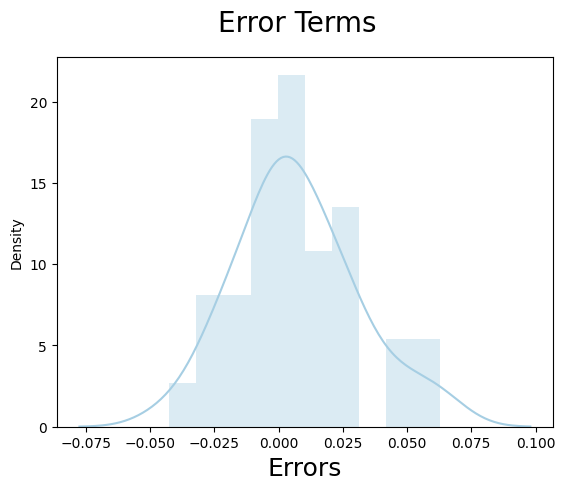

Text(0, 0.5, 'y_pred')

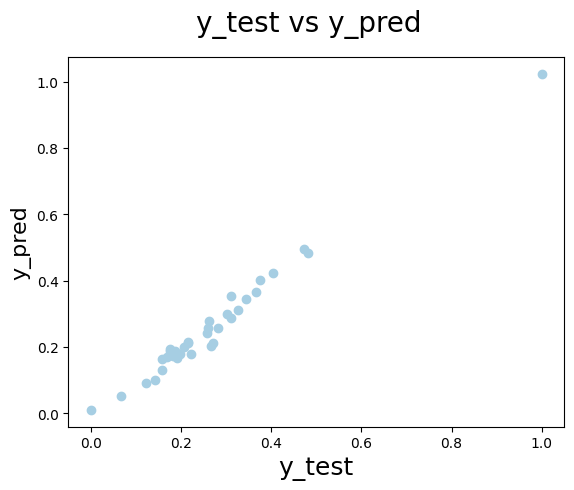

In [193]:
fig=plt.figure()
sns.distplot((y_train-y_train_pred),bins=10)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_train ,y_train_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)


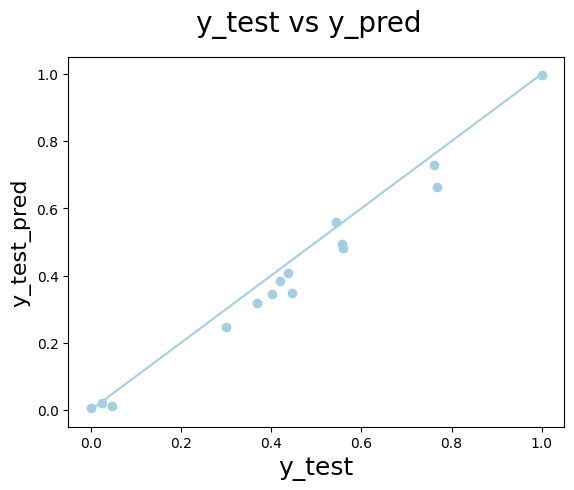

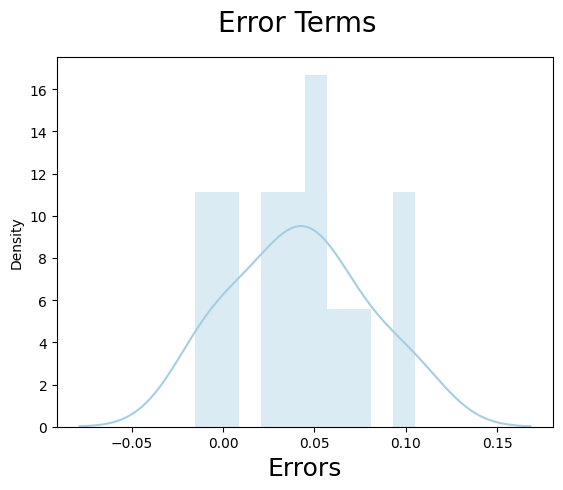

In [194]:
df_test[df_train.columns]=scaler.fit_transform(df_test[df_train.columns])
X_test=df_test.drop('gmv',1)
y_test=df_test['gmv']
X_test=sm.add_constant(X_test)
X_test=X_test[features]
y_test_pred=lm.predict(X_test)

# Plotting y_test and y_pred to understand the spread

fig,ax = plt.subplots()
ax.scatter(y_test, y_test_pred )
fig.suptitle('y_test vs y_pred', fontsize = 20)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])#,  lw=1)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

fig=plt.figure()
sns.distplot((y_test-y_test_pred),bins=10)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()


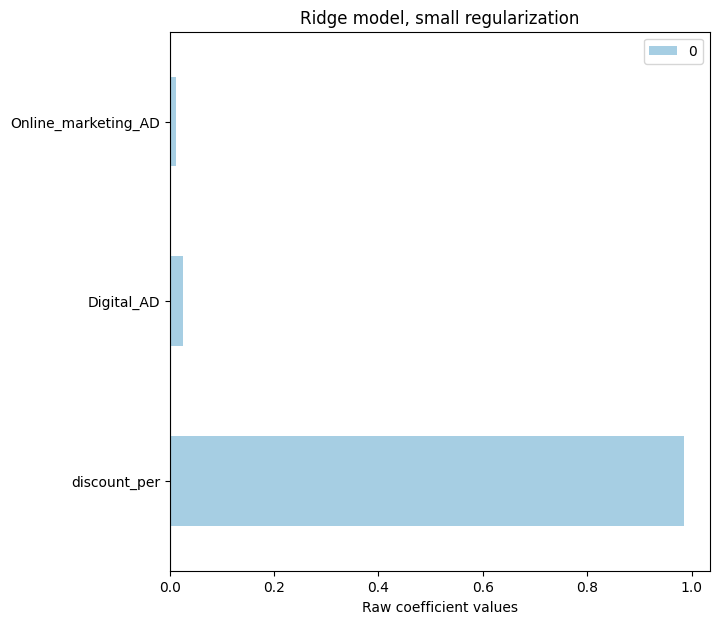

In [196]:
ha_model1=pd.DataFrame(ha_mode1.params)
ha_model1.plot.barh(figsize=(9, 7))
plt.title("Ridge model, small regularization")
plt.axvline(x=0, color=".5")
plt.xlabel("Raw coefficient values")
plt.subplots_adjust(left=0.3)

Multiplicative

In [ ]:

# ha_wk=ha.groupby(['week']).agg({"order_item_id":"nunique",'gmv':'sum','units':'sum','order_payment_type':'sum','sla':'mean',
#                                         'product_mrp':'sum','product_procurement_sla':'mean','listing_price':'sum',
#                                          'discount_per':'sum','Stock_Index':'max','NPS':'max','pay_date_flag':'max',
#                                           "Holiday_flag": "nunique",'sale_date':"nunique"}).round(2)

# ha_wk=pd.merge(ha_wk,weekly_kpis,on='week')

# ha_wk.rename(columns={"sales_date":"num_of_sales"},inplace=True)

# ha_wk.drop(['heat_deg_c','mon_temp_c','Year','Month','Day','Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing',
#        'Online marketing', 'Affiliates', 'SEM', 'Radio', 'Other'],1,inplace=True)

# ha_wk.order_payment_type.value_counts()
# ha_wk.rename(columns={'order_item_id':'order_count',"order_payment_type":"order_payment_cod",'mon_temp_c':"min_temp_c","pay_date_flag":"pay_day_in_wk"},inplace=True)
# ha_wk["cod_per"]=ha_wk["order_payment_cod"]/ha_wk["order_count"]
# ha_wk.drop("order_payment_cod",1,inplace=True)
# ha_wk.rename(columns={'sale_date':"num_of_sales"},inplace=True)
# ha_wk['sales_per']=(ha_wk['num_of_sales']-1)/7
# ha_wk.drop('num_of_sales',1,inplace=True)

In [197]:
ha_wk[ha_wk.columns]=nm.log(ha_wk[ha_wk.columns])

ha_wk=ha_wk.replace([nm.inf, -nm.inf], 0)
ha_wk=ha_wk.fillna(0)

# ha_wk.drop(['product_mrp','order_count','Other_AD','units'],1,inplace=True)

In [198]:
df_train, df_test = train_test_split(ha_wk, train_size = 0.7, test_size = 0.3, random_state = 100)
scaler=MinMaxScaler()
scale_var=camera.columns
df_train[df_train.columns]=scaler.fit_transform(df_train[df_train.columns])
X_train=df_train.drop('gmv',1)
y_train=df_train['gmv']
# X_train


In [199]:
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=15, step=1)
selector.fit(X_train, y_train)

df=pd.DataFrame(list(zip(X_train.columns,selector.support_,selector.ranking_)))
features =X_train.columns[selector.support_]
features


Index(['sla', 'product_procurement_sla', 'listing_price', 'discount_per',
       'NPS', 'fmradio', 'homeaudiospeaker', 'mean_temp_c', 'total_rain',
       'Digital_AD', 'Content_Marketing_AD', 'Sponsorship_AD',
       'Online_marketing_AD', 'SEM_AD', 'cod_per'],
      dtype='object')

In [ ]:
x_train_m =build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.806e+05
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           1.08e-45
Time:                        11:49:50   Log-Likelihood:                 222.11
No. Observations:                  35   AIC:                            -412.2
Df Residuals:                      19   BIC:                            -387.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features      VIF
6          homeaudiospeaker  8178.53
2             listing_price  7521.84
3              discount_per  2010.97
5                   fmradio   388.00
14                  cod_per   150.68
12      Online_marketing_AD   108.89
13                   SEM_AD   105.00
10     Content_Marketing_AD    92.80
9                Digital_AD    79.44
0                       sla    53.00
11           Sponsorship_AD    41.05
4                       NPS    33.23
1   product_procurement_sla    30.63
7               mean_temp_c    18.28
8                total_rain     9.50

In [201]:
features=features.drop('homeaudiospeaker',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

KeyError: ignored

In [202]:
features=features.drop('listing_price',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     204.3
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           4.59e-19
Time:                        09:41:00   Log-Likelihood:                 99.269
No. Observations:                  35   AIC:                            -170.5
Df Residuals:                      21   BIC:                            -148.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features     VIF
4                   fmradio  214.61
12                  cod_per  110.58
2              discount_per  107.11
11                   SEM_AD   72.43
8      Content_Marketing_AD   69.79
10      Online_marketing_AD   62.33
7                Digital_AD   60.58
0                       sla   49.39
9            Sponsorship_AD   30.59
1   product_procurement_sla   27.61
3                       NPS   21.22
5               mean_temp_c   16.42
6                total_rain    9.17

In [203]:
features=features.drop('fmradio',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     231.7
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           2.95e-20
Time:                        09:41:02   Log-Likelihood:                 99.254
No. Observations:                  35   AIC:                            -172.5
Df Residuals:                      22   BIC:                            -152.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
11                  cod_per  83.60
10                   SEM_AD  66.01
9       Online_marketing_AD  55.80
6                Digital_AD  52.65
7      Content_Marketing_AD  50.63
2              discount_per  29.16
1   product_procurement_sla  26.25
8            Sponsorship_AD  25.19
3                       NPS  20.44
4               mean_temp_c  14.93
0                       sla  13.03
5                total_rain   8.74

In [204]:
features=features.drop('product_procurement_sla',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     243.3
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           4.47e-21
Time:                        09:41:04   Log-Likelihood:                 97.824
No. Observations:                  35   AIC:                            -171.6
Df Residuals:                      23   BIC:                            -153.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0024 

Features    VIF
10               cod_per  80.53
9                 SEM_AD  66.00
5             Digital_AD  52.62
6   Content_Marketing_AD  50.48
8    Online_marketing_AD  49.99
1           discount_per  27.96
7         Sponsorship_AD  25.12
2                    NPS  18.96
3            mean_temp_c  14.74
0                    sla  12.85
4             total_rain   8.67

In [205]:
features=features.drop('cod_per',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     216.2
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           5.35e-21
Time:                        09:41:06   Log-Likelihood:                 93.389
No. Observations:                  35   AIC:                            -164.8
Df Residuals:                      24   BIC:                            -147.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0496 

Features    VIF
5            Digital_AD  33.01
8   Online_marketing_AD  32.84
9                SEM_AD  32.23
6  Content_Marketing_AD  29.12
7        Sponsorship_AD  24.75
1          discount_per  24.35
2                   NPS  13.54
0                   sla  12.76
3           mean_temp_c   9.91
4            total_rain   8.64

In [206]:
features=features.drop('SEM_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     249.6
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           3.37e-22
Time:                        09:41:08   Log-Likelihood:                 93.343
No. Observations:                  35   AIC:                            -166.7
Df Residuals:                      25   BIC:                            -151.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0429 

Features    VIF
8   Online_marketing_AD  30.53
7        Sponsorship_AD  24.73
1          discount_per  22.34
6  Content_Marketing_AD  17.96
5            Digital_AD  12.45
0                   sla  12.01
3           mean_temp_c   9.47
4            total_rain   8.53
2                   NPS   5.53

In [207]:
features=features.drop('total_rain',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     291.2
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           1.96e-23
Time:                        09:41:10   Log-Likelihood:                 93.297
No. Observations:                  35   AIC:                            -168.6
Df Residuals:                      26   BIC:                            -154.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0388 

Features    VIF
6        Sponsorship_AD  23.75
7   Online_marketing_AD  22.74
1          discount_per  21.81
5  Content_Marketing_AD  17.49
4            Digital_AD  12.41
0                   sla  11.75
3           mean_temp_c   9.46
2                   NPS   5.07

In [208]:
features=features.drop('NPS',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     344.5
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           1.05e-24
Time:                        09:41:12   Log-Likelihood:                 93.239
No. Observations:                  35   AIC:                            -170.5
Df Residuals:                      27   BIC:                            -158.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0490 

Features    VIF
1          discount_per  21.74
6   Online_marketing_AD  20.65
5        Sponsorship_AD  18.71
4  Content_Marketing_AD  17.43
3            Digital_AD  12.18
0                   sla  11.59
2           mean_temp_c   5.96

In [209]:
features=features.drop('Content_Marketing_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     400.3
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           8.56e-26
Time:                        09:41:14   Log-Likelihood:                 92.539
No. Observations:                  35   AIC:                            -171.1
Df Residuals:                      28   BIC:                            -160.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0417    

Features    VIF
5  Online_marketing_AD  20.40
4       Sponsorship_AD  18.70
1         discount_per  15.63
3           Digital_AD  11.75
0                  sla   8.09
2          mean_temp_c   5.92

In [210]:
features=features.drop('Online_marketing_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     483.4
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           5.47e-27
Time:                        09:41:16   Log-Likelihood:                 92.041
No. Observations:                  35   AIC:                            -172.1
Df Residuals:                      29   BIC:                            -162.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0223      0.017      1.

Features   VIF
4  Sponsorship_AD  9.61
3      Digital_AD  8.71
0             sla  7.78
1    discount_per  6.21
2     mean_temp_c  5.70

In [211]:
features=features.drop('sla',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     580.1
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           6.15e-28
Time:                        09:41:18   Log-Likelihood:                 90.751
No. Observations:                  35   AIC:                            -171.5
Df Residuals:                      30   BIC:                            -163.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0126      0.016      0.

Features   VIF
3  Sponsorship_AD  7.49
2      Digital_AD  6.60
0    discount_per  4.23
1     mean_temp_c  4.03

In [221]:
lm = sm.OLS(y_train,X_train[features]).fit() # fitting the model
print(lm.summary()) # model summary
y_train_pred=lm.predict(X_train[features])
ha_model2=lm
ha_features2=features

                                 OLS Regression Results                                
Dep. Variable:                    gmv   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                              7487.
Date:                Mon, 09 Oct 2023   Prob (F-statistic):                    8.75e-46
Time:                        09:42:36   Log-Likelihood:                          90.379
No. Observations:                  35   AIC:                                     -172.8
Df Residuals:                      31   BIC:                                     -166.5
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

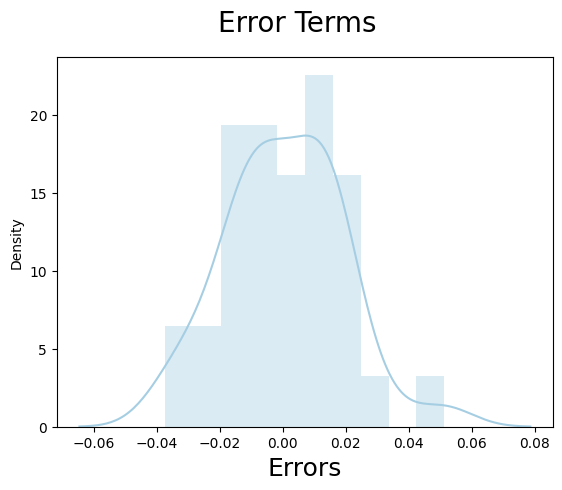

Text(0, 0.5, 'y_pred')

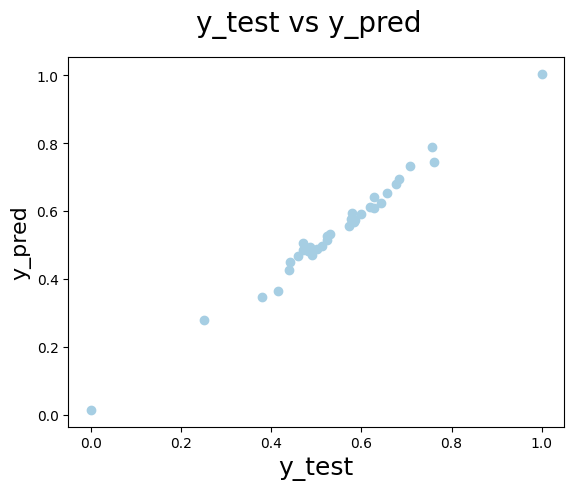

In [215]:
fig=plt.figure()
sns.distplot((y_train-y_train_pred),bins=10)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_train ,y_train_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)


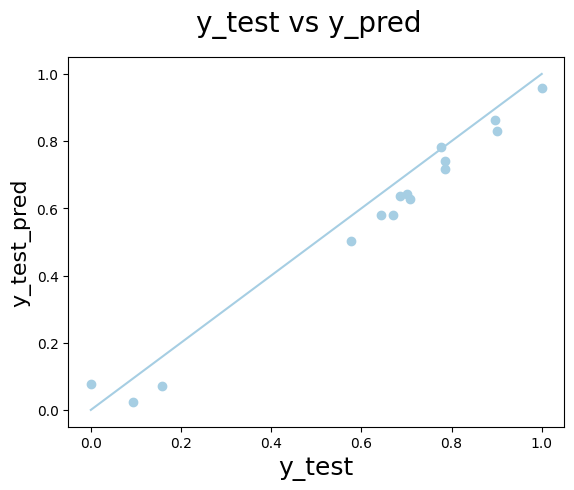

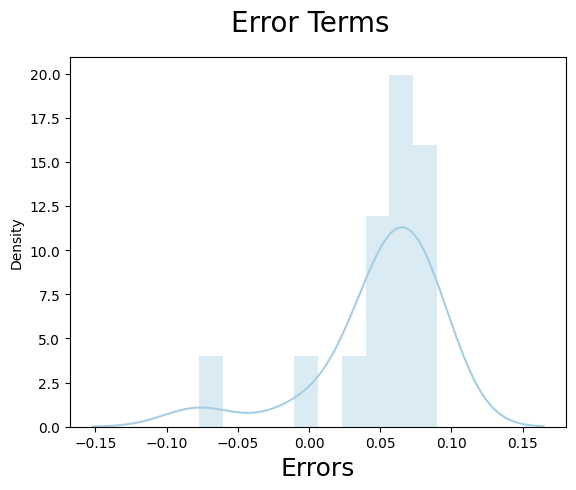

In [216]:
df_test[df_train.columns]=scaler.fit_transform(df_test[df_train.columns])
X_test=df_test.drop('gmv',1)
y_test=df_test['gmv']
X_test=sm.add_constant(X_test)
X_test=X_test[features]

y_test_pred=lm.predict(X_test)

# Plotting y_test and y_pred to understand the spread

fig,ax = plt.subplots()
ax.scatter(y_test, y_test_pred )
fig.suptitle('y_test vs y_pred', fontsize = 20)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])#,  lw=1)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

fig=plt.figure()
sns.distplot((y_test-y_test_pred),bins=10)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()


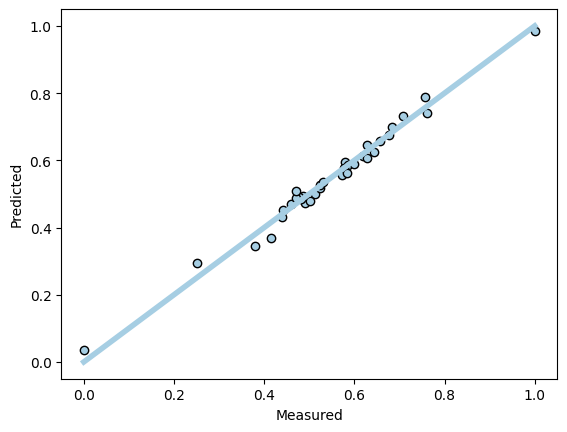

array([0.9904142 , 0.97440846, 0.97422425, 0.94072766, 0.96886949])

In [217]:
f = KFold(n_splits = 5, shuffle = True, random_state = 100)
lm=LinearRegression()
scores = cross_val_score(lm, X_train[features], y_train, scoring='r2', cv=f)

y_pred = cross_val_predict(lm, X_train[features], y_train, cv=f)



fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],  lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

scores

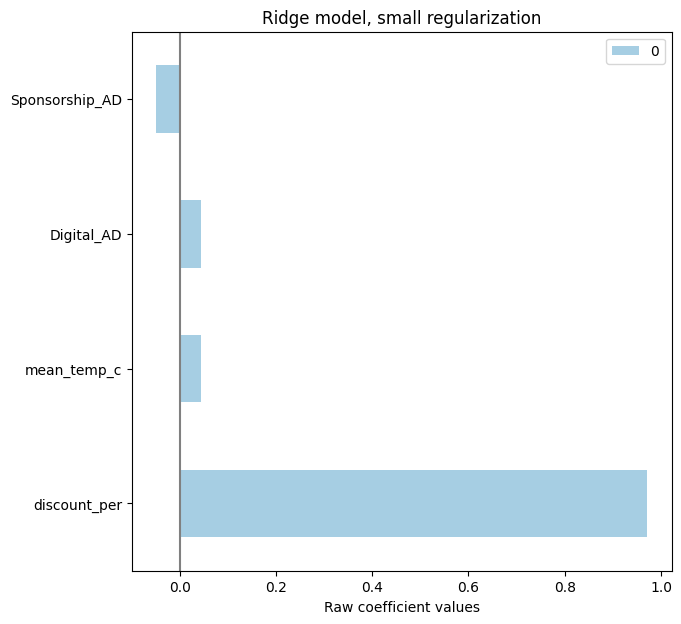

In [222]:
ha_model2=pd.DataFrame(ha_model2.params)
ha_model2.plot.barh(figsize=(9, 7))
plt.title("Ridge model, small regularization")
plt.axvline(x=0, color=".5")
plt.xlabel("Raw coefficient values")
plt.subplots_adjust(left=0.3)

In [ ]:
ha_features

Index(['discount_per', 'mean_temp_c', 'Digital_AD', 'Sponsorship_AD'], dtype='object')

Gaming Accessories

In [223]:
game=EleData3[EleData3.product_analytic_sub_category=='gamingaccessory']
# game.discount_per


In [224]:
# game.columns
game_dum=pd.get_dummies(game.product_analytic_vertical_derived)
game=pd.concat([game,game_dum],axis=1)

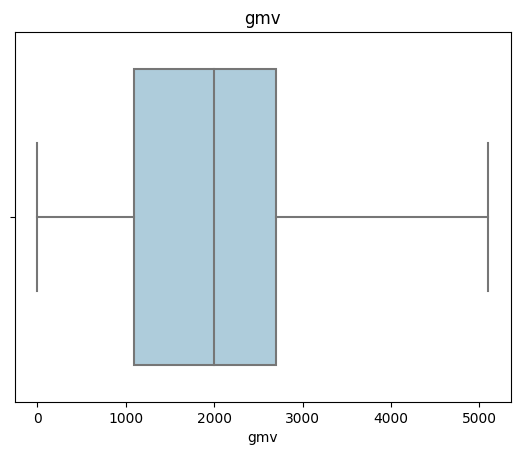

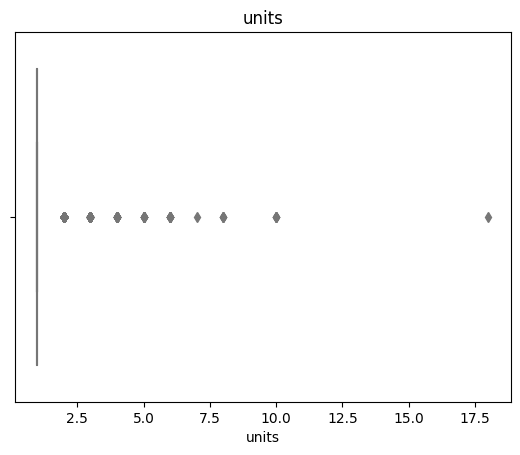

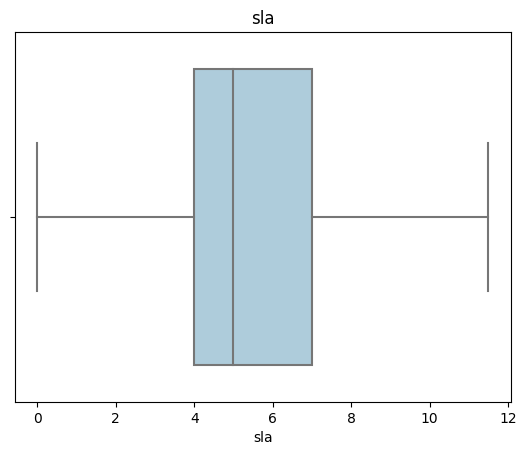

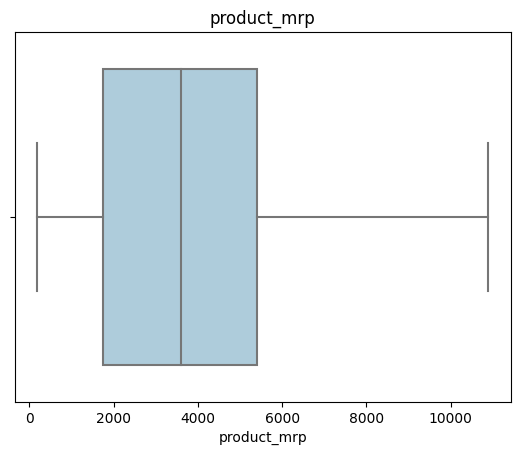

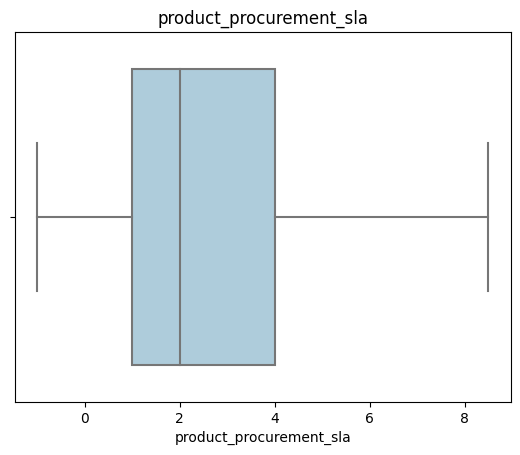

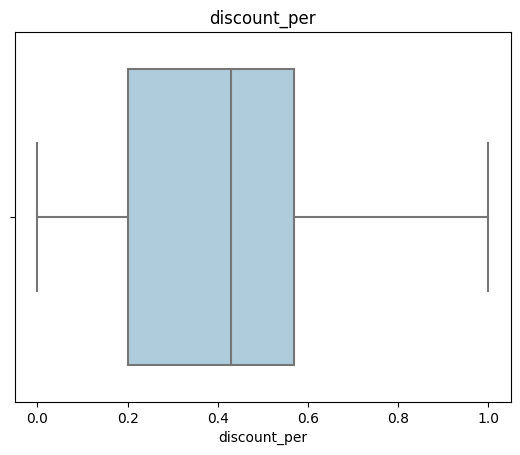

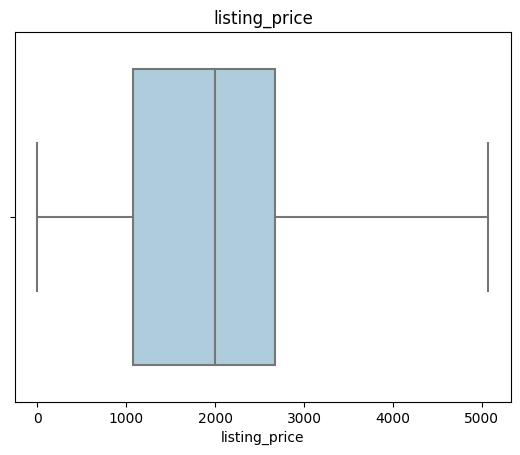

In [225]:
for i in num:
  sns.boxplot(x=ha[i])
  plt.title(i)
  plt.show()

In [226]:


q1=game['product_mrp'].quantile(0.25)
q3=game['product_mrp'].quantile(0.75)
iqr=q3-q1
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
game.loc[game['product_mrp']>up,'product_mrp']=up
game.loc[game['product_mrp']<lw,'product_mrp']=lw


q1=game['gmv'].quantile(0.25)
q3=game['gmv'].quantile(0.75)
iqr=q3-q1
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
game.loc[game['gmv']>up,'gmv']=up
game.loc[game['gmv']<lw,'gmv']=lw


q1=game['listing_price'].quantile(0.25)
q3=game['listing_price'].quantile(0.75)
iqr=q3-q1
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
game.loc[game['listing_price']>up,'listing_price']=up
game.loc[game['listing_price']<lw,'listing_price']=lw


q1=game['discount_per'].quantile(0.25)
q3=game['discount_per'].quantile(0.75)
iqr=q3-q1
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
game.loc[game['discount_per']>up,'discount_per']=up
game.loc[game['discount_per']<lw,'discount_per']=lw

# game[game['discount_per']>1.39]
q1=game['sla'].quantile(0.25)
q3=game['sla'].quantile(0.75)
iqr=q3-q1
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
game.loc[game['sla']>up,'sla']=up
game.loc[game['sla']<lw,'sla']=lw
q1=game['product_procurement_sla'].quantile(0.25)
q3=game['product_procurement_sla'].quantile(0.75)
iqr=q3-q1
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
game.loc[game['product_procurement_sla']>up,'product_procurement_sla']=up
game.loc[game['product_procurement_sla']<lw,'product_procurement_sla']=lw


-1127.5   3476.5
-700.0   1924.0
-648.5   1827.5
-0.22999999999999998   1.13
-0.5   11.5
0.5   4.5


In [ ]:
game.gmv.describe()

284-1.5*(284+940)

-1552.0

In [337]:
game_wk=game.groupby(['week']).agg({"order_item_id":"nunique",'gmv':'sum','units':'sum','order_payment_type':'sum','sla':'mean',
                                        'product_mrp':'sum','product_procurement_sla':'mean','listing_price':'sum',
                                         'discount_per':'sum','Stock_Index':'max','NPS':'max','pay_date_flag':'max',
                                          "Holiday_flag": "nunique",'sale_date':"nunique"}).round(2)

game_wk=pd.merge(game_wk,weekly_kpis,on='week')

game_wk.rename(columns={"sales_date":"num_of_sales"},inplace=True)

# game_wk.drop(['heat_deg_c','mon_temp_c','Year','Month','Day','Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing',
      #  'Online marketing', 'Affiliates', 'SEM', 'Radio', 'Other'],1,inplace=True)

game_wk.drop(['heat_deg_c','mon_temp_c','Year','Month','Day'],1,inplace=True)

game_wk.order_payment_type.value_counts()
game_wk.rename(columns={'order_item_id':'order_count',"order_payment_type":"order_payment_cod",'mon_temp_c':"min_temp_c","pay_date_flag":"pay_day_in_wk"},inplace=True)
game_wk["cod_per"]=game_wk["order_payment_cod"]/game_wk["order_count"]
game_wk.drop("order_payment_cod",1,inplace=True)
game_wk.rename(columns={'sale_date':"num_of_sales"},inplace=True)

game_wk['sales_per']=(game_wk['num_of_sales']-1)/7
game_wk.drop('num_of_sales',1,inplace=True)

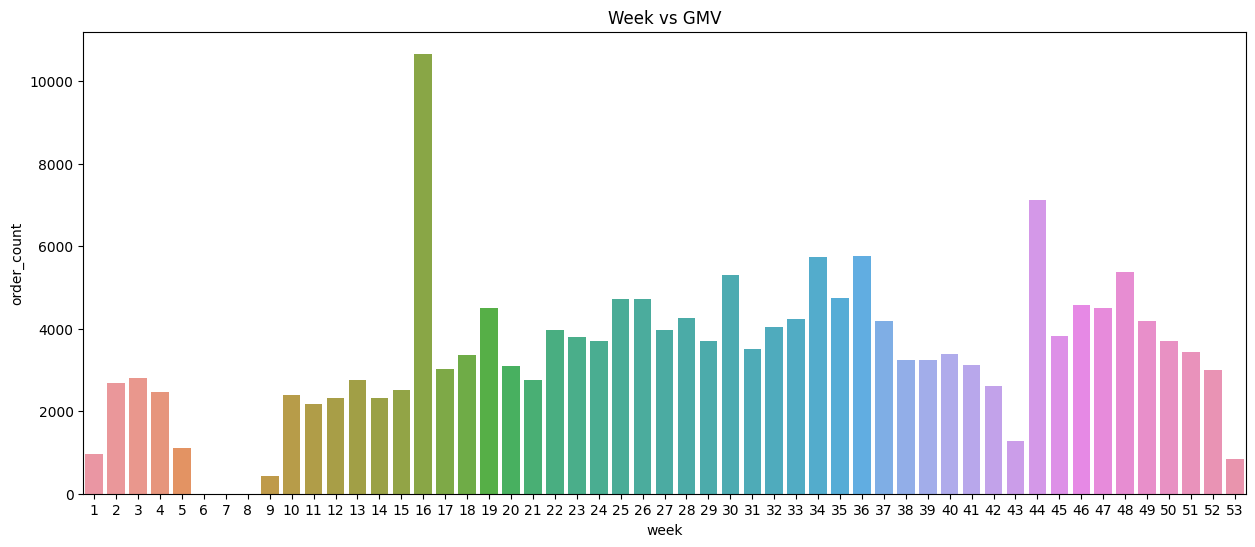

In [338]:
plt.figure(figsize=(15,6))
sns.barplot(x=game_wk['week'],y=game_wk['order_count'])
plt.title("Week vs GMV")
plt.show()
## 16 , 19, 20, 34, 36, 44

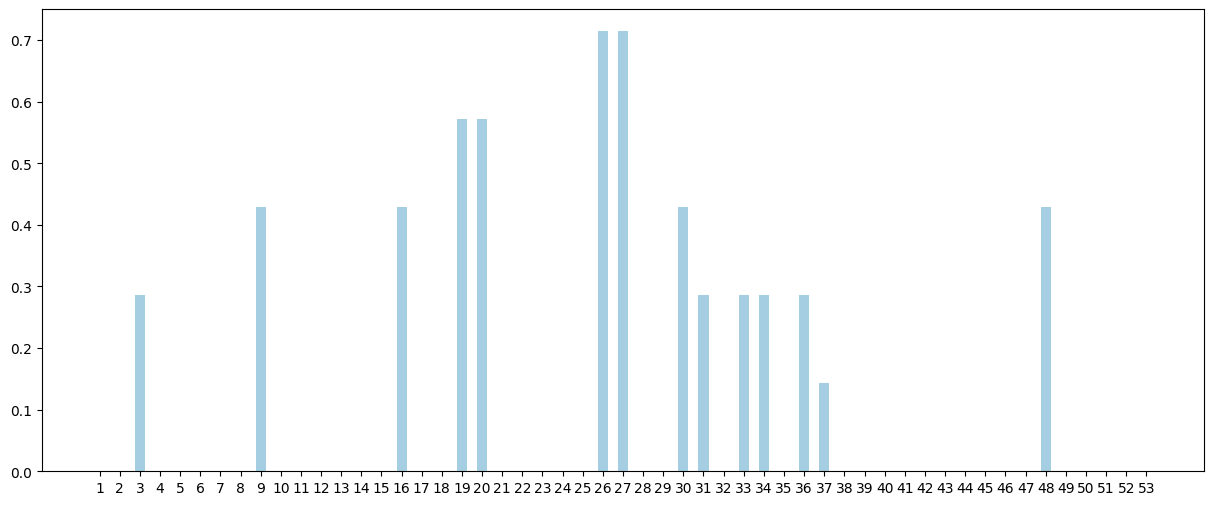

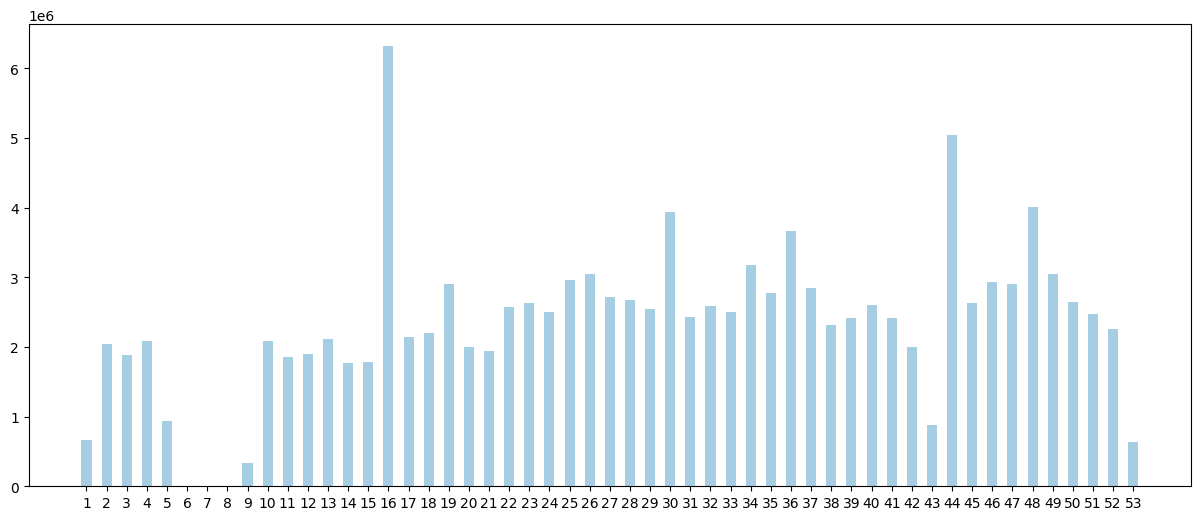

In [339]:
plt.figure(figsize=(15,6))
width=0.5
plt.bar(x=game_wk['week'],height=game_wk['sales_per'],width=width)
plt.xticks(game_wk['week'])
plt.show()
plt.figure(figsize=(15,6))
plt.bar(x=game_wk['week'],height=game_wk['gmv'],width=width)
plt.xticks(game_wk['week'])
plt.show()


## sales per as impact

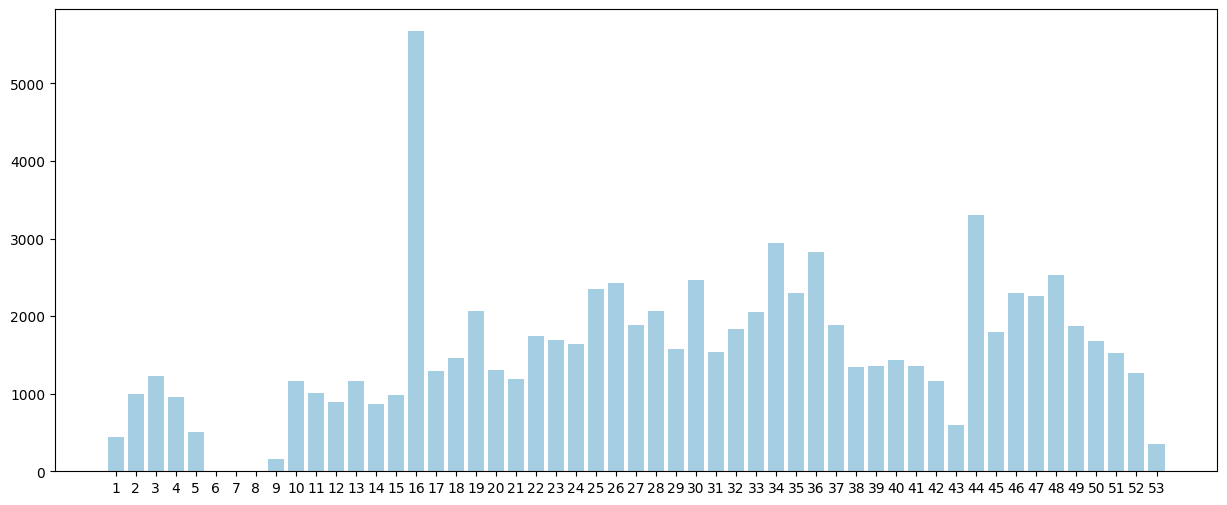

In [340]:
plt.figure(figsize=(15,6))
plt.bar(x=game_wk['week'],height=game_wk['discount_per'])
plt.xticks(game_wk['week'])
plt.show()

## not very much changes because of discount


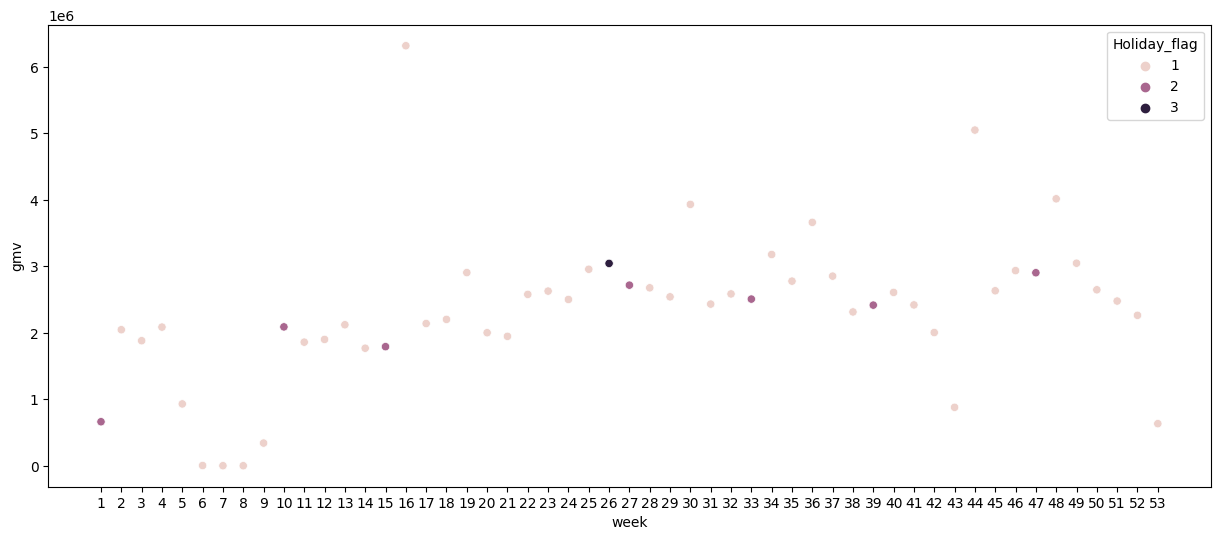

In [341]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=game_wk['week'],y=game_wk['gmv'],hue=game_wk['Holiday_flag'])
plt.xticks(game_wk['week'])
plt.show()


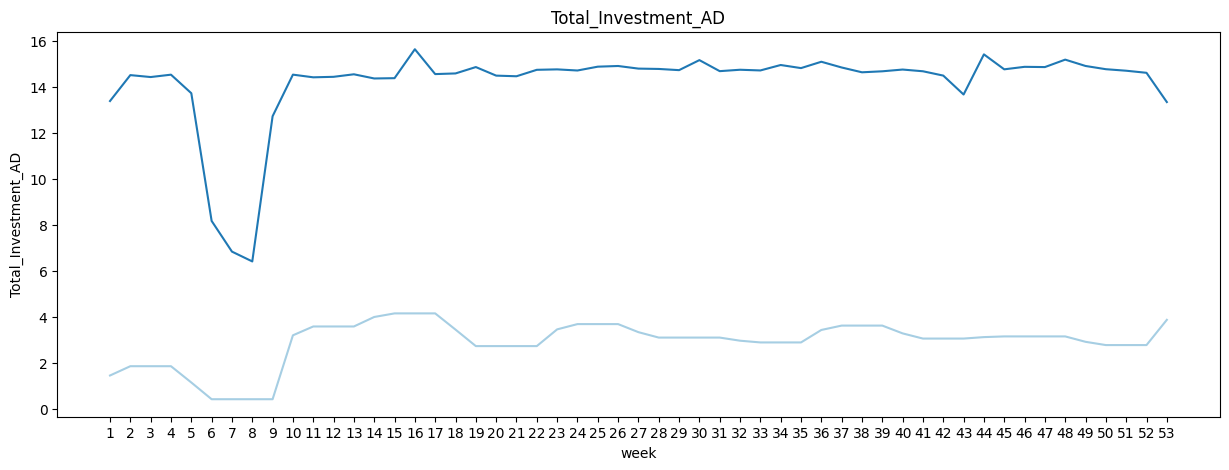

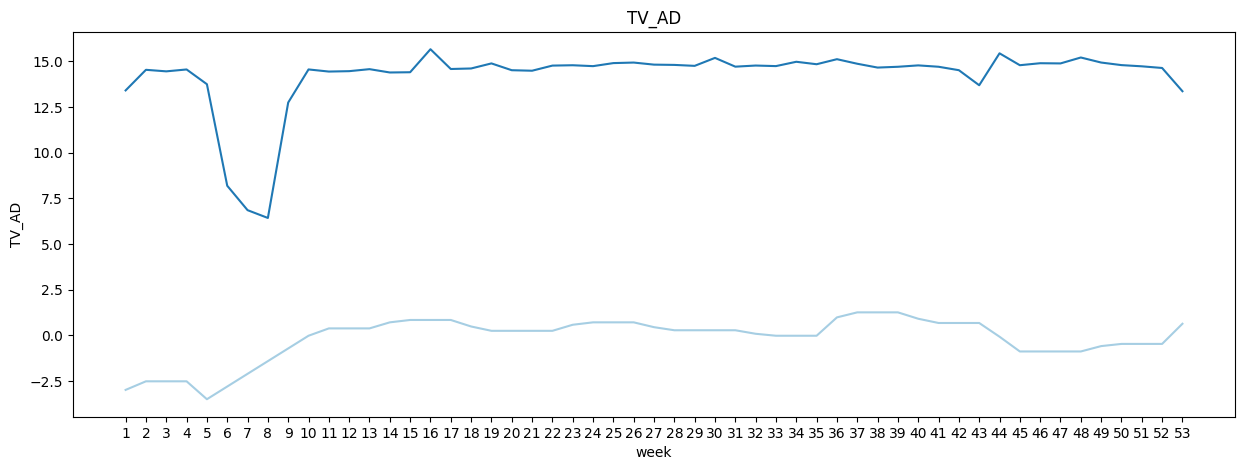

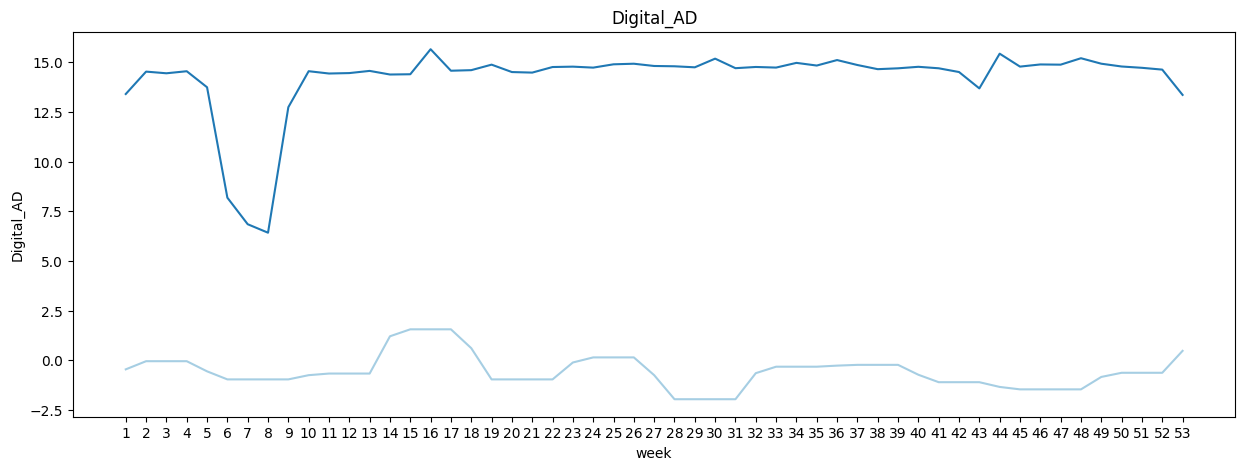

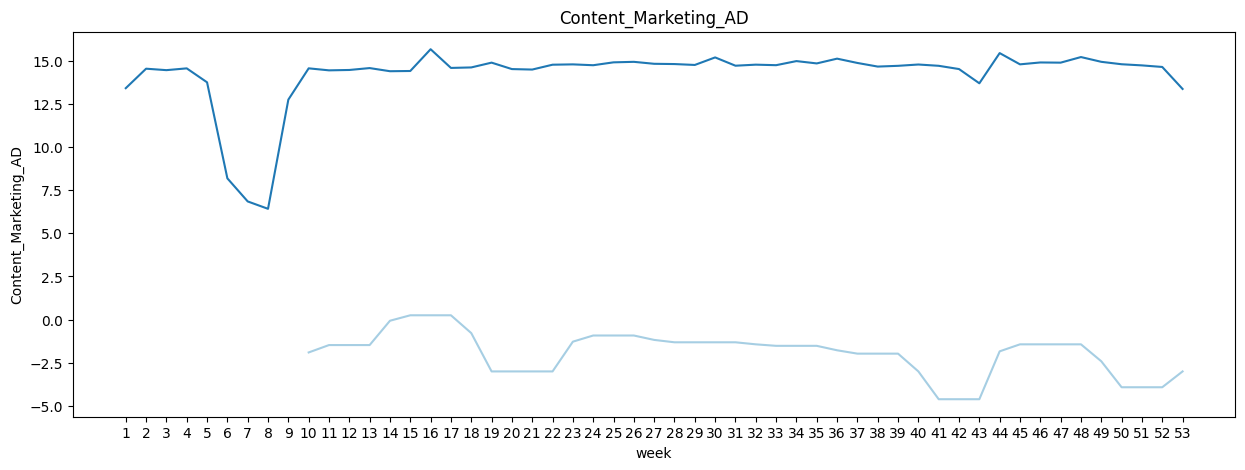

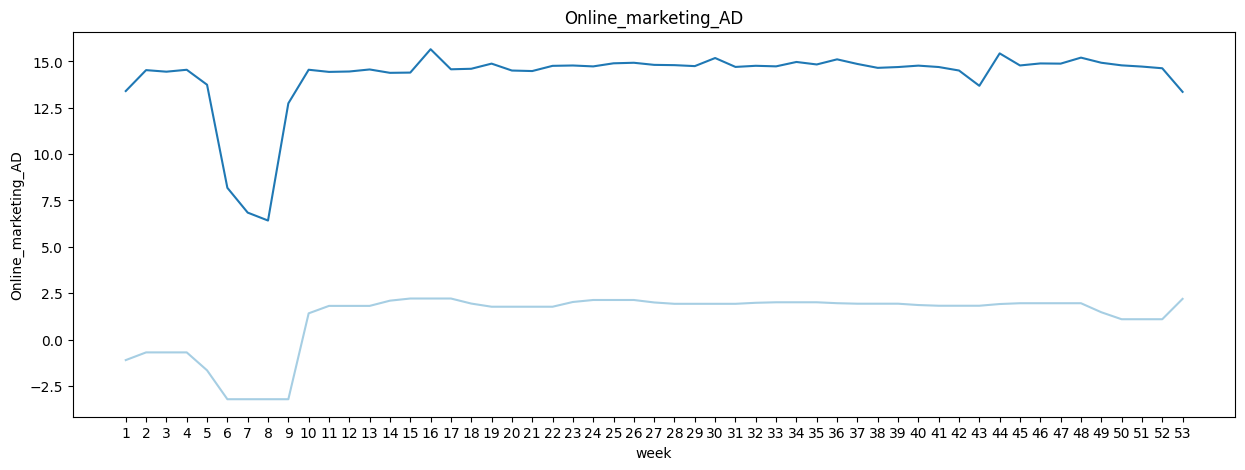

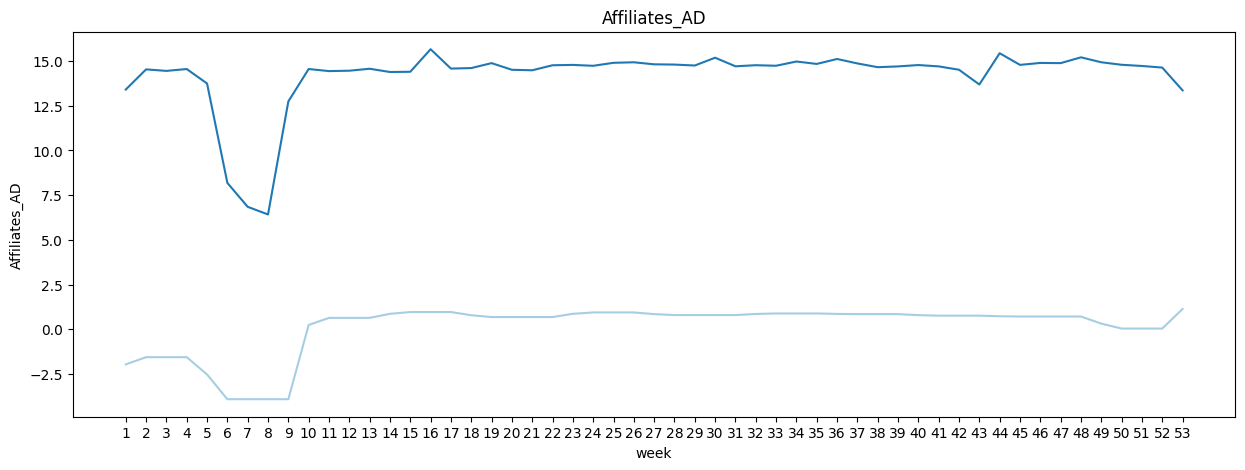

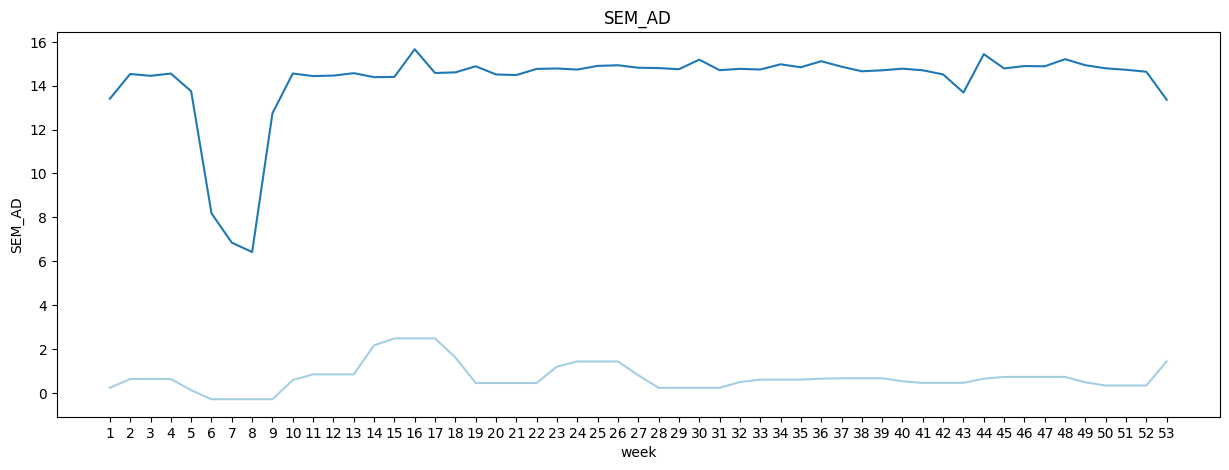

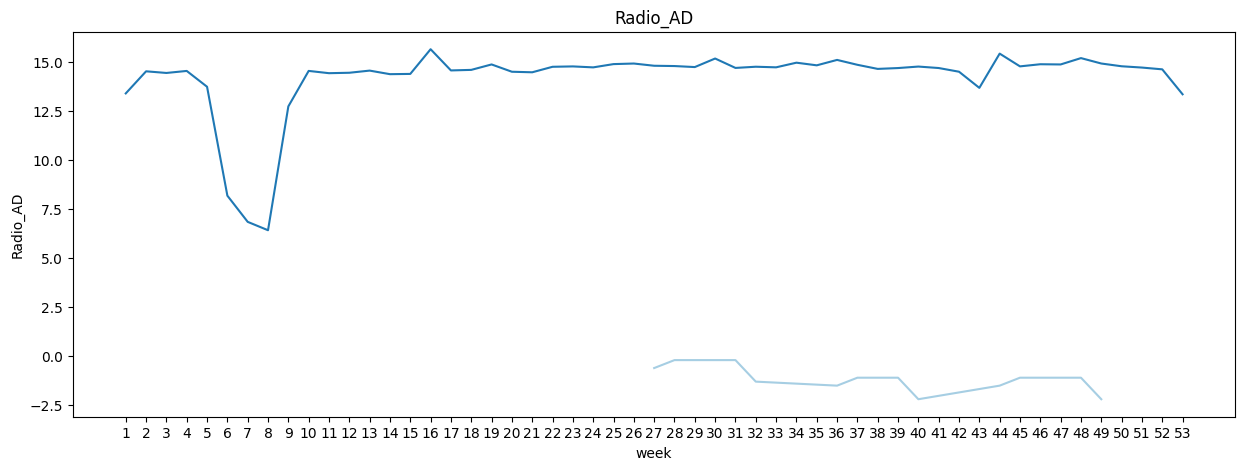

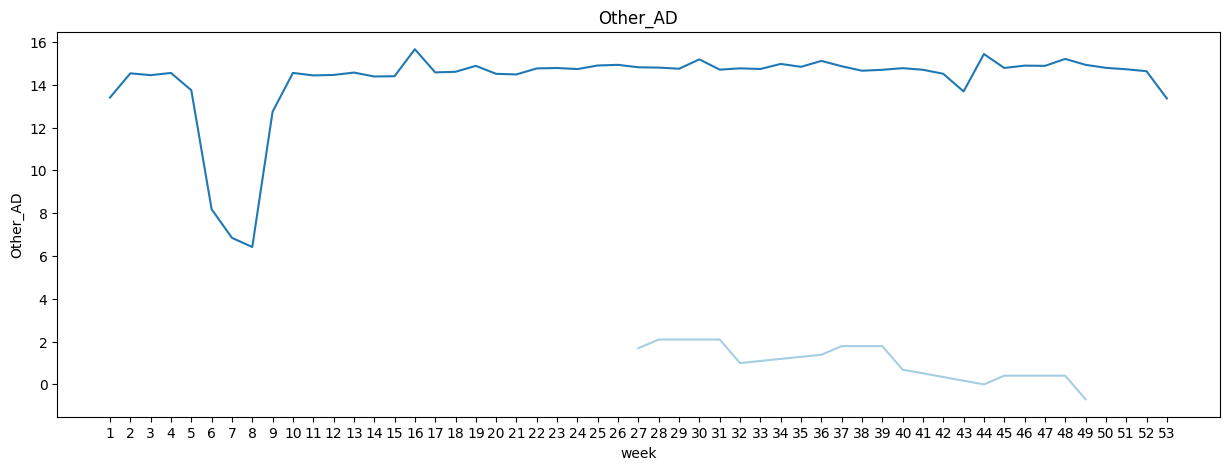

In [342]:
markinv = ['Total_Investment_AD', 'TV_AD','Digital_AD', 'Content_Marketing_AD', 'Online_marketing_AD','Affiliates_AD', 'SEM_AD', 'Radio_AD', 'Other_AD','gmv']

# average_sale_per_week
# plt.figure(figsize=(25, 19))
x=1
for i in markinv:
  if i != 'gmv':
    # plt.subplot(9,1,x)
    plt.figure(figsize=(15, 5))
    plt.title(i)
    sns.lineplot(x=game_wk['week'],y=nm.log(game_wk[i]))
    sns.lineplot(x=game_wk['week'],y=nm.log(game_wk['gmv']))
    plt.xticks(game_wk['week'])
    x=x+1
    plt.show()

## affiliates , digital and other and total


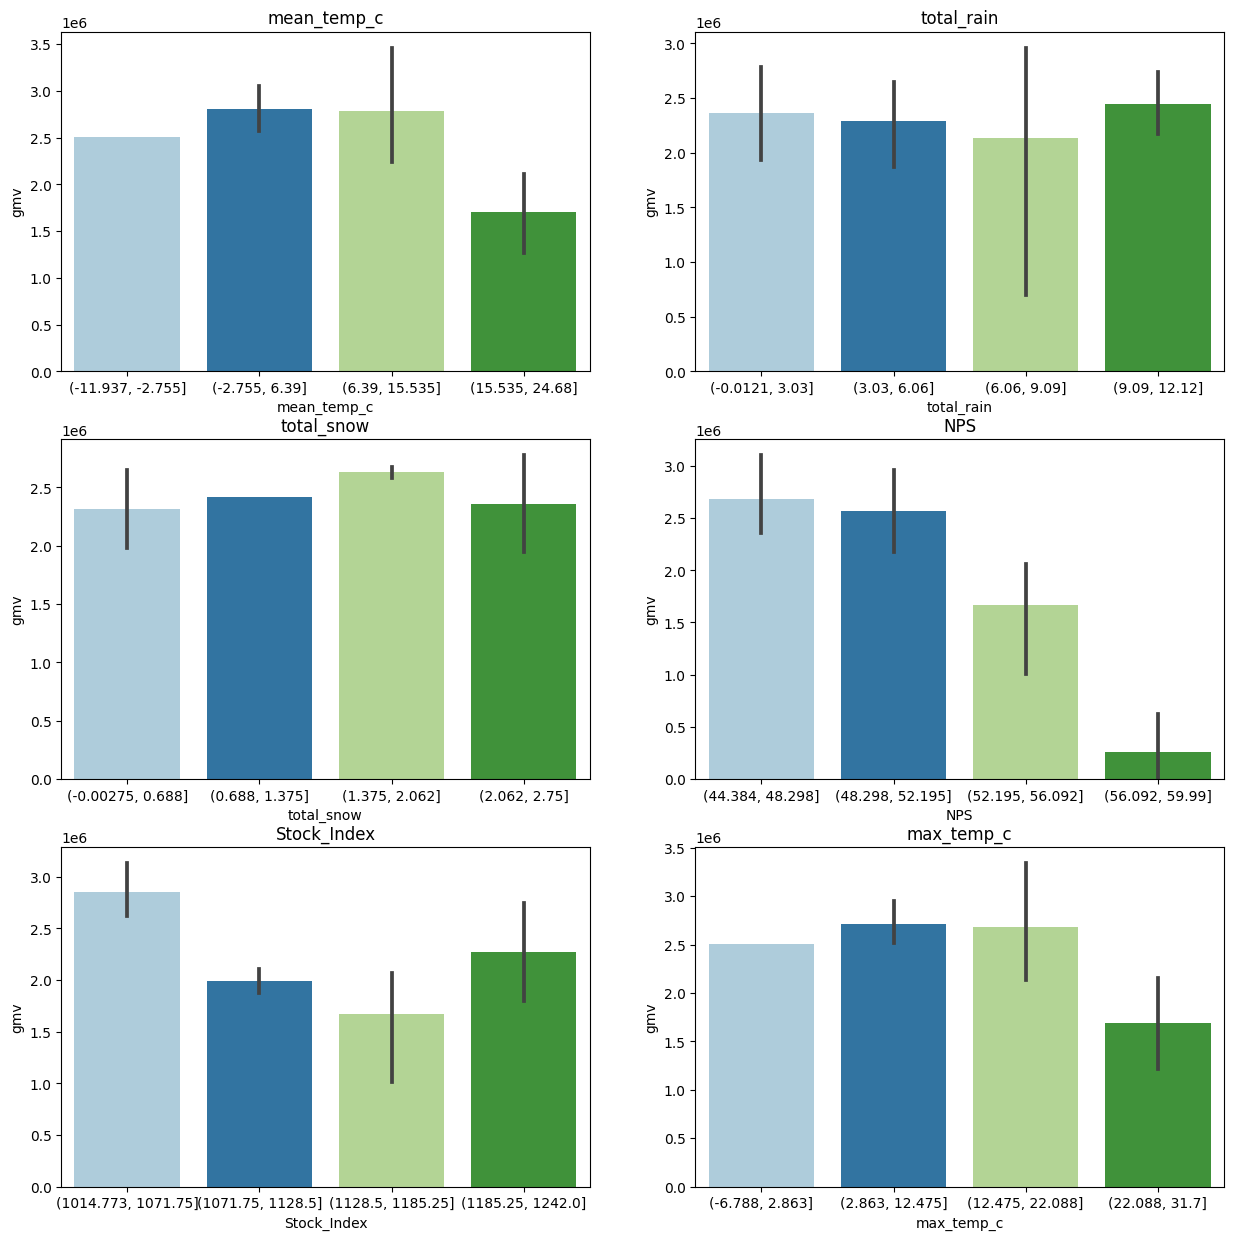

In [343]:
wc = ['mean_temp_c', 'total_rain', 'total_snow','NPS',"Stock_Index",'max_temp_c']

plt.figure(figsize=(15, 15))
x=1
for i in wc:
  plt.subplot(3,2,x)
  plt.title(i)
  sns.barplot(y=game_wk['gmv'],x=pd.cut(game_wk[i],bins=4))
  x=x+1

  ## max temp can be kept


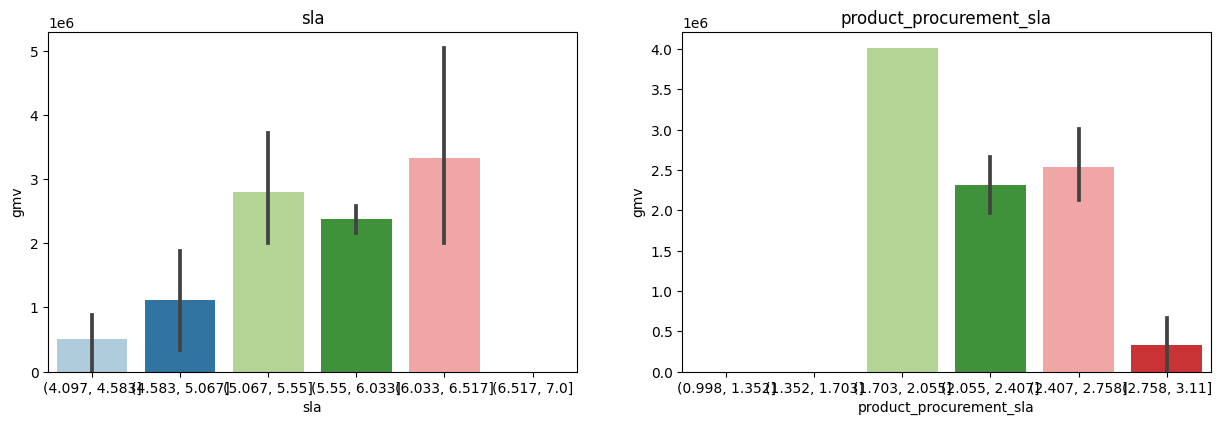

In [344]:
wc = ['sla','product_procurement_sla']

plt.figure(figsize=(15, 15))
x=1
for i in wc:
  plt.subplot(3,2,x)
  plt.title(i)
  sns.barplot(y=game_wk['gmv'],x=pd.cut(game_wk[i],bins=6))
  x=x+1

## sla not required

In [345]:
game_wk.drop(['order_count','units','Other_AD','product_mrp','total_snow','total_rain','cool_deg_c','max_temp_c','Other_AD','Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing',
       'Online marketing', 'Affiliates', 'SEM', 'Radio', 'Other','week'],1,inplace=True)
game_wk.columns

Index(['gmv', 'sla', 'product_procurement_sla', 'listing_price',
       'discount_per', 'Stock_Index', 'NPS', 'pay_day_in_wk', 'Holiday_flag',
       'mean_temp_c', 'Total_Investment_AD', 'TV_AD', 'Digital_AD',
       'Content_Marketing_AD', 'Sponsorship_AD', 'Online_marketing_AD',
       'Affiliates_AD', 'SEM_AD', 'Radio_AD', 'cod_per', 'sales_per'],
      dtype='object')

In [346]:
game_wk.drop('Total_Investment_AD',1,inplace=True)

In [347]:
df_train, df_test = train_test_split(game_wk, train_size = 0.7, test_size = 0.3, random_state = 100)

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

scale_var=camera.columns
df_train[df_train.columns]=scaler.fit_transform(df_train[df_train.columns])
# df_train
X_train=df_train.drop('gmv',1)
y_train=df_train['gmv']


In [348]:
X_train.columns


Index(['sla', 'product_procurement_sla', 'listing_price', 'discount_per',
       'Stock_Index', 'NPS', 'pay_day_in_wk', 'Holiday_flag', 'mean_temp_c',
       'TV_AD', 'Digital_AD', 'Content_Marketing_AD', 'Sponsorship_AD',
       'Online_marketing_AD', 'Affiliates_AD', 'SEM_AD', 'Radio_AD', 'cod_per',
       'sales_per'],
      dtype='object')

In [349]:
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=12, step=1)
selector.fit(X_train, y_train)


RFE(estimator=SVR(kernel='linear'), n_features_to_select=12)

In [350]:
df=pd.DataFrame(list(zip(X_train.columns,selector.support_,selector.ranking_)))
features =X_train.columns[selector.support_]
features


Index(['sla', 'product_procurement_sla', 'listing_price', 'discount_per',
       'pay_day_in_wk', 'mean_temp_c', 'TV_AD', 'Online_marketing_AD',
       'Affiliates_AD', 'SEM_AD', 'cod_per', 'sales_per'],
      dtype='object')

In [351]:
x_train_m =build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.735e+04
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           2.91e-51
Time:                        10:28:40   Log-Likelihood:                 204.91
No. Observations:                  37   AIC:                            -383.8
Df Residuals:                      24   BIC:                            -362.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features      VIF
8             Affiliates_AD  1178.03
7       Online_marketing_AD  1054.61
2             listing_price   132.39
3              discount_per    85.86
0                       sla    20.86
6                     TV_AD    17.89
10                  cod_per    14.45
9                    SEM_AD     7.67
1   product_procurement_sla     7.30
5               mean_temp_c     6.76
4             pay_day_in_wk     2.70
11                sales_per     1.66

In [352]:
features=features.drop('listing_price',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     49.39
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           3.63e-14
Time:                        10:28:40   Log-Likelihood:                 69.844
No. Observations:                  37   AIC:                            -115.7
Df Residuals:                      25   BIC:                            -96.36
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features      VIF
7             Affiliates_AD  1125.42
6       Online_marketing_AD   995.30
5                     TV_AD    17.47
0                       sla    13.79
9                   cod_per    13.60
1   product_procurement_sla     7.27
8                    SEM_AD     6.64
2              discount_per     6.51
4               mean_temp_c     4.80
3             pay_day_in_wk     2.66
10                sales_per     1.66

In [353]:
features=features.drop('Online_marketing_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     52.90
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           1.04e-14
Time:                        10:28:40   Log-Likelihood:                 68.681
No. Observations:                  37   AIC:                            -115.4
Df Residuals:                      26   BIC:                            -97.64
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
6            Affiliates_AD  26.05
8                  cod_per  12.61
0                      sla  12.10
5                    TV_AD  11.60
1  product_procurement_sla   7.24
2             discount_per   6.50
4              mean_temp_c   4.64
3            pay_day_in_wk   2.63
7                   SEM_AD   2.36
9                sales_per   1.66

In [354]:
features=features.drop('SEM_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     55.61
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           4.18e-15
Time:                        10:28:40   Log-Likelihood:                 67.042
No. Observations:                  37   AIC:                            -114.1
Df Residuals:                      27   BIC:                            -97.98
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
6            Affiliates_AD  25.21
7                  cod_per  12.52
5                    TV_AD  11.29
0                      sla  10.81
1  product_procurement_sla   7.22
2             discount_per   6.24
4              mean_temp_c   4.45
3            pay_day_in_wk   2.57
8                sales_per   1.66

In [356]:
features=features.drop('TV_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])
#

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     64.87
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           4.99e-16
Time:                        10:30:41   Log-Likelihood:                 67.040
No. Observations:                  37   AIC:                            -116.1
Df Residuals:                      28   BIC:                            -101.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
6                  cod_per  11.20
0                      sla  10.66
5            Affiliates_AD   9.27
1  product_procurement_sla   6.08
2             discount_per   5.84
4              mean_temp_c   4.32
3            pay_day_in_wk   2.56
7                sales_per   1.65

In [357]:
features=features.drop('cod_per',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     72.69
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           1.15e-16
Time:                        10:30:52   Log-Likelihood:                 66.079
No. Observations:                  37   AIC:                            -116.2
Df Residuals:                      29   BIC:                            -103.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features   VIF
0                      sla  9.65
5            Affiliates_AD  9.20
2             discount_per  5.83
1  product_procurement_sla  5.39
4              mean_temp_c  2.78
3            pay_day_in_wk  2.55
6                sales_per  1.59

In [358]:
features=features.drop('sla',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     65.66
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           6.62e-16
Time:                        10:31:01   Log-Likelihood:                 61.052
No. Observations:                  37   AIC:                            -108.1
Df Residuals:                      30   BIC:                            -96.83
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features   VIF
4            Affiliates_AD  5.82
1             discount_per  5.77
0  product_procurement_sla  5.10
2            pay_day_in_wk  2.53
3              mean_temp_c  2.53
5                sales_per  1.59

In [359]:
features=features.drop('mean_temp_c',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     81.42
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           6.91e-17
Time:                        10:31:12   Log-Likelihood:                 61.052
No. Observations:                  37   AIC:                            -110.1
Df Residuals:                      31   BIC:                            -100.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features   VIF
3            Affiliates_AD  5.76
1             discount_per  5.75
0  product_procurement_sla  3.97
2            pay_day_in_wk  2.39
4                sales_per  1.58

In [360]:
features=features.drop('pay_day_in_wk',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     104.7
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           6.60e-18
Time:                        10:31:20   Log-Likelihood:                 60.992
No. Observations:                  37   AIC:                            -112.0
Df Residuals:                      32   BIC:                            -103.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features   VIF
1             discount_per  5.71
2            Affiliates_AD  5.60
0  product_procurement_sla  3.84
3                sales_per  1.41

In [361]:
features=features.drop('sales_per',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     142.1
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           6.13e-19
Time:                        10:31:29   Log-Likelihood:                 60.767
No. Observations:                  37   AIC:                            -113.5
Df Residuals:                      33   BIC:                            -107.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features   VIF
2            Affiliates_AD  5.53
1             discount_per  5.09
0  product_procurement_sla  3.83

In [362]:
features=features.drop('Affiliates_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     216.6
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           4.50e-20
Time:                        10:31:37   Log-Likelihood:                 60.534
No. Observations:                  37   AIC:                            -115.1
Df Residuals:                      34   BIC:                            -110.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features   VIF
0  product_procurement_sla  3.15
1             discount_per  3.15

In [363]:
features=features.drop('product_procurement_sla',1)
x_train_m=build_model(X_train[features],y_train)


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     416.5
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           5.11e-21
Time:                        10:31:46   Log-Likelihood:                 59.363
No. Observations:                  37   AIC:                            -114.7
Df Residuals:                      35   BIC:                            -111.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1037      0.016      6.496   

ValueError: ignored

                                 OLS Regression Results                                
Dep. Variable:                    gmv   R-squared (uncentered):                   0.971
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              1187.
Date:                Mon, 09 Oct 2023   Prob (F-statistic):                    3.68e-29
Time:                        10:32:05   Log-Likelihood:                          44.728
No. Observations:                  37   AIC:                                     -87.46
Df Residuals:                      36   BIC:                                     -85.85
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

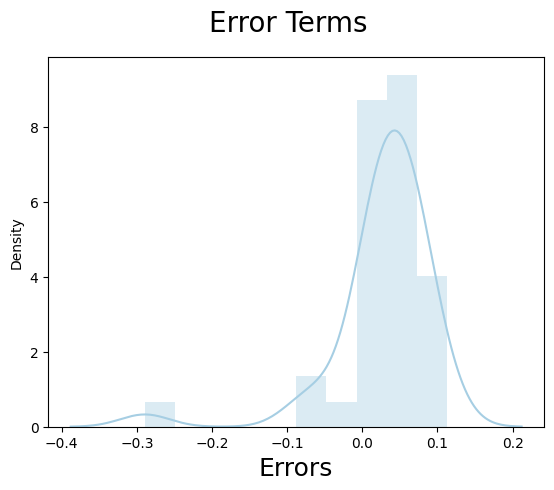

Text(0, 0.5, 'y_pred')

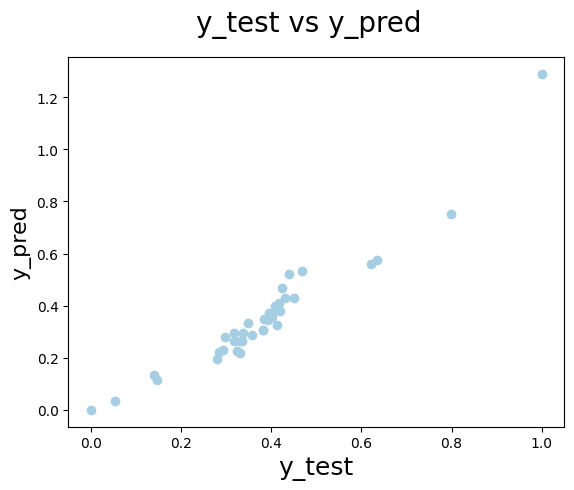

In [364]:
lm = sm.OLS(y_train,X_train[features]).fit() # fitting the model
print(lm.summary()) # model summary
y_train_pred=lm.predict(X_train[features])

fig=plt.figure()
sns.distplot((y_train-y_train_pred),bins=10)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_train ,y_train_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)


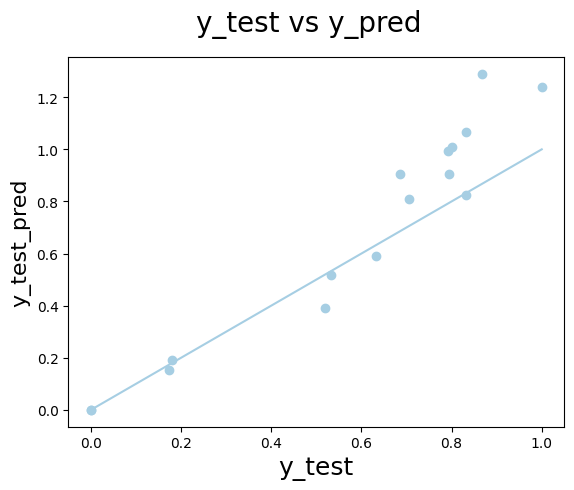

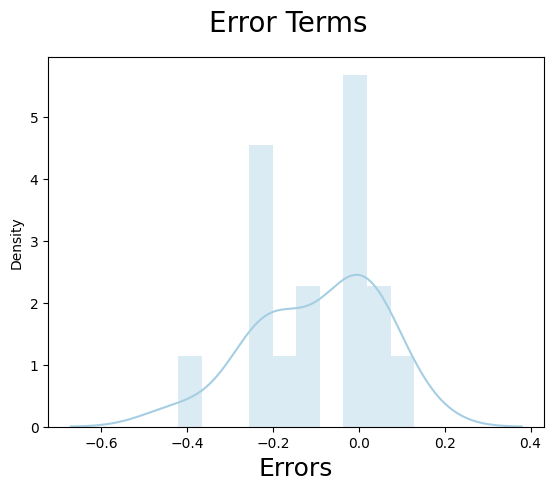

In [365]:
df_test[df_train.columns]=scaler.fit_transform(df_test[df_train.columns])
X_test=df_test.drop('gmv',1)
y_test=df_test['gmv']
X_test=sm.add_constant(X_test)
X_test=X_test[features]
y_test_pred=lm.predict(X_test)

# Plotting y_test and y_pred to understand the spread

fig,ax = plt.subplots()
ax.scatter(y_test, y_test_pred )
fig.suptitle('y_test vs y_pred', fontsize = 20)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])#,  lw=1)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

fig=plt.figure()
sns.distplot((y_test-y_test_pred),bins=10)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()


In [ ]:
y_test

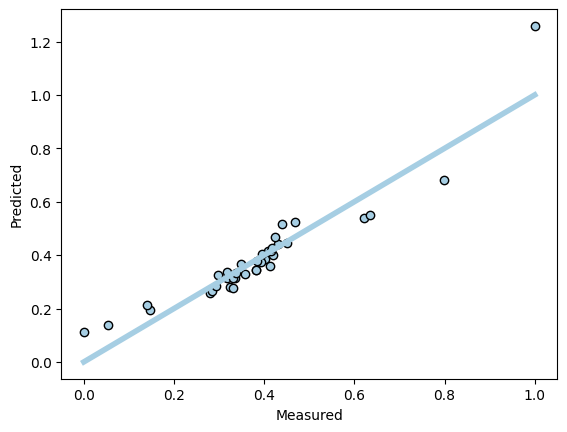

In [367]:
f = KFold(n_splits = 10, shuffle = True, random_state = 100)
lm=LinearRegression()
scores = cross_val_score(lm, X_train[features], y_train, scoring='r2', cv=f)
scores
y_pred = cross_val_predict(lm, X_train[features], y_train, cv=f)



fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],  lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [ ]:
# game_wk=game.groupby(['week']).agg({"order_item_id":"nunique",'gmv':'sum','units':'sum','order_payment_type':'sum','sla':'mean',
#                                         'product_mrp':'sum','product_procurement_sla':'mean','listing_price':'sum',
#                                          'discount_per':'sum','Stock_Index':'max','NPS':'max','pay_date_flag':'max',
#                                           "Holiday_flag": "nunique",'sale_date':"nunique"}).round(2)

# game_wk=pd.merge(game_wk,weekly_kpis,on='week')

# game_wk.rename(columns={"sales_date":"num_of_sales"},inplace=True)

# game_wk.drop(['heat_deg_c','mon_temp_c','Year','Month','Day','Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing',
#        'Online marketing', 'Affiliates', 'SEM', 'Radio', 'Other'],1,inplace=True)

# game_wk.order_payment_type.value_counts()
# game_wk.rename(columns={'order_item_id':'order_count',"order_payment_type":"order_payment_cod",'mon_temp_c':"min_temp_c","pay_date_flag":"pay_day_in_wk"},inplace=True)
# game_wk["cod_per"]=game_wk["order_payment_cod"]/game_wk["order_count"]
# game_wk.drop("order_payment_cod",1,inplace=True)
# game_wk.rename(columns={'sale_date':"num_of_sales"},inplace=True)

# game_wk['sales_per']=(game_wk['num_of_sales']-1)/7
# game_wk.drop('num_of_sales',1,inplace=True)
# game_wk.drop(['order_count','units','Other_AD','product_mrp'],1,inplace=True)

In [368]:
# multiplicative
game_wk[game_wk.columns]=nm.log(game_wk[game_wk.columns])


In [369]:

game_wk=game_wk.replace([nm.inf, -nm.inf], 0)
game_wk=game_wk.fillna(0)



In [370]:
df_train, df_test = train_test_split(game_wk, train_size = 0.7, test_size = 0.3, random_state = 100)
scaler=MinMaxScaler()

scale_var=camera.columns
df_train[df_train.columns]=scaler.fit_transform(df_train[df_train.columns])
# df_train
X_train=df_train.drop('gmv',1)
y_train=df_train['gmv']
# X_train


In [372]:
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=15, step=1)
selector.fit(X_train, y_train)
df=pd.DataFrame(list(zip(X_train.columns,selector.support_,selector.ranking_)))
features =X_train.columns[selector.support_]
features


Index(['sla', 'product_procurement_sla', 'listing_price', 'discount_per',
       'Stock_Index', 'NPS', 'mean_temp_c', 'TV_AD', 'Digital_AD',
       'Sponsorship_AD', 'Online_marketing_AD', 'Affiliates_AD', 'SEM_AD',
       'cod_per', 'sales_per'],
      dtype='object')

In [373]:
x_train_m =build_model(X_train[features],y_train)
checkVIF(X_train[features])



                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.925e+05
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           1.01e-53
Time:                        10:33:10   Log-Likelihood:                 249.04
No. Observations:                  37   AIC:                            -466.1
Df Residuals:                      21   BIC:                            -440.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features       VIF
10      Online_marketing_AD  50323.38
11            Affiliates_AD  44962.91
3              discount_per   2828.04
2             listing_price   2608.15
12                   SEM_AD    140.43
9            Sponsorship_AD    134.02
8                Digital_AD    123.72
13                  cod_per     49.84
6               mean_temp_c     29.60
7                     TV_AD     26.27
0                       sla     23.16
5                       NPS     19.45
14                sales_per     18.30
4               Stock_Index     13.98
1   product_procurement_sla     11.35

In [374]:
features=features.drop('Online_marketing_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.405e+05
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           1.48e-56
Time:                        10:33:19   Log-Likelihood:                 249.04
No. Observations:                  37   AIC:                            -468.1
Df Residuals:                      22   BIC:                            -443.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features      VIF
3              discount_per  2797.57
2             listing_price  2578.32
10            Affiliates_AD   218.96
9            Sponsorship_AD    92.95
11                   SEM_AD    51.42
8                Digital_AD    39.82
6               mean_temp_c    29.36
7                     TV_AD    26.15
12                  cod_per    25.63
0                       sla    23.14
5                       NPS    19.05
13                sales_per    18.05
4               Stock_Index    12.72
1   product_procurement_sla    11.32

In [375]:
features=features.drop('listing_price',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     133.8
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           1.80e-18
Time:                        10:33:27   Log-Likelihood:                 97.252
No. Observations:                  37   AIC:                            -166.5
Df Residuals:                      23   BIC:                            -144.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features     VIF
9             Affiliates_AD  212.96
2              discount_per  123.28
8            Sponsorship_AD   92.06
10                   SEM_AD   51.00
7                Digital_AD   39.70
5               mean_temp_c   26.44
6                     TV_AD   25.49
11                  cod_per   23.53
0                       sla   22.38
4                       NPS   18.96
12                sales_per   17.16
3               Stock_Index   12.17
1   product_procurement_sla   11.30

In [376]:
features=features.drop('sales_per',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     143.7
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           2.59e-19
Time:                        10:33:42   Log-Likelihood:                 96.321
No. Observations:                  37   AIC:                            -166.6
Df Residuals:                      24   BIC:                            -145.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features     VIF
9             Affiliates_AD  210.71
2              discount_per  112.63
8            Sponsorship_AD   86.72
10                   SEM_AD   50.64
7                Digital_AD   39.29
5               mean_temp_c   26.19
6                     TV_AD   25.42
11                  cod_per   21.68
0                       sla   20.21
4                       NPS   16.56
3               Stock_Index   11.92
1   product_procurement_sla   11.30

In [377]:
features=features.drop('Affiliates_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     159.0
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           2.72e-20
Time:                        10:33:53   Log-Likelihood:                 95.834
No. Observations:                  37   AIC:                            -167.7
Df Residuals:                      25   BIC:                            -148.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
2              discount_per  62.05
9                    SEM_AD  49.50
8            Sponsorship_AD  48.90
7                Digital_AD  31.19
10                  cod_per  20.73
0                       sla  20.04
5               mean_temp_c  19.94
4                       NPS  15.66
6                     TV_AD  14.88
1   product_procurement_sla  11.29
3               Stock_Index   9.82

In [378]:
features=features.drop('SEM_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     180.9
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           2.10e-21
Time:                        10:34:03   Log-Likelihood:                 95.727
No. Observations:                  37   AIC:                            -169.5
Df Residuals:                      26   BIC:                            -151.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
2             discount_per  59.22
8           Sponsorship_AD  48.42
9                  cod_per  20.70
0                      sla  19.87
5              mean_temp_c  19.68
6                    TV_AD  14.82
1  product_procurement_sla  10.43
4                      NPS   8.43
7               Digital_AD   8.03
3              Stock_Index   7.68

In [379]:
features=features.drop('cod_per',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     198.2
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           2.77e-22
Time:                        10:34:14   Log-Likelihood:                 94.786
No. Observations:                  37   AIC:                            -169.6
Df Residuals:                      27   BIC:                            -153.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
2             discount_per  44.84
8           Sponsorship_AD  33.46
0                      sla  19.07
5              mean_temp_c  13.31
6                    TV_AD  13.24
1  product_procurement_sla  10.14
4                      NPS   7.82
7               Digital_AD   7.09
3              Stock_Index   6.85

In [380]:
features=features.drop('Sponsorship_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     230.2
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           1.86e-23
Time:                        10:34:29   Log-Likelihood:                 94.708
No. Observations:                  37   AIC:                            -171.4
Df Residuals:                      28   BIC:                            -156.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
2             discount_per  36.81
0                      sla  19.02
6                    TV_AD  10.80
1  product_procurement_sla  10.06
5              mean_temp_c  10.00
3              Stock_Index   6.80
7               Digital_AD   5.80
4                      NPS   5.41

In [381]:
features=features.drop('product_procurement_sla',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     272.4
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           1.08e-24
Time:                        10:34:41   Log-Likelihood:                 94.703
No. Observations:                  37   AIC:                            -173.4
Df Residuals:                      29   BIC:                            -160.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0357      0.045     -0.786   

Features    VIF
1  discount_per  33.01
0           sla  18.90
5         TV_AD   9.80
4   mean_temp_c   9.36
2   Stock_Index   6.11
6    Digital_AD   4.86
3           NPS   3.69

In [382]:
features=features.drop('Stock_Index',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     320.5
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           8.26e-26
Time:                        10:35:04   Log-Likelihood:                 94.236
No. Observations:                  37   AIC:                            -174.5
Df Residuals:                      30   BIC:                            -163.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0335      0.045     -0.742   

Features    VIF
1  discount_per  32.50
0           sla  18.90
4         TV_AD   9.77
3   mean_temp_c   8.53
5    Digital_AD   4.86
2           NPS   3.30

In [383]:
features=features.drop('sla',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     383.2
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           6.82e-27
Time:                        10:35:10   Log-Likelihood:                 93.571
No. Observations:                  37   AIC:                            -175.1
Df Residuals:                      31   BIC:                            -165.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0286      0.045     -0.637   

Features    VIF
0  discount_per  12.76
3         TV_AD   9.67
2   mean_temp_c   7.83
4    Digital_AD   4.84
1           NPS   3.29

In [384]:
features=features.drop('Digital_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     494.2
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           2.88e-28
Time:                        10:35:25   Log-Likelihood:                 93.564
No. Observations:                  37   AIC:                            -177.1
Df Residuals:                      32   BIC:                            -169.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0281      0.044     -0.639   

Features    VIF
0  discount_per  12.60
3         TV_AD   9.33
2   mean_temp_c   5.42
1           NPS   2.87

In [385]:
features=features.drop('TV_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     676.9
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           1.07e-29
Time:                        10:35:46   Log-Likelihood:                 93.493
No. Observations:                  37   AIC:                            -179.0
Df Residuals:                      33   BIC:                            -172.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0165      0.028     -0.579   

Features   VIF
2   mean_temp_c  5.42
0  discount_per  4.01
1           NPS  2.84

In [390]:
features=features.drop('NPS',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     929.8
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           2.10e-30
Time:                        10:36:51   Log-Likelihood:                 91.349
No. Observations:                  37   AIC:                            -176.7
Df Residuals:                      34   BIC:                            -171.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0184      0.024      0.780   

Features   VIF
0  discount_per  3.98
1   mean_temp_c  3.98

                                 OLS Regression Results                                
Dep. Variable:                    gmv   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          3.157e+04
Date:                Mon, 09 Oct 2023   Prob (F-statistic):                    1.03e-57
Time:                        10:39:10   Log-Likelihood:                          91.020
No. Observations:                  37   AIC:                                     -178.0
Df Residuals:                      35   BIC:                                     -174.8
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

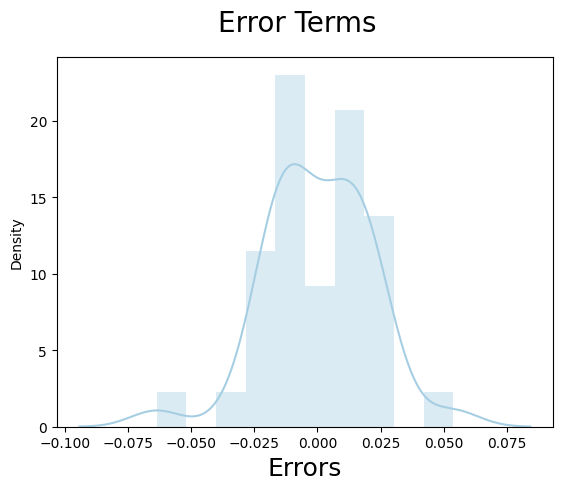

Text(0, 0.5, 'y_pred')

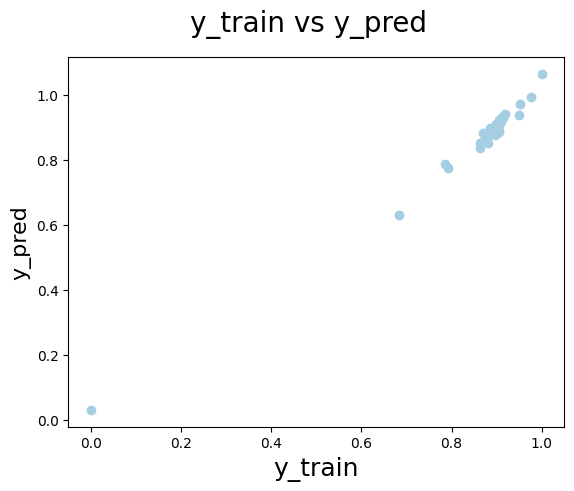

In [400]:
lm = sm.OLS(y_train,X_train[features]).fit() # fitting the model
print(lm.summary()) # model summary
y_train_pred=lm.predict(X_train[features])
game_model2=lm

fig=plt.figure()
sns.distplot((y_train-y_train_pred),bins=10)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_train ,y_train_pred)
fig.suptitle('y_train vs y_pred', fontsize = 20)
# Plot heading
plt.xlabel('y_train', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)


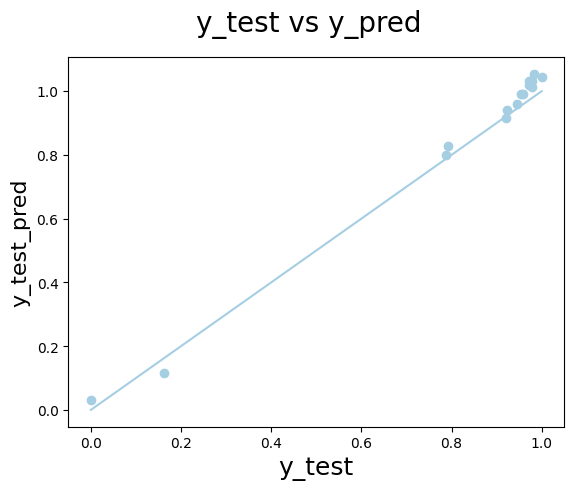

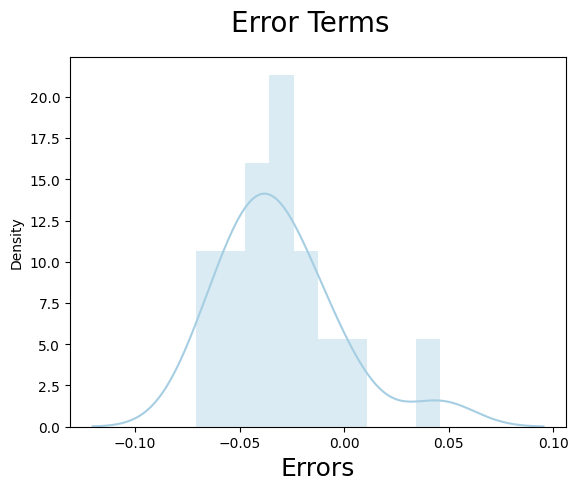

In [392]:
df_test[df_train.columns]=scaler.fit_transform(df_test[df_train.columns])
X_test=df_test.drop('gmv',1)
y_test=df_test['gmv']
X_test=sm.add_constant(X_test)
X_test=X_test[features]
y_test_pred=lm.predict(X_test)

# Plotting y_test and y_pred to understand the spread

fig,ax = plt.subplots()
ax.scatter(y_test, y_test_pred )
fig.suptitle('y_test vs y_pred', fontsize = 20)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])#,  lw=1)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

fig=plt.figure()
sns.distplot((y_test-y_test_pred),bins=10)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()



[ 0.34569026  0.89594396  0.89129447  0.92803088 -2.37121003  0.52813976
 -0.86792118 -1.08918567  0.89524981  0.91404299]


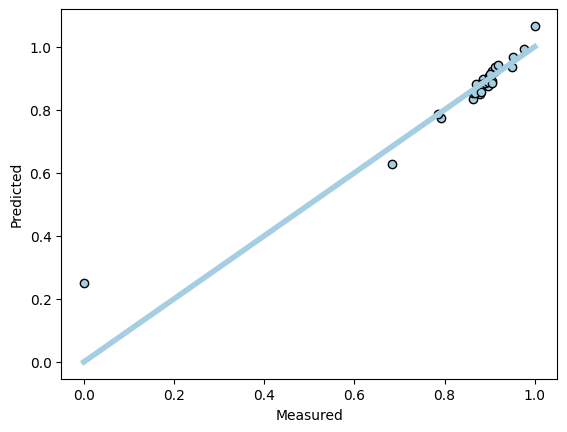

In [393]:
f = KFold(n_splits = 10, shuffle = True, random_state = 100)
lm=LinearRegression()
scores = cross_val_score(lm, X_train[features], y_train, scoring='r2', cv=f)
scores
y_pred = cross_val_predict(lm, X_train[features], y_train, cv=f)
print(scores)


fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],  lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [401]:
game_model2=pd.DataFrame(game_model2.params)

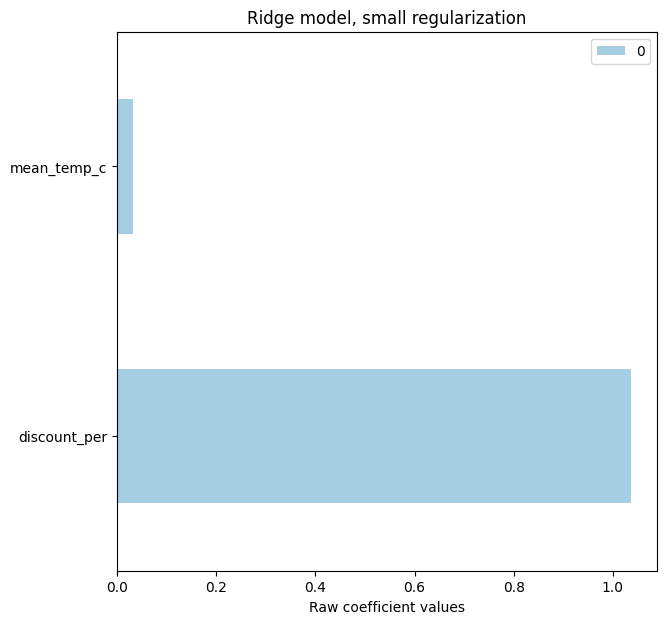

In [402]:
game_model2.plot.barh(figsize=(9, 7))
plt.title("Ridge model, small regularization")
plt.axvline(x=0, color=".5")
plt.xlabel("Raw coefficient values")
plt.subplots_adjust(left=0.3)